In [8]:
import pandas as pd
import numpy as np
import copy
from Codebase import Valuestandard
from collections import Counter

In [9]:
training_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/training.csv")
testing_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/testing.csv")
risk_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/Highrisk.csv")

training_data.info()
print(' ')
print('=========================================== ')
print(' ')
testing_data.info()
print(' ')
print('============================================')
print(' ')
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  928 non-null    int64  
 1   Number                      928 non-null    int64  
 2   Age                         928 non-null    int64  
 3   Gender                      928 non-null    int64  
 4   Height                      928 non-null    int64  
 5   Weight                      928 non-null    int64  
 6   BMI                         928 non-null    float64
 7   Hypertesion                 928 non-null    int64  
 8   Diabetes                    928 non-null    int64  
 9   CI                          928 non-null    int64  
 10  CHD                         928 non-null    int64  
 11  Asthma                      928 non-null    int64  
 12  Hypothyroidism              928 non-null    int64  
 13  COPD                        928 non

In [16]:
# 拆分标签

"""术中低氧"""
# 术前变量
x_train_1 = copy.deepcopy(training_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_train_1 = copy.deepcopy(training_data["Label_Intraoperative"])
x_test_1 = copy.deepcopy(testing_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_test_1 = copy.deepcopy(testing_data["Label_Intraoperative"])

x_risk_1 = copy.deepcopy(risk_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_risk_1 = copy.deepcopy(risk_data["Label_Intraoperative"])

# 术前+术中变量
x_train_2 = copy.deepcopy(training_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_train_2 = copy.deepcopy(training_data["Label_Intraoperative"])
x_test_2 = copy.deepcopy(testing_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_test_2 = copy.deepcopy(testing_data["Label_Intraoperative"])

x_risk_2 = copy.deepcopy(risk_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_risk_2 = copy.deepcopy(risk_data["Label_Intraoperative"])

"""诱导低氧"""
# 术前变量
x_train_3 = copy.deepcopy(training_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_train_3 = copy.deepcopy(training_data["Label_Induction"])
x_test_3 = copy.deepcopy(testing_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_test_3 = copy.deepcopy(testing_data["Label_Induction"])

x_risk_3 = copy.deepcopy(risk_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_risk_3 = copy.deepcopy(risk_data["Label_Induction"])

# 术前+诱导变量
x_train_4 = copy.deepcopy(training_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_train_4 = copy.deepcopy(training_data["Label_Induction"])
x_test_4 = copy.deepcopy(testing_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_test_4 = copy.deepcopy(testing_data["Label_Induction"])

x_risk_4 = copy.deepcopy(risk_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_risk_4 = copy.deepcopy(risk_data["Label_Induction"])

In [17]:
print(x_train_1.shape)
print(y_train_1.shape)
x_train_1.info()
print(" ")
print(" ")
print(x_test_1.shape)
print(y_test_1.shape)
x_test_1.info()
print("=================================================")
print(x_train_2.shape)
print(y_train_2.shape)
x_train_2.info()
print(" ")
print(" ")
print(x_test_2.shape)
print(y_test_2.shape)
x_test_2.info()
print("=================================================")
print(x_train_3.shape)
print(y_train_3.shape)
x_train_3.info()
print(" ")
print(" ")
print(x_test_3.shape)
print(y_test_3.shape)
x_test_3.info()
print("=================================================")
print(x_train_4.shape)
print(y_train_4.shape)
x_train_4.info()
print(" ")
print(" ")
print(x_test_4.shape)
print(y_test_4.shape)
x_test_4.info()

(928, 9)
(928,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 928 non-null    float64
 1   Snore               928 non-null    int64  
 2   Neck_Circumference  928 non-null    int64  
 3   ASA_scores          928 non-null    int64  
 4   TMD                 928 non-null    float64
 5   RHTMD               928 non-null    float64
 6   TMH                 928 non-null    float64
 7   Mallampati_Class    928 non-null    int64  
 8   BaselineSpO2        928 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 65.4 KB
 
 
(232, 9)
(232,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 232 non-null    float64
 1   Snore         

In [18]:
# 利用 Valuestandard 进行数据标准化

"""术中低氧"""
# 术前变量
skip_list_1 = [1] # 二分类变量的索引号
onehot_list_1 = [] # 多分类变量的索引号
categories_list_1 = [] # 每个多分类变量的类别数，与onehot_list中对应

skip_list = [] # 二分类变量的索引号
onehot_list = [] # 多分类变量的索引号
categories_list = []

In [19]:
# 数据标准化
"""术中低氧"""
# 术前变量
VS_1 = Valuestandard(skip_list_1, onehot_list_1, categories_list_1, Skip=True, OneHot=False)
VS_1.fit_transform(x_train_1)
VS_1.transform(x_test_1)
x_train_1_standard = VS_1.standard_data_1()
x_train_1_original = VS_1.original_data_1()
x_test_1_standard = VS_1.standard_data_2()
x_test_1_original = VS_1.original_data_2()

VS_1.transform(x_risk_1)
x_risk_1_standard = VS_1.standard_data_2()

# 术前+术中变量
VS_2 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_2.fit_transform(x_train_2)
VS_2.transform(x_test_2)
x_train_2_standard = VS_2.standard_data_1()
x_train_2_original = VS_2.original_data_1()
x_test_2_standard = VS_2.standard_data_2()
x_test_2_original = VS_2.original_data_2()

VS_2.transform(x_risk_2)
x_risk_2_standard = VS_2.standard_data_2()

"""诱导低氧"""
# 术前变量
VS_3 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_3.fit_transform(x_train_3)
VS_3.transform(x_test_3)
x_train_3_standard = VS_3.standard_data_1()
x_train_3_original = VS_3.original_data_1()
x_test_3_standard = VS_3.standard_data_2()
x_test_3_original = VS_3.original_data_2()

VS_3.transform(x_risk_3)
x_risk_3_standard = VS_3.standard_data_2()

# 术前+诱导变量
VS_4 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_4.fit_transform(x_train_4)
VS_4.transform(x_test_4)
x_train_4_standard = VS_4.standard_data_1()
x_train_4_original = VS_4.original_data_1()
x_test_4_standard = VS_4.standard_data_2()
x_test_4_original = VS_4.original_data_2()

VS_4.transform(x_risk_4)
x_risk_4_standard = VS_4.standard_data_2()

In [20]:
x_train_1_standard.info()
print(" ")
x_test_1_standard.info()
print("=================================================")
x_train_2_standard.info()
print(" ")
x_test_2_standard.info()
print("=================================================")
x_train_3_standard.info()
print(" ")
x_test_3_standard.info()
print("=================================================")
x_train_4_standard.info()
print(" ")
x_test_4_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 928 non-null    float64
 1   Neck_Circumference  928 non-null    float64
 2   ASA_scores          928 non-null    float64
 3   TMD                 928 non-null    float64
 4   RHTMD               928 non-null    float64
 5   TMH                 928 non-null    float64
 6   Mallampati_Class    928 non-null    float64
 7   BaselineSpO2        928 non-null    float64
 8   Snore               928 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 65.4 KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 232 non-null    float64
 1   Neck_Circumference  232 non-null    float64
 2  

# 

# ✦模型评估

In [21]:
"""加载必要的包"""
import joblib

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from Codebase import ConfusionMatrix # 混淆矩阵
from Codebase import PlotROC # 绘制ROC曲线
from Codebase import PlotPRC # 绘制PRC曲线
from Codebase import PlotDCA # 绘制DCA曲线
from Codebase import DelongTest # Delong检验
from Codebase import PlotCC # 绘制校准曲线
from Codebase import CompareModel # 模型比较 

In [22]:
"""载入模型"""

"""术中低氧——术前变量"""
LR_1 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[1]/LR_Calibration_1.pkl")
RF_1 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[1]/RF_Calibration.pkl")
SVM_1 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[1]/SVM_calibration.pkl")
XGBoost_1 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[1]/XGBoost_calibration.pkl")

"""术中低氧——术前变量+术中变量"""
LR_2 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[2]/LR_Calibration_2.pkl")
RF_2 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[2]/RF_Calibration.pkl")
SVM_2 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[2]/SVM_calibration.pkl")
XGBoost_2 =  joblib.load("[2]Model_Save/[2]Model/[1]Intraoperative/[2]/XGBoost_calibration.pkl")

"""诱导低氧——术前变量"""
LR_3 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[1]/LR_Calibration_3.pkl")
RF_3 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[1]/RF_Calibration.pkl")
SVM_3 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[1]/SVM_calibration.pkl")
XGBoost_3 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[1]/XGBoost_calibration.pkl")

"""诱导低氧——术前+诱导变量"""
LR_4 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[2]/LR_Calibration_4.pkl")
RF_4 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[2]/RF_Calibration.pkl")
SVM_4 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[2]/SVM_calibration.pkl")
XGBoost_4 =  joblib.load("[2]Model_Save/[2]Model/[2]Induction/[2]/XGBoost_calibration.pkl")

In [23]:
"""创建混淆矩阵"""

"""术中低氧——术前变量"""
CM_LR_train_1 = ConfusionMatrix(LR_1, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_LR_1 = ConfusionMatrix(LR_1, x_test_1_standard, y_test_1, custom_threshold=CM_LR_train_1._threshold, HL_test=5)

CM_RF_train_1 = ConfusionMatrix(RF_1, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_RF_1 = ConfusionMatrix(RF_1, x_test_1_standard, y_test_1, custom_threshold=CM_RF_train_1._threshold, HL_test=5)

CM_SVM_train_1 = ConfusionMatrix(SVM_1, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_1 = ConfusionMatrix(SVM_1, x_test_1_standard, y_test_1, custom_threshold=CM_SVM_train_1._threshold, HL_test=5)

CM_XGBoost_train_1 = ConfusionMatrix(XGBoost_1, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_XGBoost_1 = ConfusionMatrix(XGBoost_1, x_test_1_standard, y_test_1, custom_threshold=CM_XGBoost_train_1._threshold, HL_test=5)

"""术中低氧——术前+术中变量"""
CM_LR_train_2 = ConfusionMatrix(LR_2, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_LR_2 = ConfusionMatrix(LR_2, x_test_2_standard, y_test_2, custom_threshold=CM_LR_train_2._threshold, HL_test=5)

CM_RF_train_2 = ConfusionMatrix(RF_2, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_RF_2 = ConfusionMatrix(RF_2, x_test_2_standard, y_test_2, custom_threshold=CM_RF_train_2._threshold, HL_test=5)

CM_SVM_train_2 = ConfusionMatrix(SVM_2, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_2 = ConfusionMatrix(SVM_2, x_test_2_standard, y_test_2, custom_threshold=CM_SVM_train_2._threshold, HL_test=5)

CM_XGBoost_train_2 = ConfusionMatrix(XGBoost_2, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_XGBoost_2 = ConfusionMatrix(XGBoost_2, x_test_2_standard, y_test_2, custom_threshold=CM_XGBoost_train_2._threshold, HL_test=5)

"""诱导低氧——术前变量"""
CM_LR_train_3 = ConfusionMatrix(LR_3, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_LR_3 = ConfusionMatrix(LR_3, x_test_3_standard, y_test_3, custom_threshold=CM_LR_train_3._threshold, HL_test=5)

CM_RF_train_3 = ConfusionMatrix(RF_3, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_RF_3 = ConfusionMatrix(RF_3, x_test_3_standard, y_test_3, custom_threshold=CM_RF_train_3._threshold, HL_test=5)

CM_SVM_train_3 = ConfusionMatrix(SVM_3, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_3 = ConfusionMatrix(SVM_3, x_test_3_standard, y_test_3, custom_threshold=CM_SVM_train_3._threshold, HL_test=5)

CM_XGBoost_train_3 = ConfusionMatrix(XGBoost_3, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_XGBoost_3 = ConfusionMatrix(XGBoost_3, x_test_3_standard, y_test_3, custom_threshold=CM_XGBoost_train_3._threshold, HL_test=5)

"""诱导低氧——术前+诱导变量"""
CM_LR_train_4 = ConfusionMatrix(LR_4, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_LR_4 = ConfusionMatrix(LR_4, x_test_4_standard, y_test_4, custom_threshold=CM_LR_train_4._threshold, HL_test=5)

CM_RF_train_4 = ConfusionMatrix(RF_4, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_RF_4 = ConfusionMatrix(RF_4, x_test_4_standard, y_test_4, custom_threshold=CM_RF_train_4._threshold, HL_test=5)

CM_SVM_train_4 = ConfusionMatrix(SVM_4, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_4 = ConfusionMatrix(SVM_4, x_test_4_standard, y_test_4, custom_threshold=CM_SVM_train_4._threshold, HL_test=5)

CM_XGBoost_train_4 = ConfusionMatrix(XGBoost_4, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_XGBoost_4 = ConfusionMatrix(XGBoost_4, x_test_4_standard, y_test_4, custom_threshold=CM_XGBoost_train_4._threshold, HL_test=5)

#### 训练集

In [24]:
"""术中低氧——术前变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_train_1.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_train_1.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_train_1.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_train_1.metrics()

The Performance of LR Model
The Optimal Threshold：0.108

AUROC：0.937
95% CI for AUROC： 0.918 - 0.955
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.561
95% CI for AUPRC： 0.457 - 0.659
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.057

Hoslem-Lemeshow Test
HL-chi2：9.603923918792075
df：3.0000
P-value：0.0223

Sensitivity：0.922
Specifity：0.839
+LR：5.725
-LR：0.093
PPV：0.381
NPV：0.990
Accuracy：0.847
Precision：0.381
Recall：0.922
F1-Value：0.539
The Performance of RF Model
The Optimal Threshold：0.114

AUROC：0.947
95% CI for AUROC： 0.932 - 0.962
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.578
95% CI for AUPRC： 0.474 - 0.675
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.054

Hoslem-Lemeshow 

In [20]:
"""术中低氧——术前+术中变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_train_2.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_train_2.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_train_2.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_train_2.metrics()

The Performance of LR Model
The Optimal Threshold：0.139

AUROC：0.954
95% CI for AUROC： 0.940 - 0.968
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.615
95% CI for AUPRC： 0.511 - 0.710
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：12.654830819045362
df：3.0000
P-value：0.0054

Sensitivity：0.922
Specifity：0.874
+LR：7.291
-LR：0.089
PPV：0.439
NPV：0.991
Accuracy：0.878
Precision：0.439
Recall：0.922
F1-Value：0.595
The Performance of RF Model
The Optimal Threshold：0.096

AUROC：0.955
95% CI for AUROC： 0.941 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.623
95% CI for AUPRC： 0.519 - 0.717
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.050

Hoslem-Lemeshow

In [21]:
"""诱导低氧——术前变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_train_3.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_train_3.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_train_3.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_train_3.metrics()

The Performance of LR Model
The Optimal Threshold：0.090

AUROC：0.931
95% CI for AUROC： 0.911 - 0.950
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.501
95% CI for AUPRC： 0.394 - 0.607
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.056

Hoslem-Lemeshow Test
HL-chi2：10.600531410811145
df：3.0000
P-value：0.0141

Sensitivity：0.939
Specifity：0.810
+LR：4.934
-LR：0.075
PPV：0.324
NPV：0.993
Accuracy：0.821
Precision：0.324
Recall：0.939
F1-Value：0.481
The Performance of RF Model
The Optimal Threshold：0.137

AUROC：0.949
95% CI for AUROC： 0.935 - 0.964
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.568
95% CI for AUPRC： 0.459 - 0.670
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow

In [22]:
"""诱导低氧——术前+诱导变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_train_4.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_train_4.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_train_4.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_train_4.metrics()

The Performance of LR Model
The Optimal Threshold：0.088

AUROC：0.947
95% CI for AUROC： 0.932 - 0.962
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.542
95% CI for AUPRC： 0.434 - 0.646
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.052

Hoslem-Lemeshow Test
HL-chi2：14.130070859706795
df：3.0000
P-value：0.0027

Sensitivity：0.988
Specifity：0.825
+LR：5.647
-LR：0.015
PPV：0.354
NPV：0.999
Accuracy：0.839
Precision：0.354
Recall：0.988
F1-Value：0.521
The Performance of RF Model
The Optimal Threshold：0.105

AUROC：0.952
95% CI for AUROC： 0.937 - 0.966
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.577
95% CI for AUPRC： 0.468 - 0.679
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.049

Hoslem-Lemeshow

#### 测试集

In [25]:
"""术中低氧——术前变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_1.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_1.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_1.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_1.metrics()

The Performance of LR Model
The Threshold：0.108

AUROC：0.932
95% CI for AUROC： 0.892 - 0.971
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.546
95% CI for AUPRC： 0.342 - 0.736
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.059

Hoslem-Lemeshow Test
HL-chi2：3.065371510294916
df：3.0000
P-value：0.3817

Sensitivity：0.909
Specifity：0.819
+LR：5.024
-LR：0.111
PPV：0.345
NPV：0.989
Accuracy：0.828
Precision：0.345
Recall：0.909
F1-Value：0.500
The Performance of RF Model
The Threshold：0.114

AUROC：0.927
95% CI for AUROC： 0.885 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.564
95% CI for AUPRC： 0.358 - 0.750
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.059

Hoslem-Lemeshow Test
HL-chi2：0.9

In [24]:
"""术中低氧——术前+术中变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_2.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_2.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_2.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_2.metrics()

The Performance of LR Model
The Threshold：0.139

AUROC：0.951
95% CI for AUROC： 0.922 - 0.979
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.644
95% CI for AUPRC： 0.430 - 0.812
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.052

Hoslem-Lemeshow Test
HL-chi2：3.686166966655932
df：3.0000
P-value：0.2974

Sensitivity：0.955
Specifity：0.876
+LR：7.710
-LR：0.052
PPV：0.447
NPV：0.995
Accuracy：0.884
Precision：0.447
Recall：0.955
F1-Value：0.609
The Performance of RF Model
The Threshold：0.096

AUROC：0.943
95% CI for AUROC： 0.910 - 0.975
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.522
95% CI for AUPRC： 0.321 - 0.716
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.054

Hoslem-Lemeshow Test
HL-chi2：1.8

In [25]:
"""诱导低氧——术前变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_3.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_3.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_3.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_3.metrics()

The Performance of LR Model
The Threshold：0.090

AUROC：0.925
95% CI for AUROC： 0.883 - 0.968
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.521
95% CI for AUPRC： 0.311 - 0.723
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.055

Hoslem-Lemeshow Test
HL-chi2：2.2535958552575175
df：3.0000
P-value：0.5215

Sensitivity：0.950
Specifity：0.792
+LR：4.577
-LR：0.063
PPV：0.302
NPV：0.994
Accuracy：0.806
Precision：0.302
Recall：0.950
F1-Value：0.458
The Performance of RF Model
The Threshold：0.137

AUROC：0.914
95% CI for AUROC： 0.866 - 0.962
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.490
95% CI for AUPRC： 0.285 - 0.697
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.057

Hoslem-Lemeshow Test
HL-chi2：2.

In [26]:
"""诱导低氧——术前+诱导变量"""
print("===========================")
print("The Performance of LR Model")
print("===========================")
CM_LR_4.metrics()
print("===========================")
print("The Performance of RF Model")
print("===========================")
CM_RF_4.metrics()
print("============================")
print("The Performance of SVM Model")
print("============================")
CM_SVM_4.metrics()
print("================================")
print("The Performance of XGBoost Model")
print("================================")
CM_XGBoost_4.metrics()

The Performance of LR Model
The Threshold：0.088

AUROC：0.947
95% CI for AUROC： 0.914 - 0.981
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.617
95% CI for AUPRC： 0.395 - 0.799
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.050

Hoslem-Lemeshow Test
HL-chi2：3.7550282412666567
df：3.0000
P-value：0.2892

Sensitivity：0.950
Specifity：0.821
+LR：5.300
-LR：0.061
PPV：0.333
NPV：0.994
Accuracy：0.832
Precision：0.333
Recall：0.950
F1-Value：0.494
The Performance of RF Model
The Threshold：0.105

AUROC：0.929
95% CI for AUROC： 0.892 - 0.966
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.393
95% CI for AUPRC： 0.209 - 0.613
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.058

Hoslem-Lemeshow Test
HL-chi2：2.

# 

In [26]:
# 所有模型的混淆矩阵列表
CM_Name_List_1 = [(CM_LR_1, 'LR'), (CM_RF_1, 'RF'), (CM_SVM_1, 'SVM'), (CM_XGBoost_1, 'XGBoost')]
CM_Name_List_2 = [(CM_LR_2, 'LR'), (CM_RF_2, 'RF'), (CM_SVM_2, 'SVM'), (CM_XGBoost_2, 'XGBoost')]
CM_Name_List_3 = [(CM_LR_3, 'LR'), (CM_RF_3, 'RF'), (CM_SVM_3, 'SVM'), (CM_XGBoost_3, 'XGBoost')]
CM_Name_List_4 = [(CM_LR_4, 'LR'), (CM_RF_4, 'RF'), (CM_SVM_4, 'SVM'), (CM_XGBoost_4, 'XGBoost')]


Color_List = ["#f65353", "#538df6", "#f6f053", "#5ce760"]

# 

★ 术中低氧——术前变量 ★

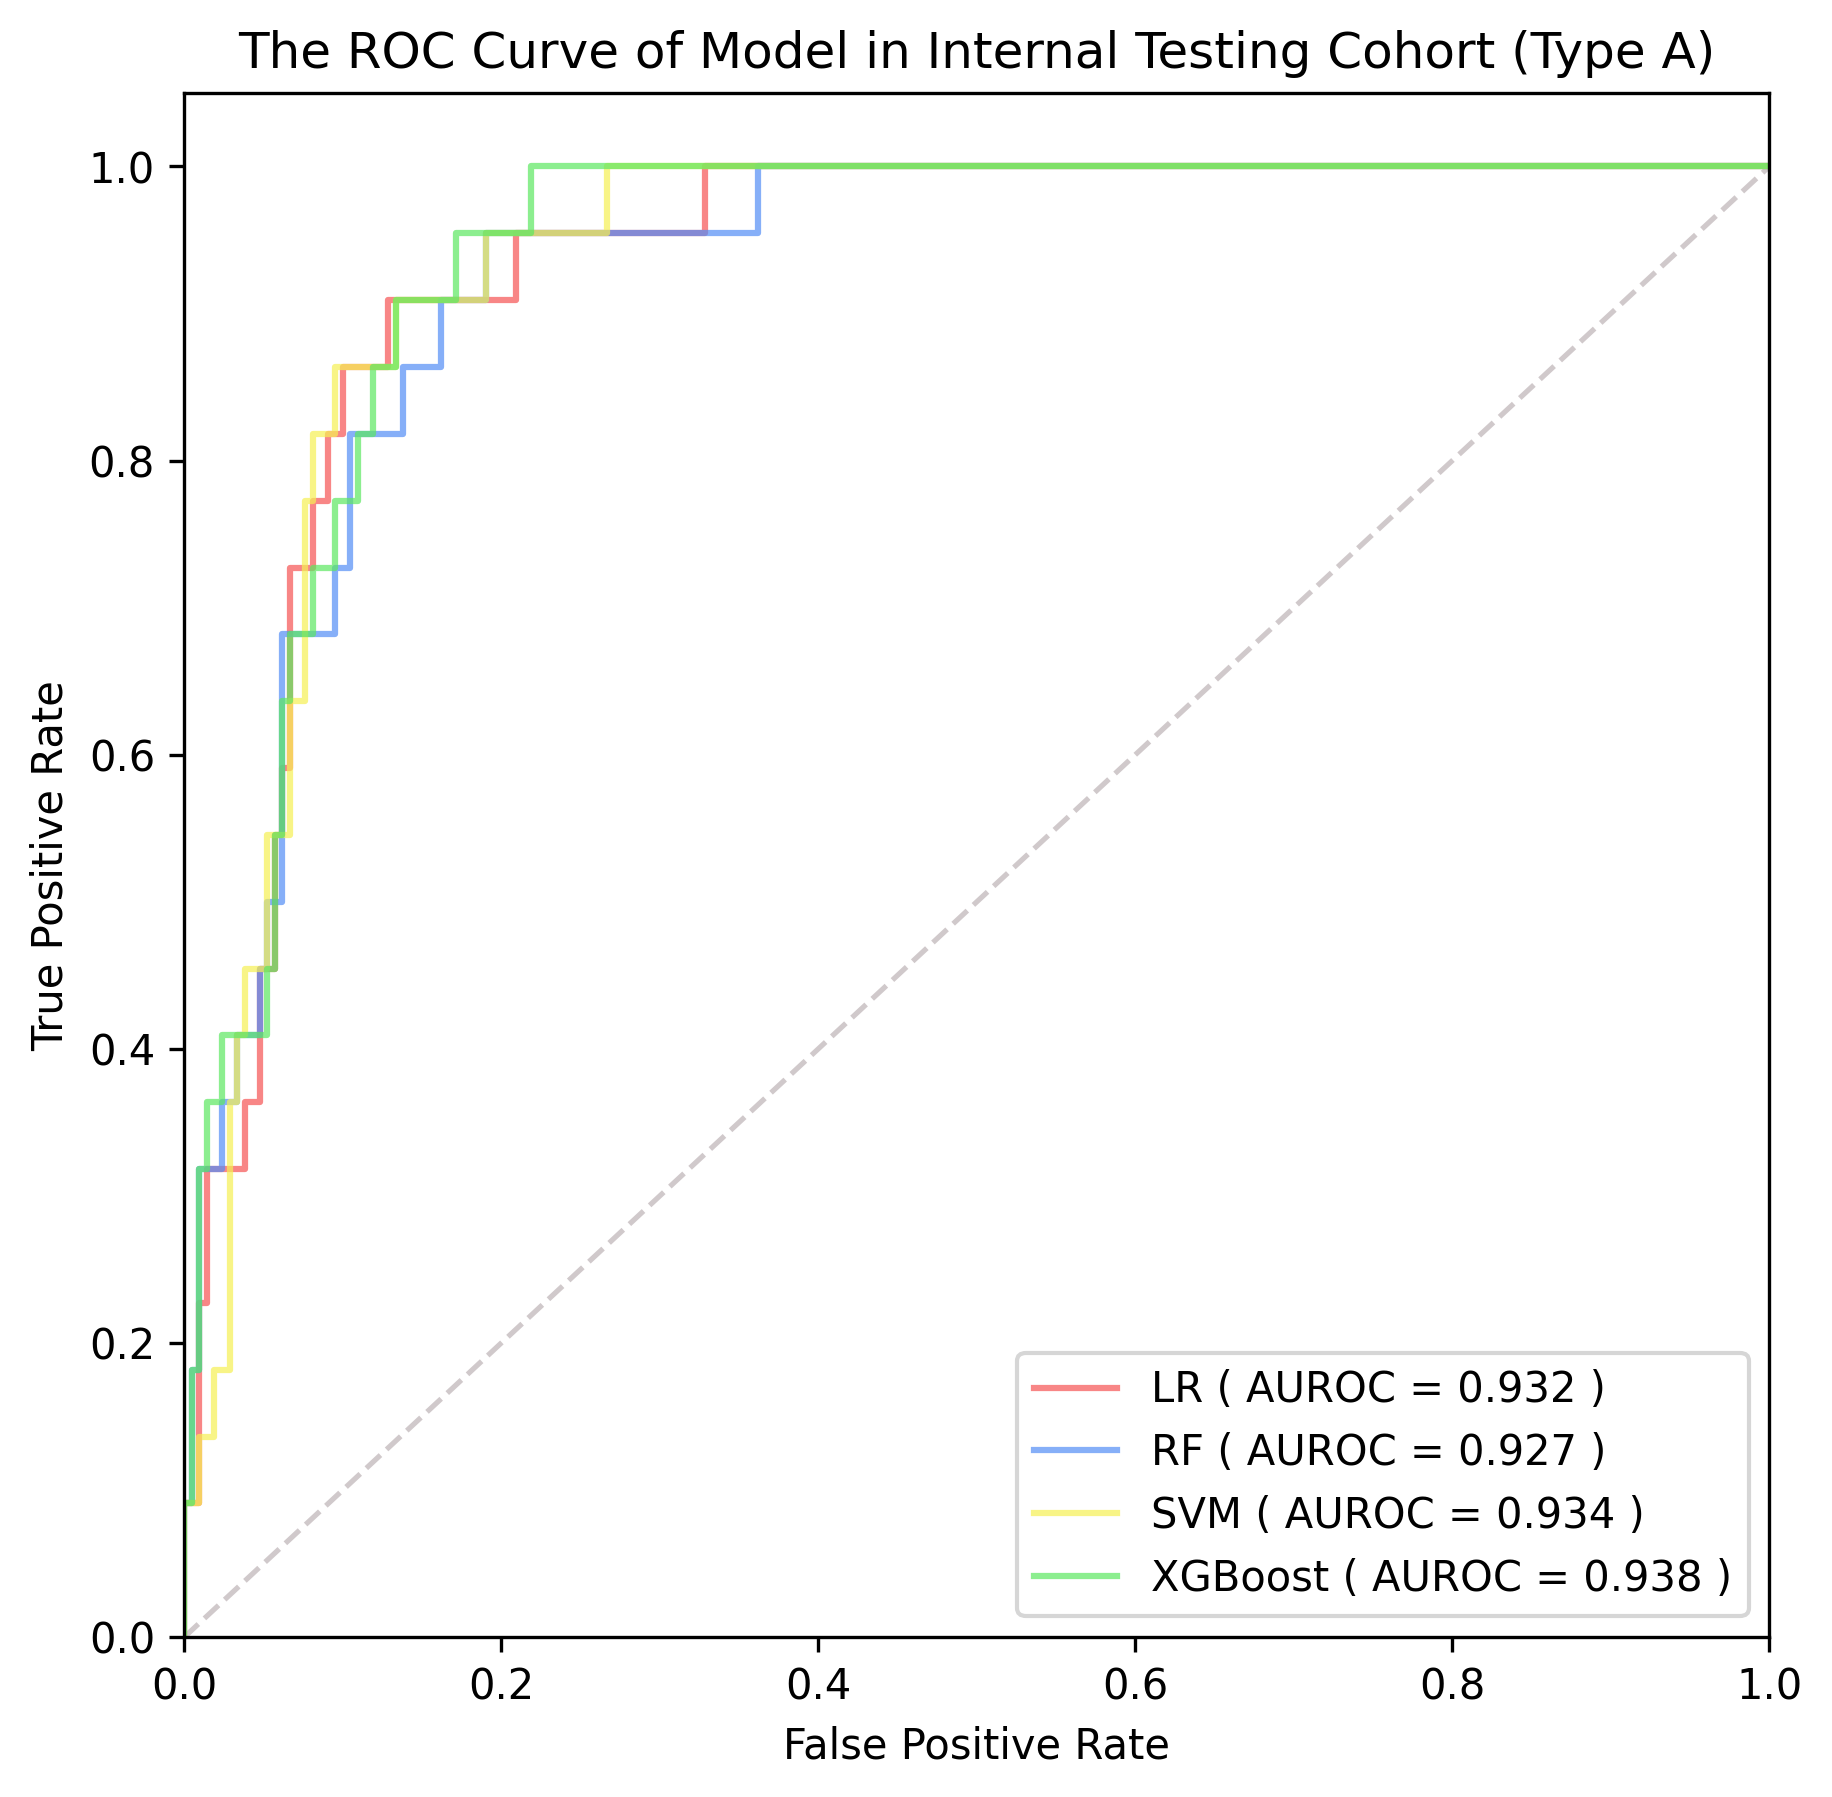

In [27]:
ROC = PlotROC(CM_Name_List_1)
ROC.roc_set(title="The ROC Curve of Model in Internal Testing Cohort (Type A)", colorlist=Color_List)
ROC.plot()

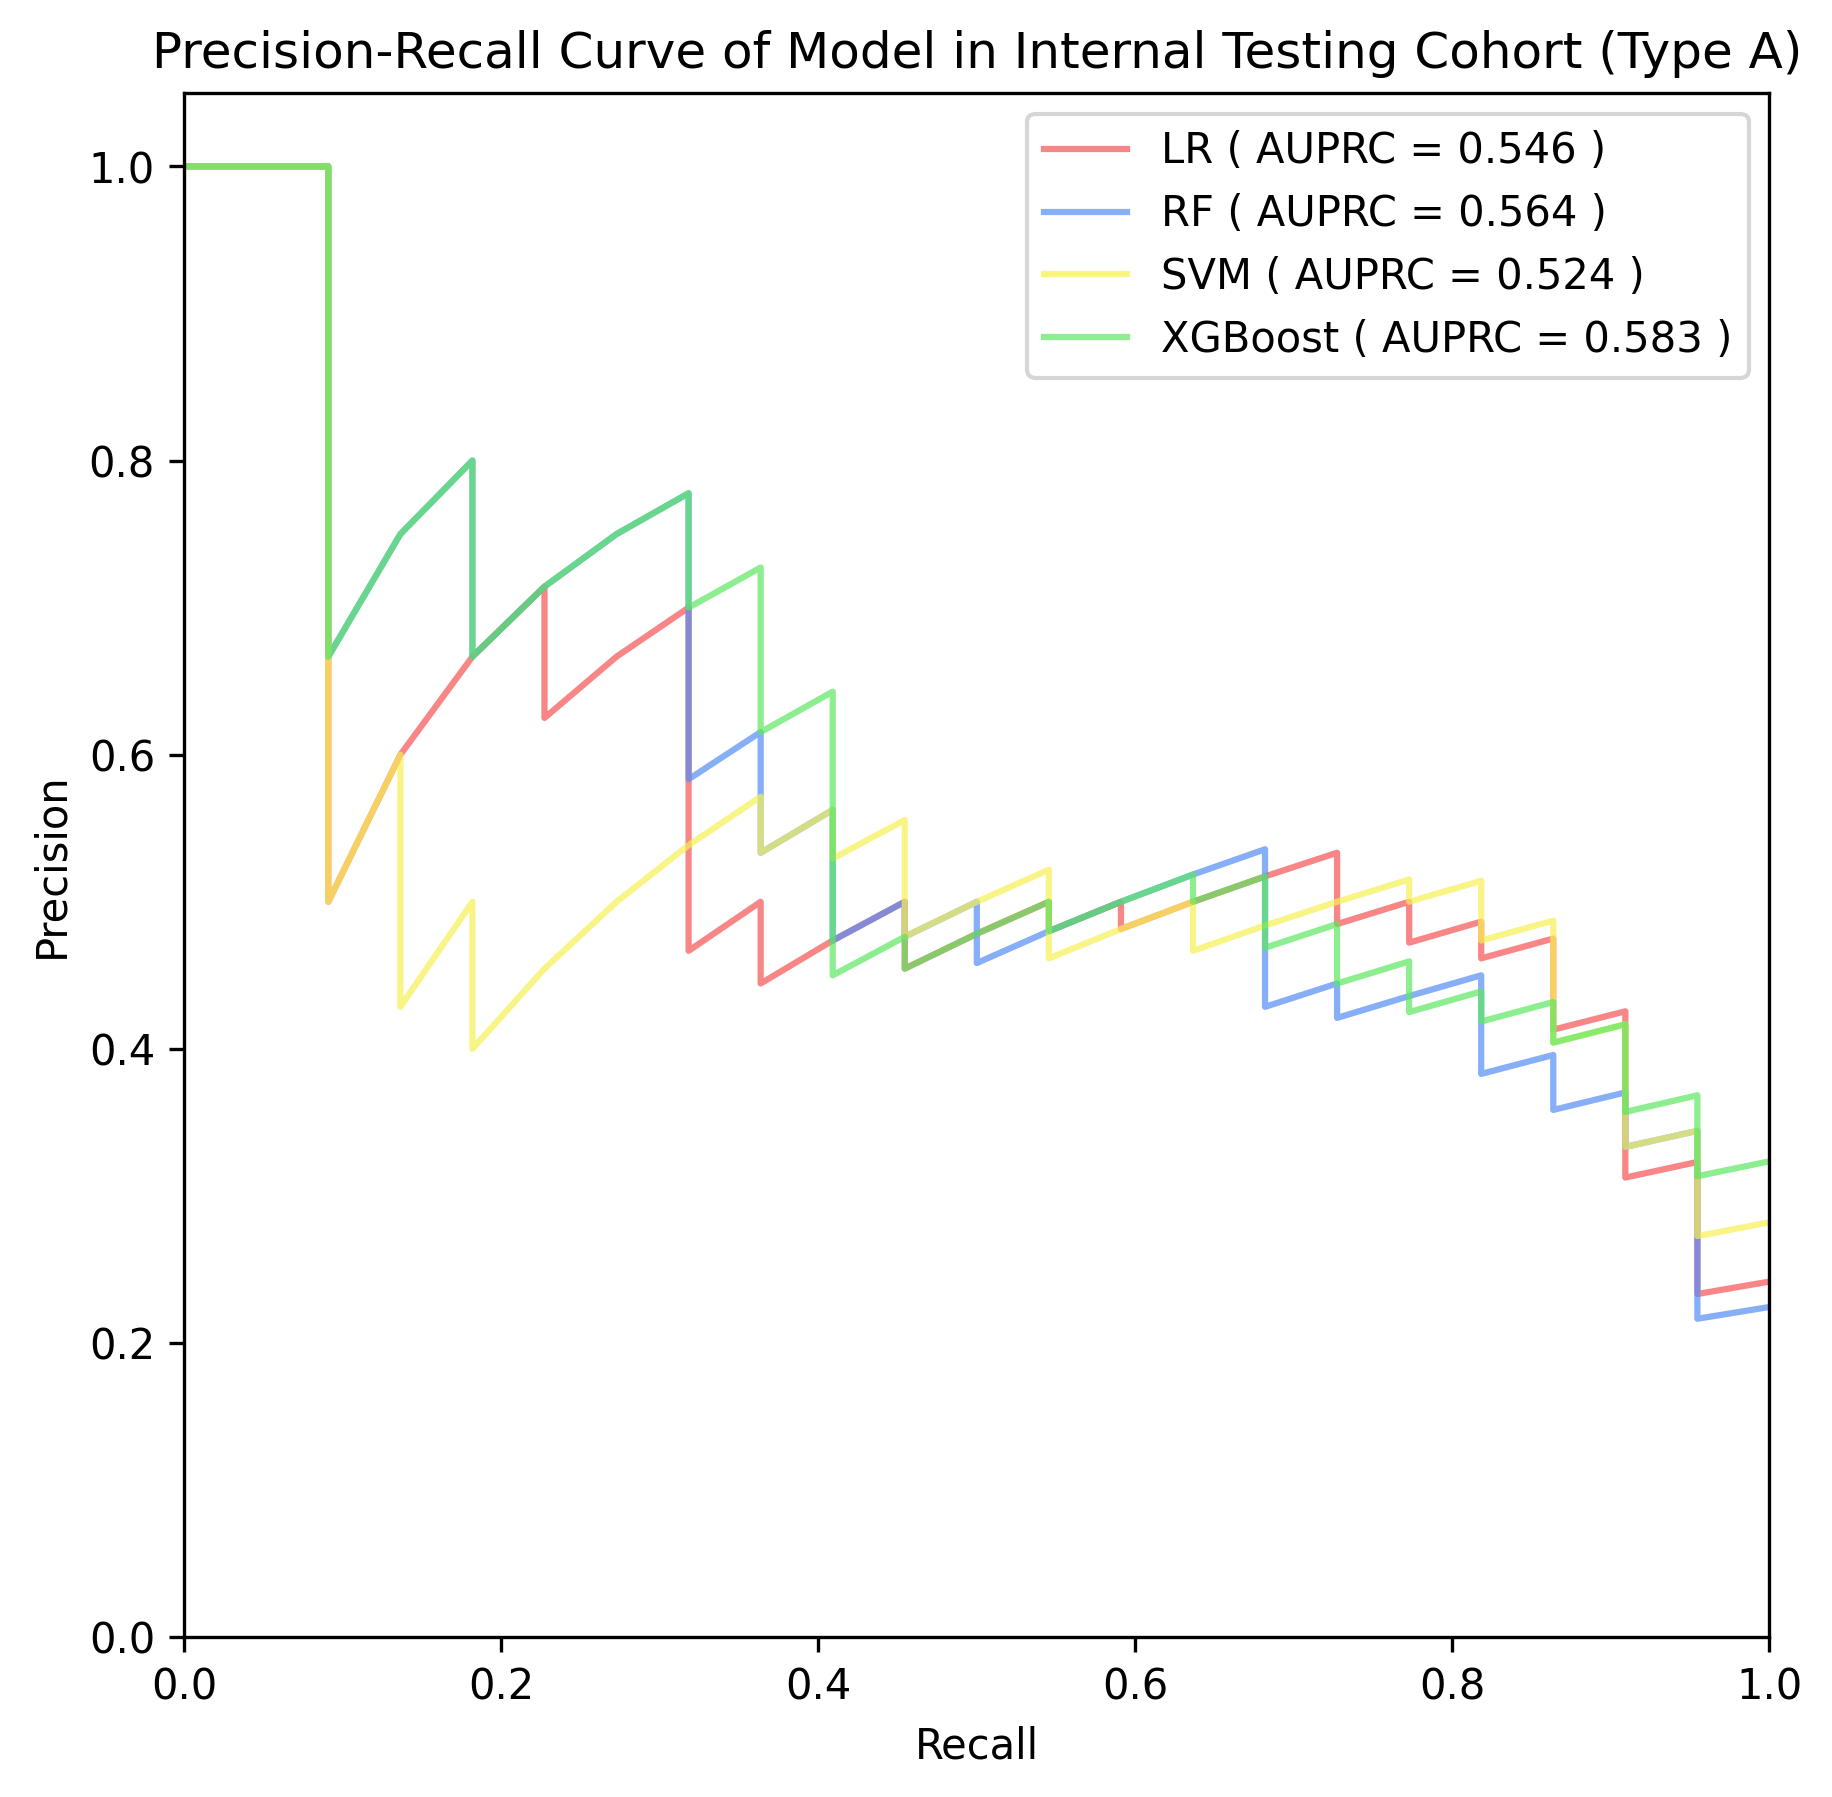

In [28]:
PRC = PlotPRC(CM_Name_List_1)
PRC.prc_set(title='Precision-Recall Curve of Model in Internal Testing Cohort (Type A)', colorlist=Color_List)
PRC.plot()

In [ ]:
# 图片保存

ROC.save(path='[3]Result/ROC_1.png', dpi=900)
PRC.save(path='[3]Result/PRC_1.png', dpi=900)

★ 术中低氧——术前+术中变量 ★

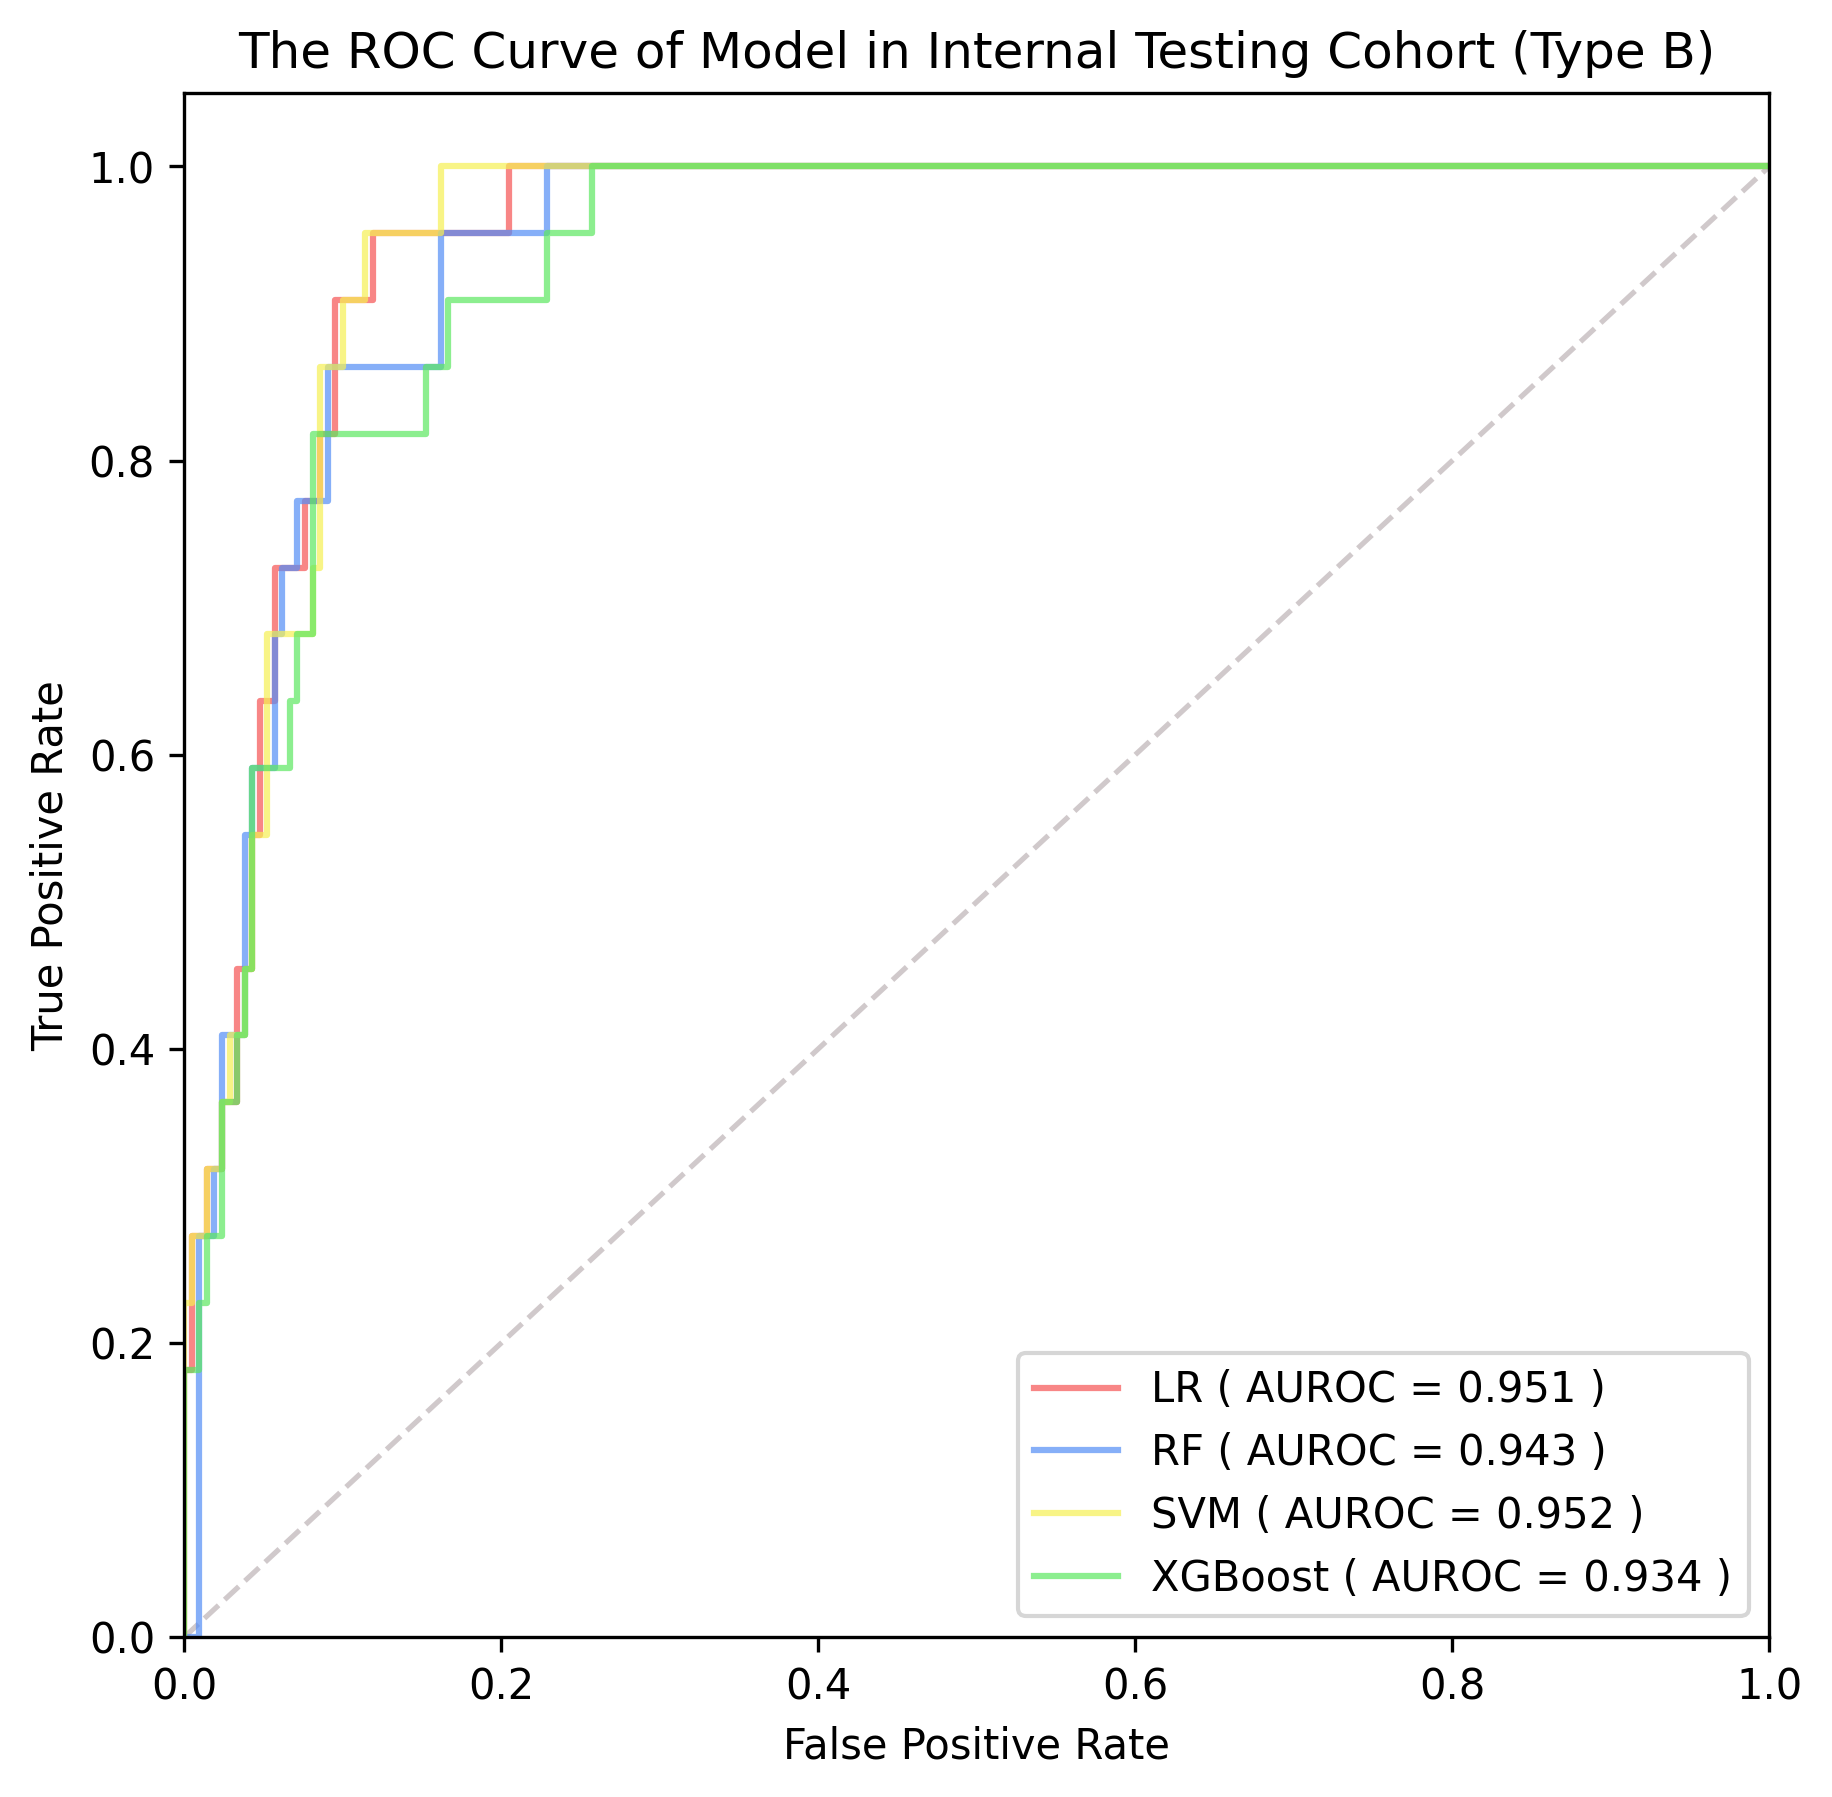

In [18]:
ROC = PlotROC(CM_Name_List_2)
ROC.roc_set(title="The ROC Curve of Model in Internal Testing Cohort (Type B)", colorlist=Color_List)
ROC.plot()

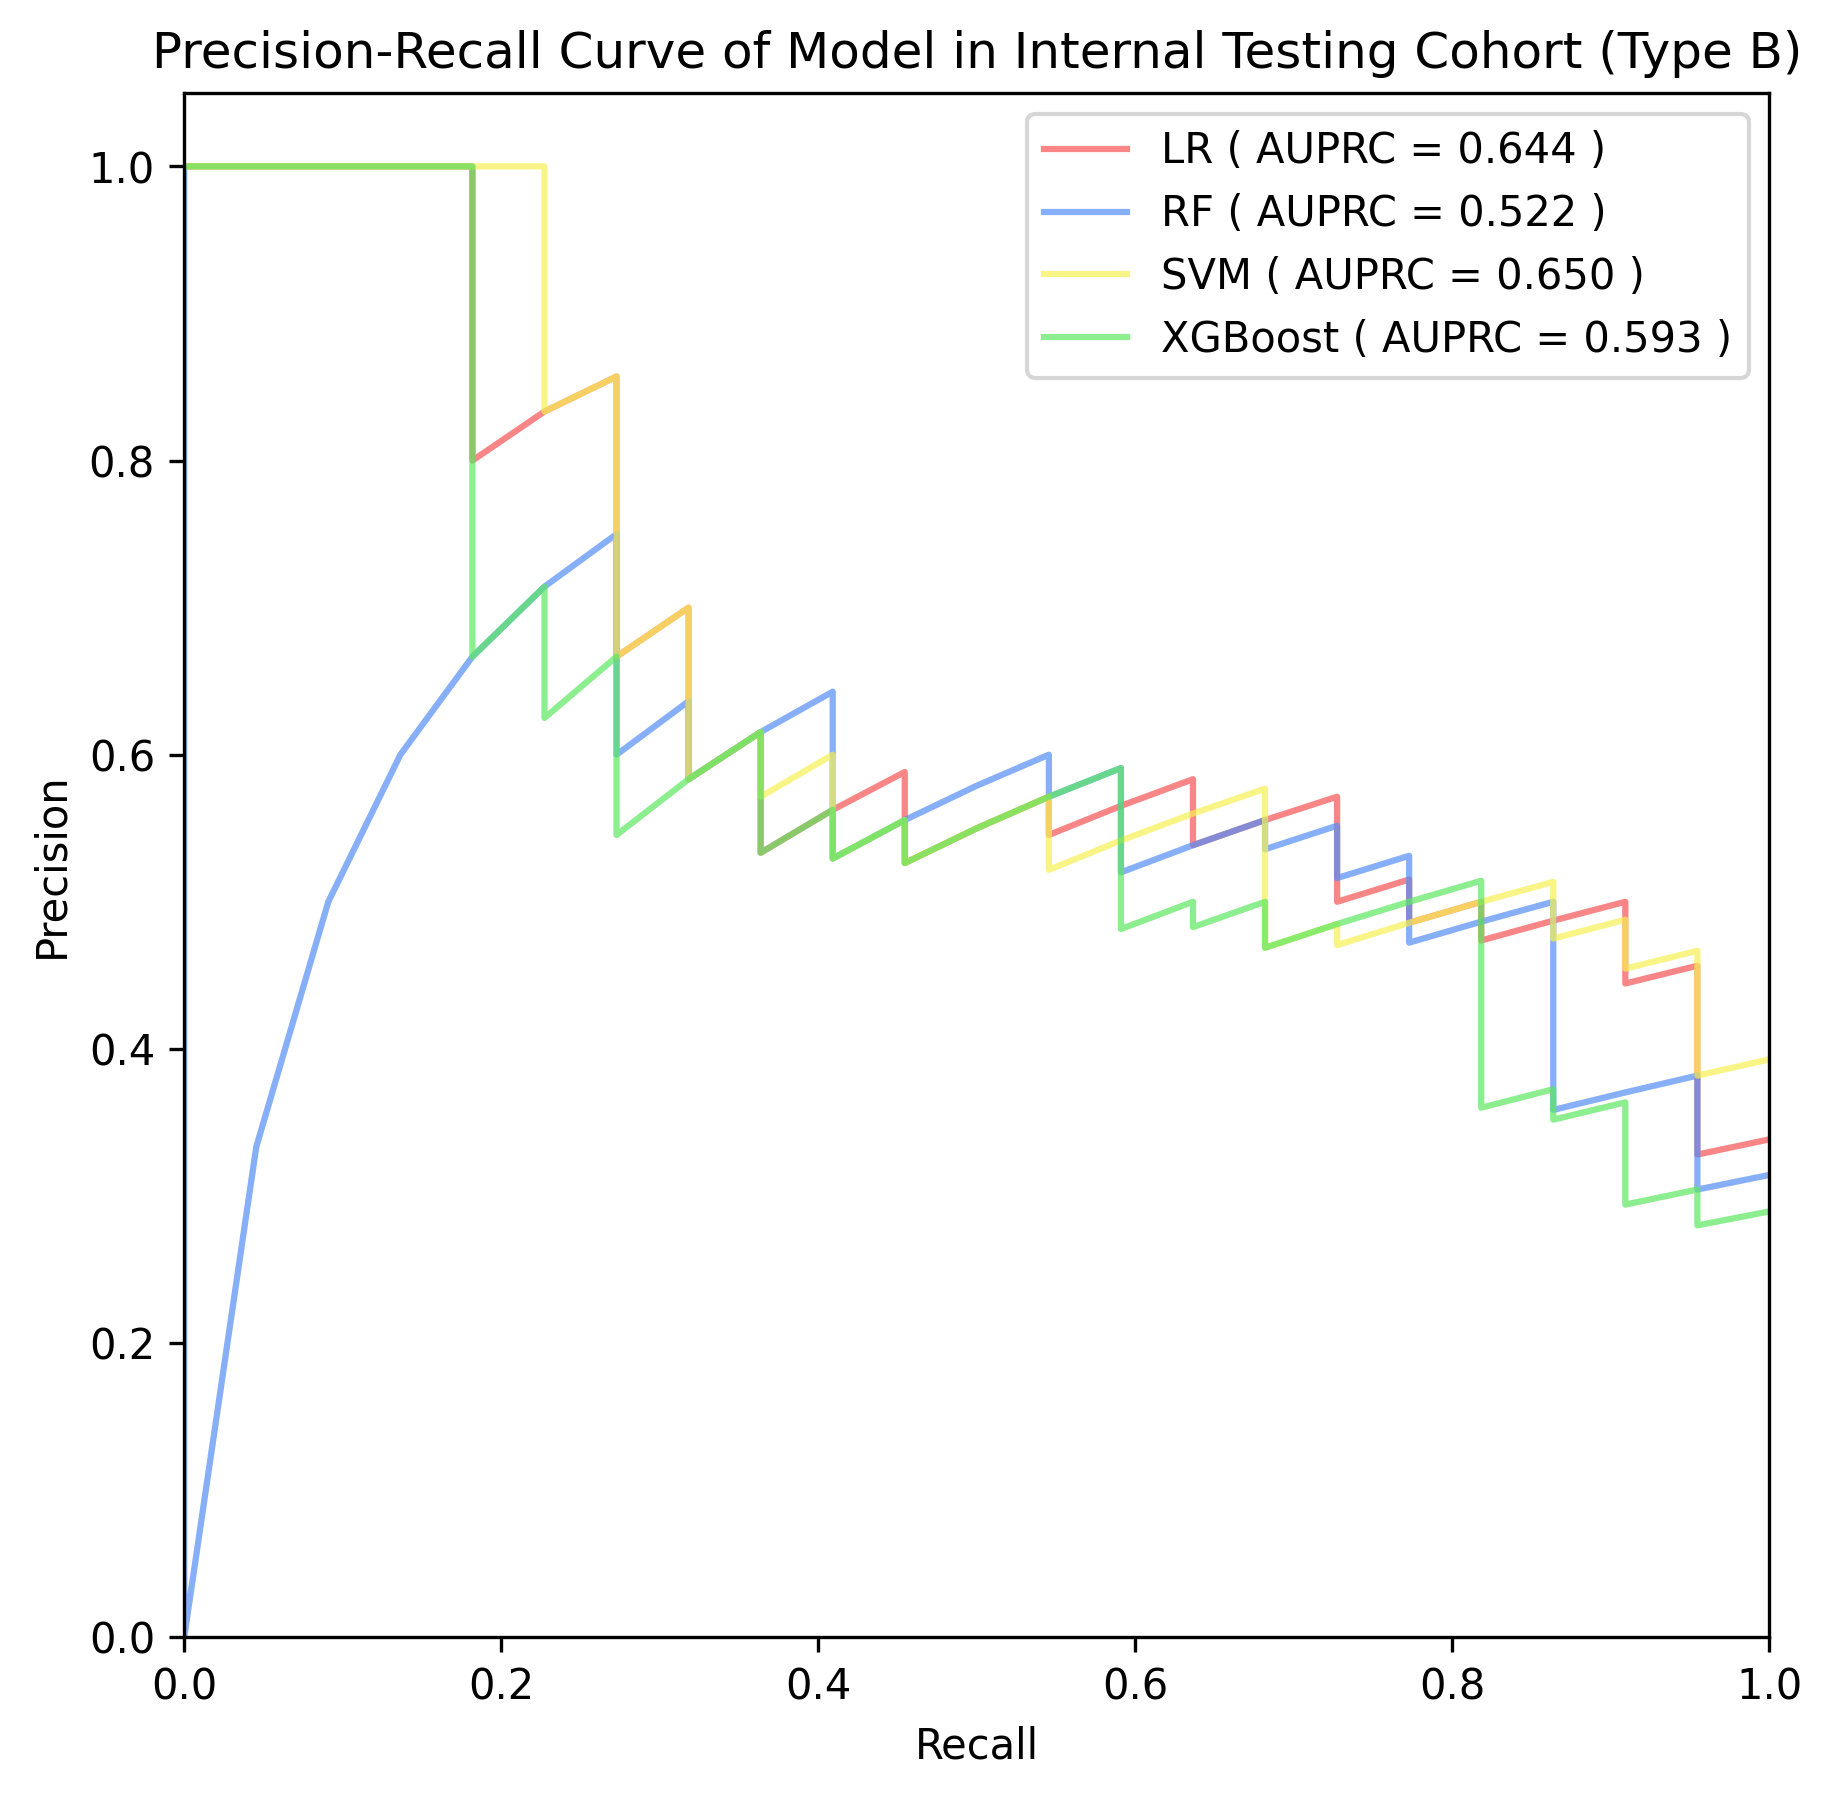

In [19]:
PRC = PlotPRC(CM_Name_List_2)
PRC.prc_set(title='Precision-Recall Curve of Model in Internal Testing Cohort (Type B)', colorlist=Color_List)
PRC.plot()

In [ ]:
# 图片保存

ROC.save(path='[3]Result/ROC_2.png', dpi=900)
PRC.save(path='[3]Result/PRC_2.png', dpi=900)

★ 诱导低氧——术前变量 ★

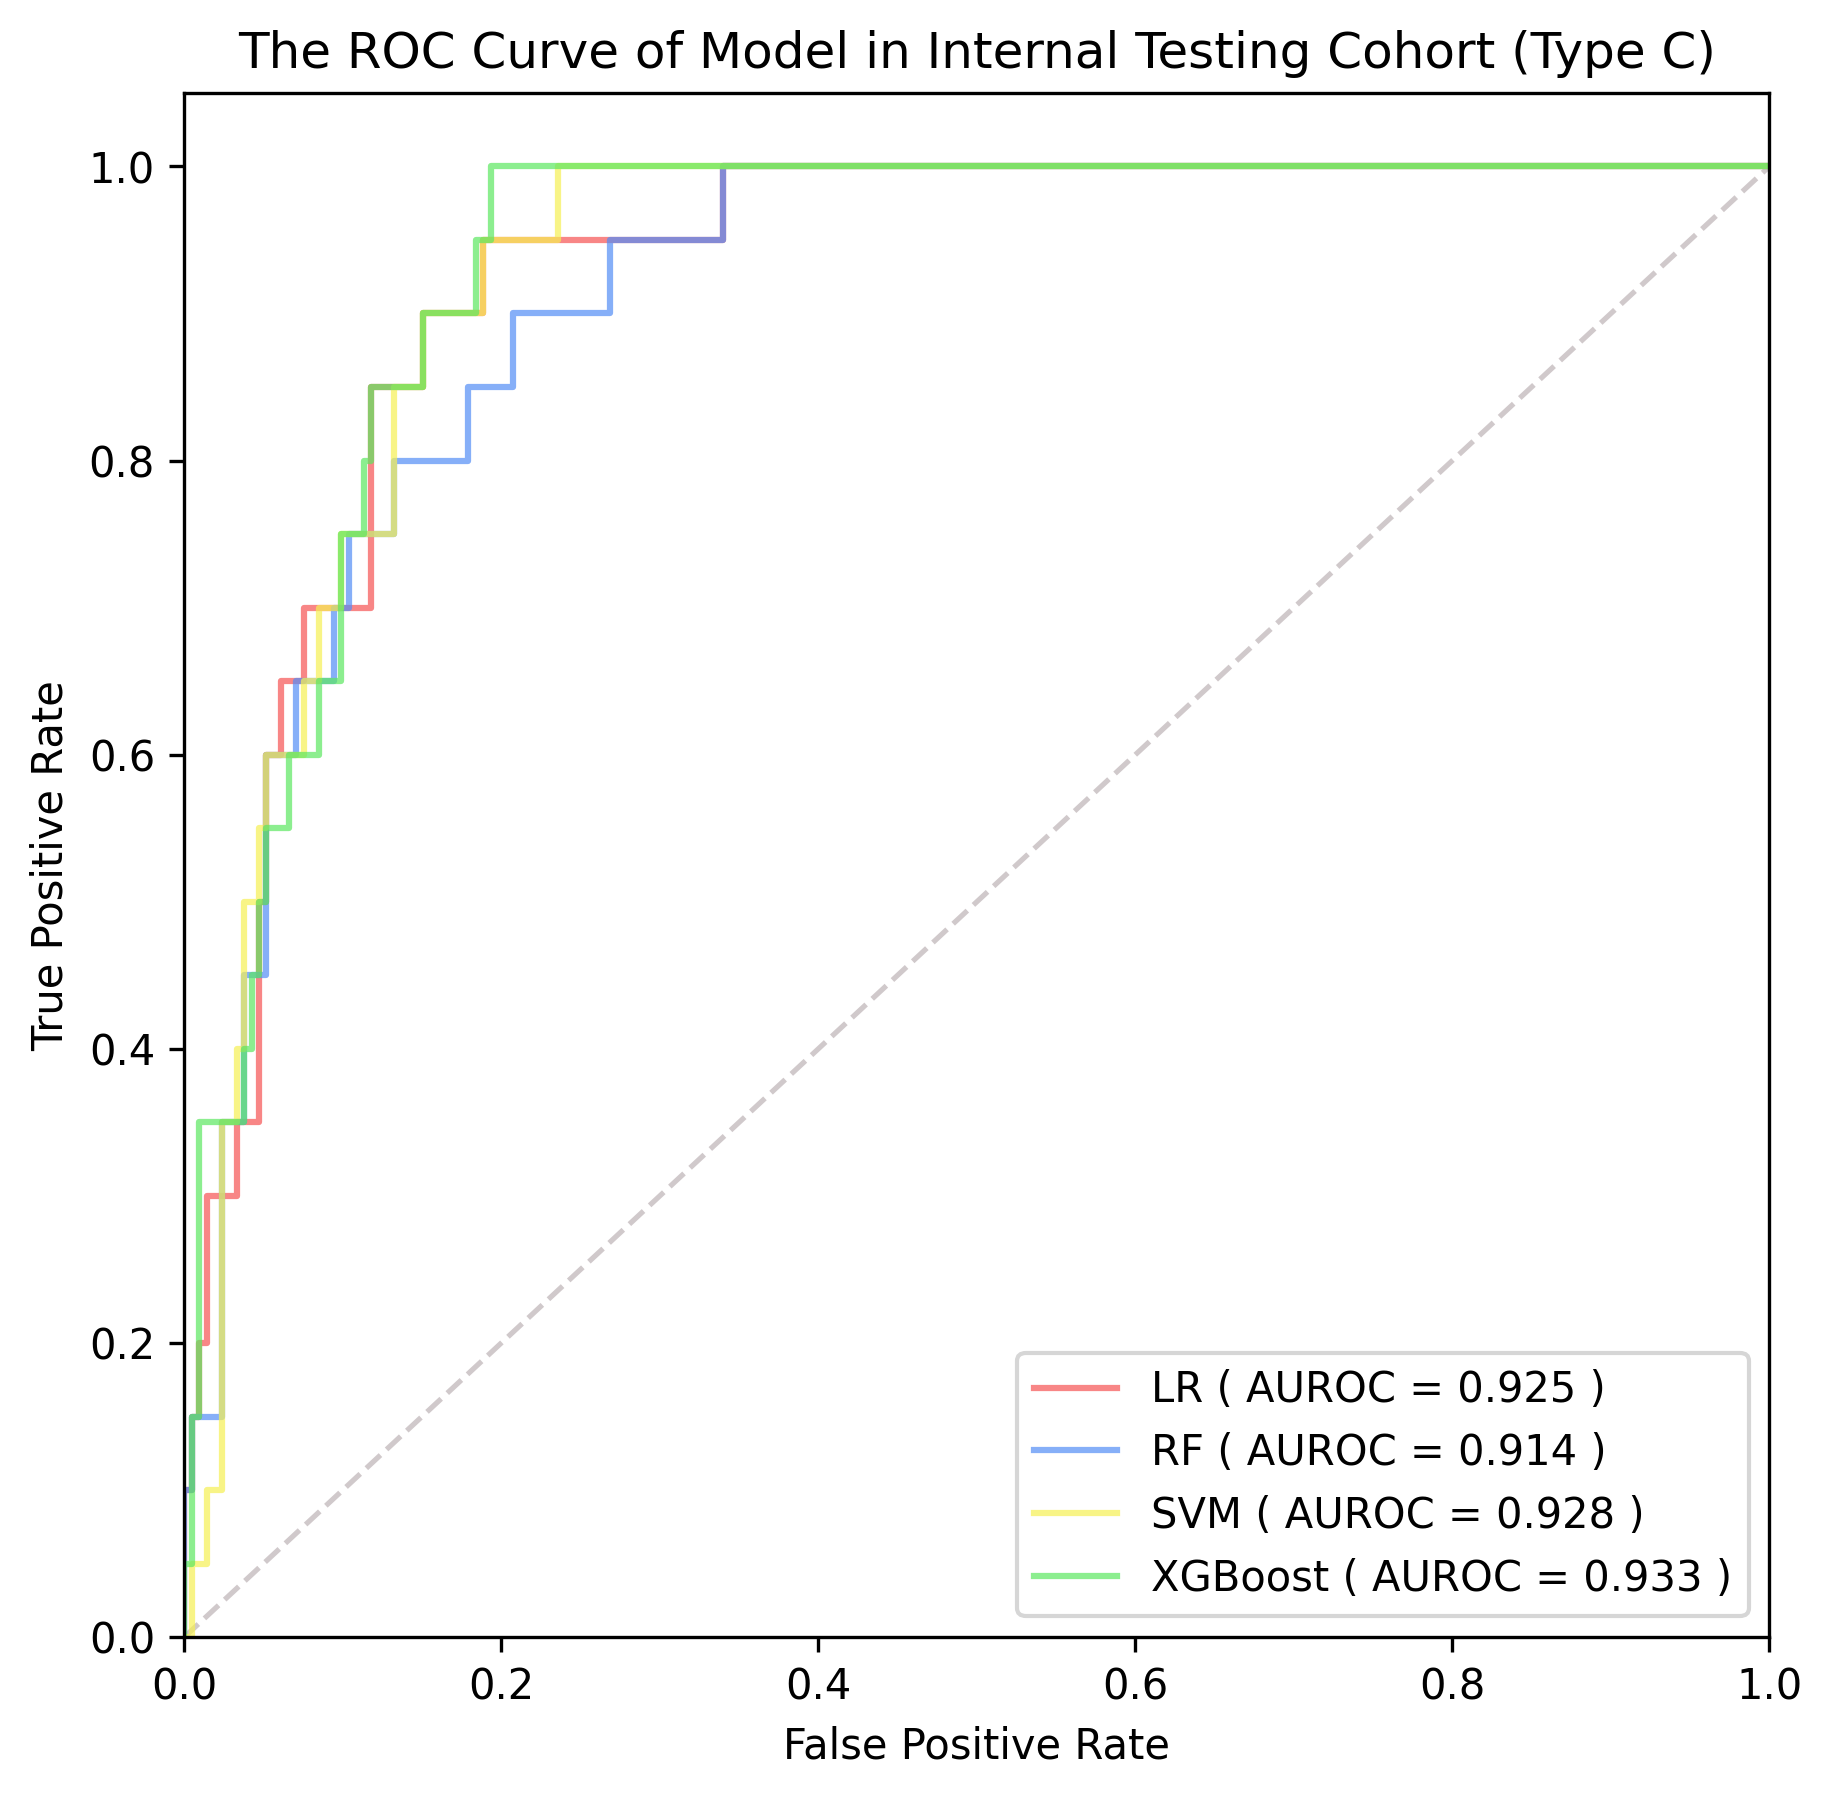

In [22]:
ROC = PlotROC(CM_Name_List_3)
ROC.roc_set(title="The ROC Curve of Model in Internal Testing Cohort (Type C)", colorlist=Color_List)
ROC.plot()

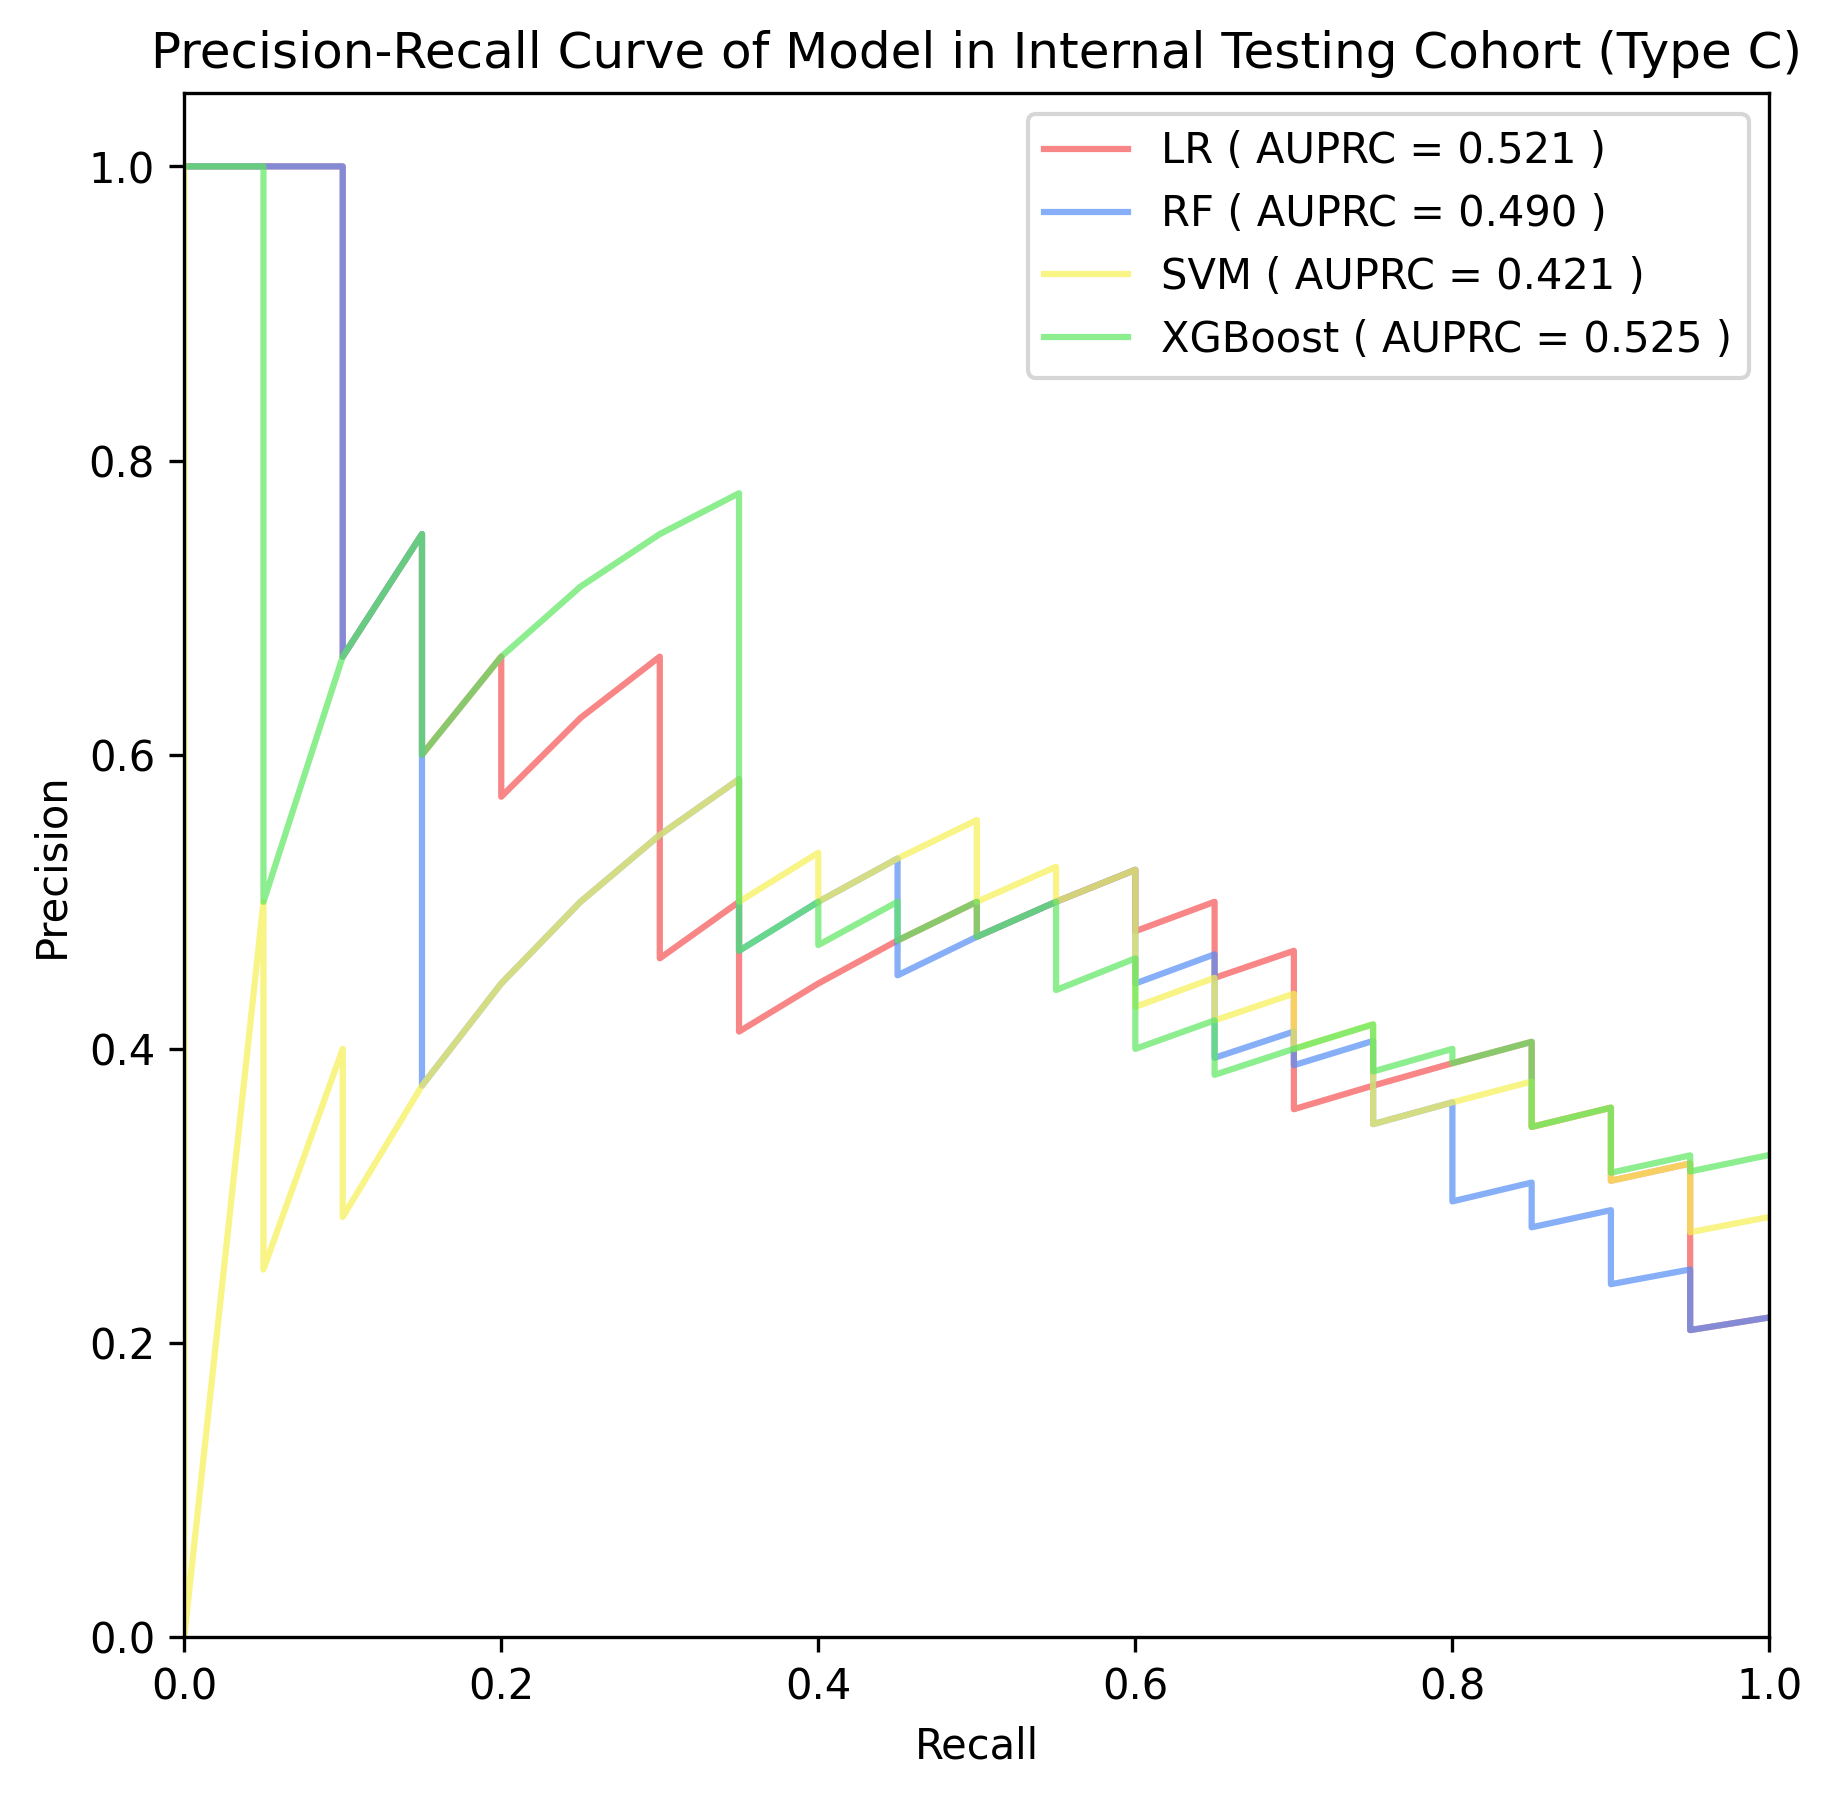

In [23]:
PRC = PlotPRC(CM_Name_List_3)
PRC.prc_set(title='Precision-Recall Curve of Model in Internal Testing Cohort (Type C)', colorlist=Color_List)
PRC.plot()

In [ ]:
# 图片保存

ROC.save(path='[3]Result/ROC_3.png', dpi=900)
PRC.save(path='[3]Result/PRC_3.png', dpi=900)

★ 诱导低氧——术前+诱导变量 ★

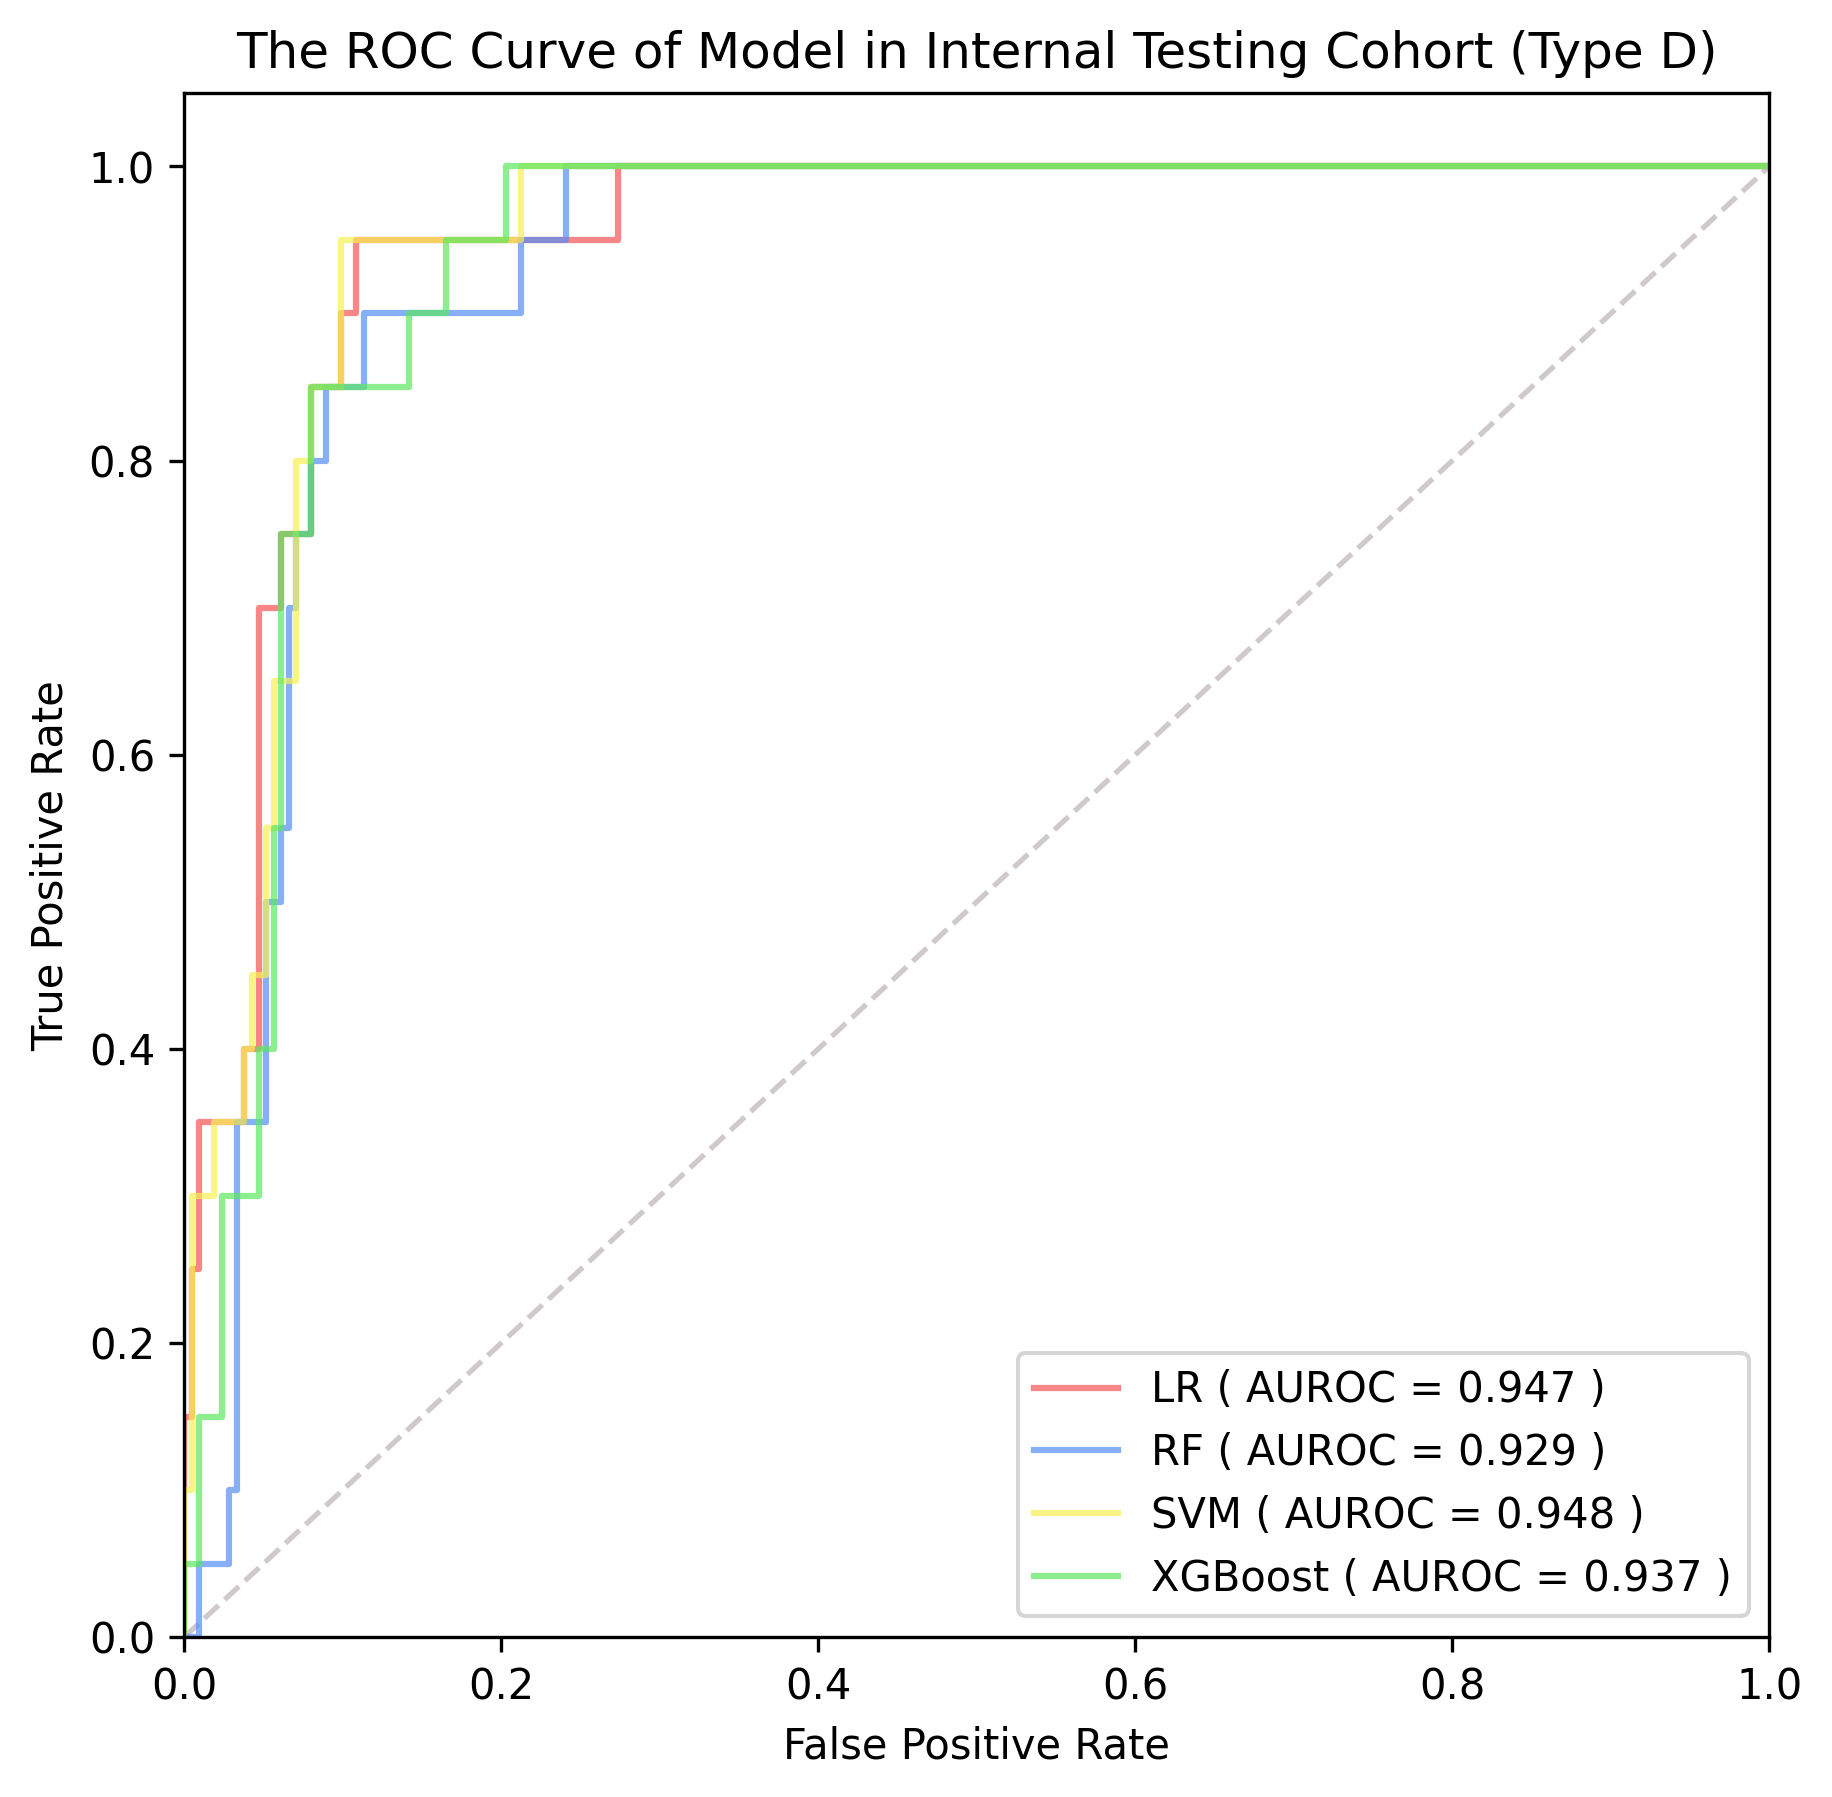

In [26]:
ROC = PlotROC(CM_Name_List_4)
ROC.roc_set(title="The ROC Curve of Model in Internal Testing Cohort (Type D)", colorlist=Color_List)
ROC.plot()

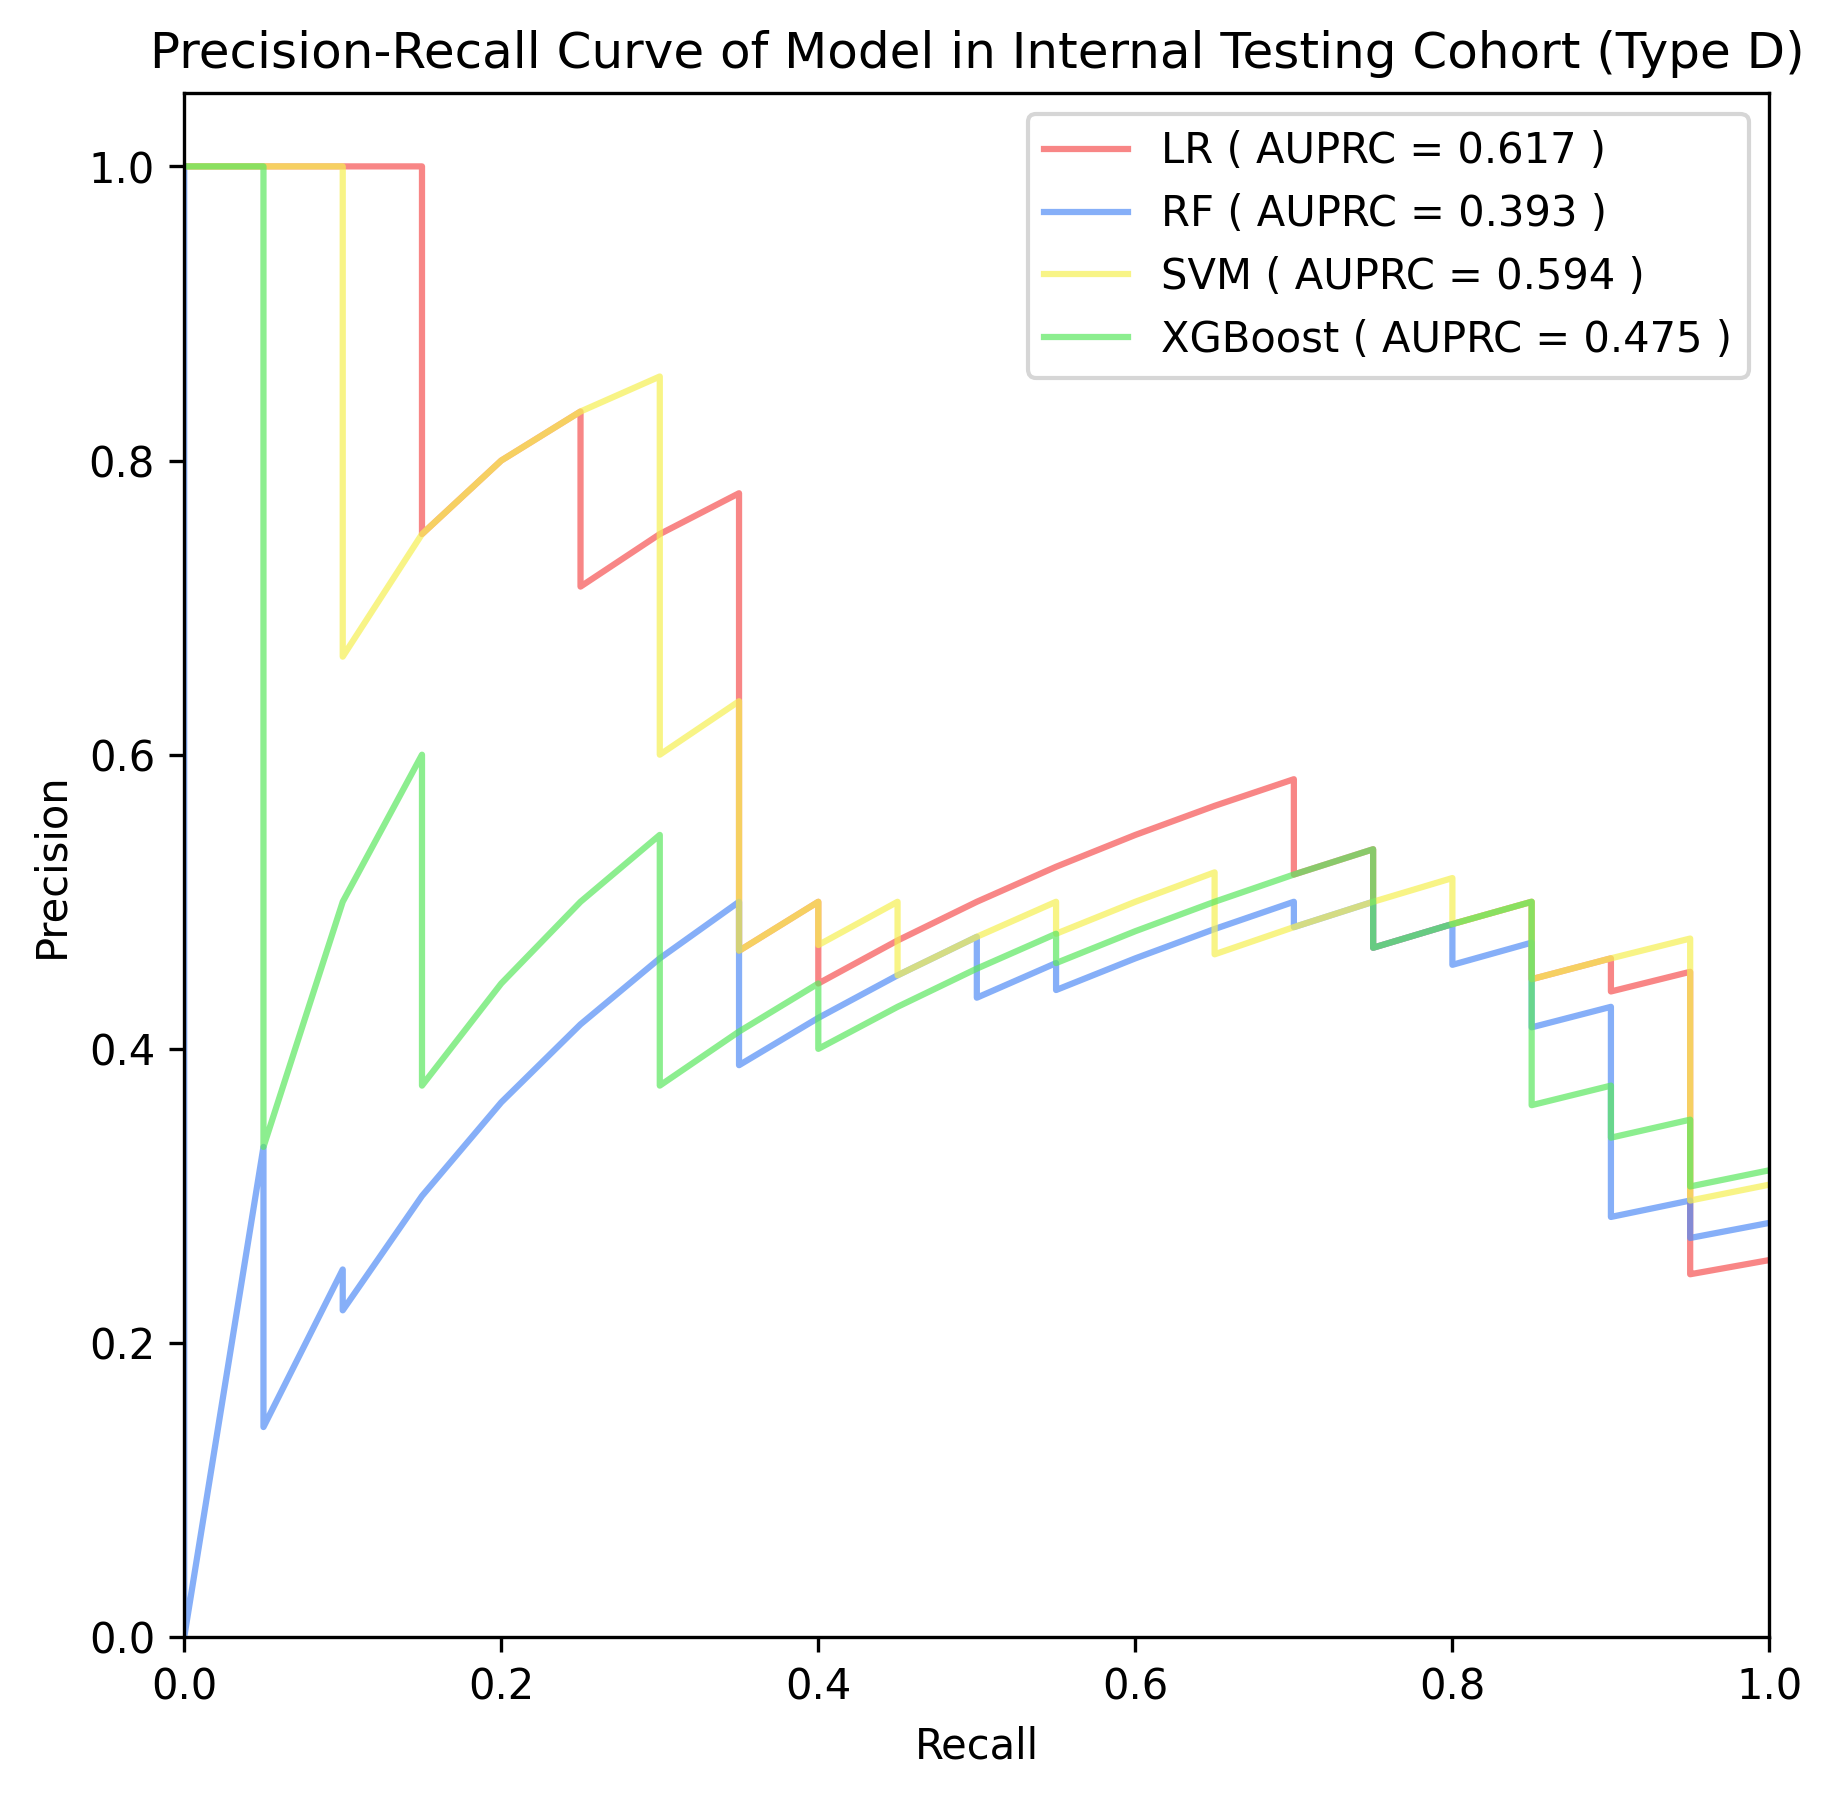

In [27]:
PRC = PlotPRC(CM_Name_List_4)
PRC.prc_set(title='Precision-Recall Curve of Model in Internal Testing Cohort (Type D)', colorlist=Color_List)
PRC.plot()

In [ ]:
# 图片保存

ROC.save(path='[3]Result/ROC_4.png', dpi=900)
PRC.save(path='[3]Result/PRC_4.png', dpi=900)

# 

In [33]:
"""术中低氧——术前变量"""
# Delong检验
dlt = DelongTest(CM_Name_List_1)
dlt.test()

The Result of Delong Test：
 
【LR & RF】
 AUROC of LR： 0.932 (0.892 - 0.971)
 AUROC of RF： 0.927 (0.885 - 0.969)
 P-Value：0.6053
 
【LR & SVM】
 AUROC of LR： 0.932 (0.892 - 0.971)
 AUROC of SVM： 0.934 (0.899 - 0.970)
 P-Value：0.6143
 
【LR & XGBoost】
 AUROC of LR： 0.932 (0.892 - 0.971)
 AUROC of XGBoost： 0.938 (0.905 - 0.971)
 P-Value：0.5378
 
【RF & SVM】
 AUROC of RF： 0.927 (0.885 - 0.969)
 AUROC of SVM： 0.934 (0.899 - 0.970)
 P-Value：0.4224
 
【RF & XGBoost】
 AUROC of RF： 0.927 (0.885 - 0.969)
 AUROC of XGBoost： 0.938 (0.905 - 0.971)
 P-Value：0.2669
 
【SVM & XGBoost】
 AUROC of SVM： 0.934 (0.899 - 0.970)
 AUROC of XGBoost： 0.938 (0.905 - 0.971)
 P-Value：0.6503


In [51]:
"""术中低氧——术前+术中变量"""
# Delong检验
dlt = DelongTest(CM_Name_List_2)
dlt.test()

The Result of Delong Test：
 
【LR & RF】
 AUROC of LR： 0.951 (0.922 - 0.979)
 AUROC of RF： 0.943 (0.910 - 0.975)
 P-Value：0.4438
 
【LR & SVM】
 AUROC of LR： 0.951 (0.922 - 0.979)
 AUROC of SVM： 0.952 (0.924 - 0.979)
 P-Value：0.7961
 
【LR & XGBoost】
 AUROC of LR： 0.951 (0.922 - 0.979)
 AUROC of XGBoost： 0.934 (0.896 - 0.971)
 P-Value：0.0776
 
【RF & SVM】
 AUROC of RF： 0.943 (0.910 - 0.975)
 AUROC of SVM： 0.952 (0.924 - 0.979)
 P-Value：0.3223
 
【RF & XGBoost】
 AUROC of RF： 0.943 (0.910 - 0.975)
 AUROC of XGBoost： 0.934 (0.896 - 0.971)
 P-Value：0.4526
 
【SVM & XGBoost】
 AUROC of SVM： 0.952 (0.924 - 0.979)
 AUROC of XGBoost： 0.934 (0.896 - 0.971)
 P-Value：0.0912


In [53]:
"""诱导低氧——术前变量"""
# Delong检验
dlt = DelongTest(CM_Name_List_3)
dlt.test()

The Result of Delong Test：
 
【LR & RF】
 AUROC of LR： 0.925 (0.883 - 0.968)
 AUROC of RF： 0.914 (0.866 - 0.962)
 P-Value：0.2957
 
【LR & SVM】
 AUROC of LR： 0.925 (0.883 - 0.968)
 AUROC of SVM： 0.928 (0.890 - 0.965)
 P-Value：0.7468
 
【LR & XGBoost】
 AUROC of LR： 0.925 (0.883 - 0.968)
 AUROC of XGBoost： 0.933 (0.898 - 0.969)
 P-Value：0.5293
 
【RF & SVM】
 AUROC of RF： 0.914 (0.866 - 0.962)
 AUROC of SVM： 0.928 (0.890 - 0.965)
 P-Value：0.2480
 
【RF & XGBoost】
 AUROC of RF： 0.914 (0.866 - 0.962)
 AUROC of XGBoost： 0.933 (0.898 - 0.969)
 P-Value：0.1121
 
【SVM & XGBoost】
 AUROC of SVM： 0.928 (0.890 - 0.965)
 AUROC of XGBoost： 0.933 (0.898 - 0.969)
 P-Value：0.5717


In [55]:
"""诱导低氧——术前+诱导变量"""
# Delong检验
dlt = DelongTest(CM_Name_List_4)
dlt.test()

The Result of Delong Test：
 
【LR & RF】
 AUROC of LR： 0.947 (0.914 - 0.981)
 AUROC of RF： 0.929 (0.892 - 0.966)
 P-Value：0.1418
 
【LR & SVM】
 AUROC of LR： 0.947 (0.914 - 0.981)
 AUROC of SVM： 0.948 (0.918 - 0.979)
 P-Value：0.8960
 
【LR & XGBoost】
 AUROC of LR： 0.947 (0.914 - 0.981)
 AUROC of XGBoost： 0.937 (0.903 - 0.970)
 P-Value：0.2886
 
【RF & SVM】
 AUROC of RF： 0.929 (0.892 - 0.966)
 AUROC of SVM： 0.948 (0.918 - 0.979)
 P-Value：0.0631
 
【RF & XGBoost】
 AUROC of RF： 0.929 (0.892 - 0.966)
 AUROC of XGBoost： 0.937 (0.903 - 0.970)
 P-Value：0.3614
 
【SVM & XGBoost】
 AUROC of SVM： 0.948 (0.918 - 0.979)
 AUROC of XGBoost： 0.937 (0.903 - 0.970)
 P-Value：0.1856


#### 

### ★ 术中低氧——术前变量 [XGBoost]

This confusion matrix is based on the threshold of 0.140



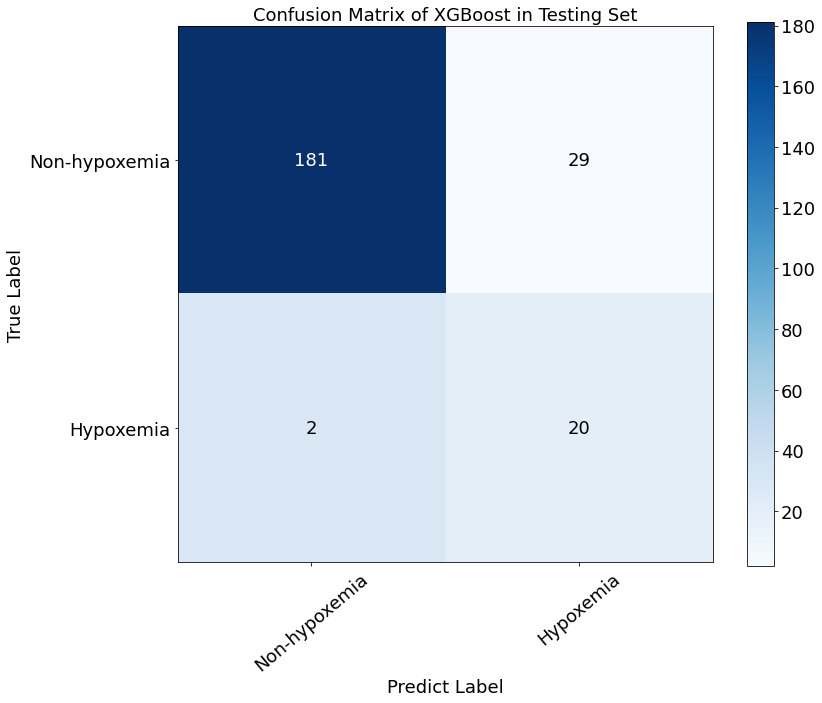

In [35]:
CM_XGBoost_1.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of XGBoost in Testing Set", 
                    reverse=True, Font_color_threshold=100)
CM_XGBoost_1.plot()

In [37]:
CM_XGBoost_1.save(dpi=900, CM=True, path_cm='[3]Result/confusion matrix_1.png')

混淆矩阵已保存，路径为：[3]Result/confusion matrix_1.png


### ★ 术中低氧——术前+术中变量 [SVM]

This confusion matrix is based on the threshold of 0.129



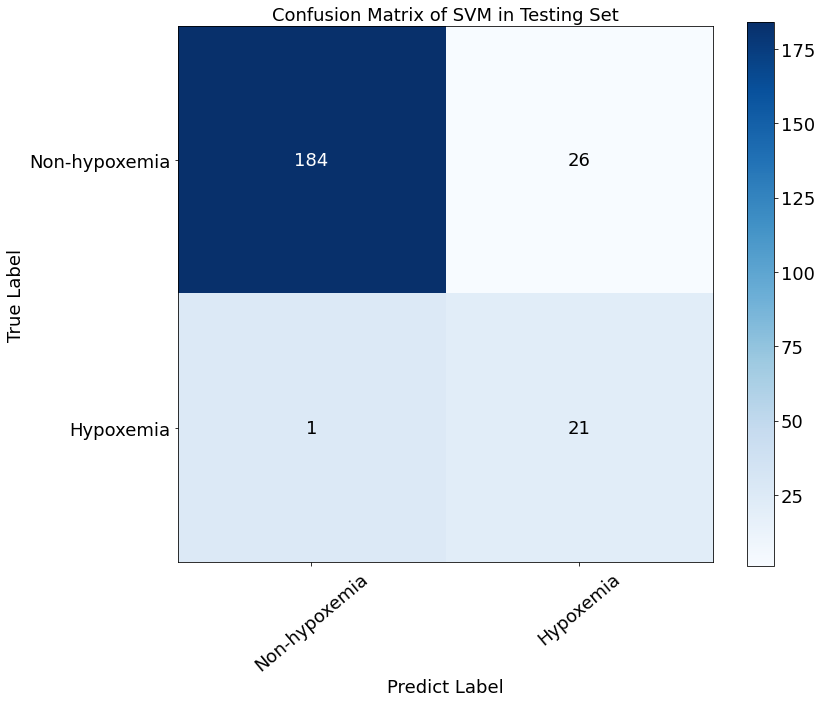

In [13]:
CM_SVM_2.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
                reverse=True, Font_color_threshold=100)
CM_SVM_2.plot()

In [14]:
CM_SVM_2.save(dpi=900, CM=True, path_cm='[3]Result/confusion matrix_2.png')

混淆矩阵已保存，路径为：[3]Result/confusion matrix_2.png


### ★ 诱导低氧——术前变量 [XGBoost]

This confusion matrix is based on the threshold of 0.083



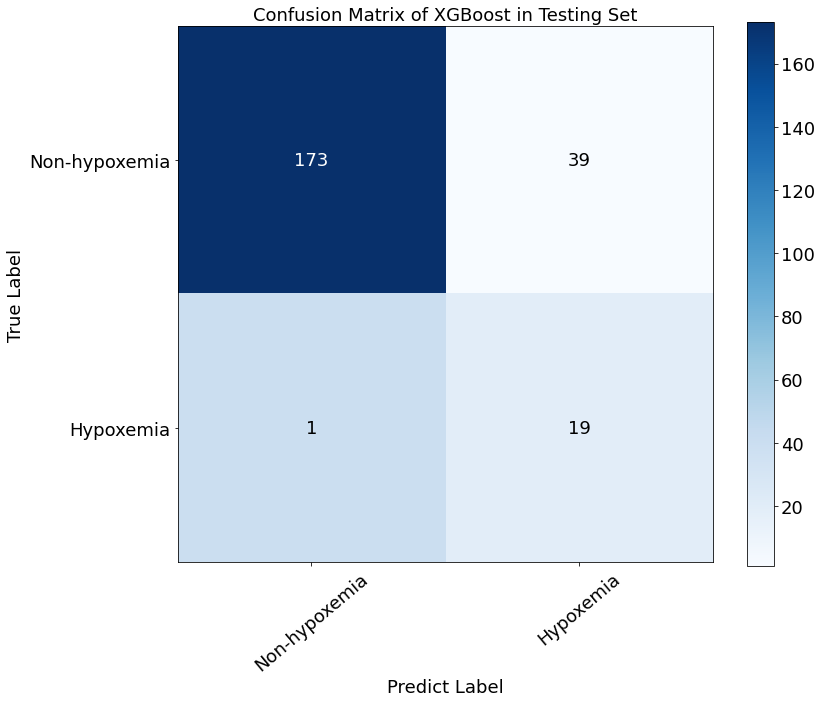

In [16]:
CM_XGBoost_3.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of XGBoost in Testing Set", 
                    reverse=True, Font_color_threshold=100)
CM_XGBoost_3.plot()

In [17]:
CM_XGBoost_3.save(dpi=900, CM=True, path_cm='[3]Result/confusion matrix_3.png')

混淆矩阵已保存，路径为：[3]Result/confusion matrix_3.png


### ★ 术中低氧——术前变量 [LR]

This confusion matrix is based on the threshold of 0.088



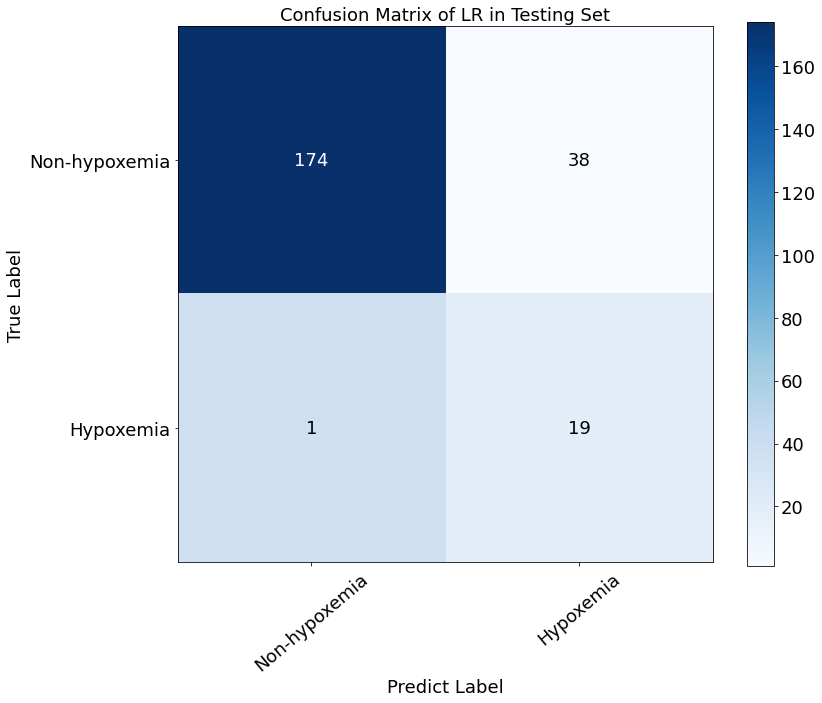

In [18]:
CM_LR_4.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of LR in Testing Set", 
               reverse=True, Font_color_threshold=100)
CM_LR_4.plot()

In [19]:
CM_LR_4.save(dpi=900, CM=True, path_cm='[3]Result/confusion matrix_4.png')

混淆矩阵已保存，路径为：[3]Result/confusion matrix_4.png


# ✦模型结果总结

In [44]:
# 所有模型的混淆矩阵列表
CM_Name_List = [(CM_XGBoost_1, 'Type A - XGBoost'), (CM_SVM_2, 'Type B - SVM'),
                (CM_XGBoost_3, 'Type C - XGBoost'),(CM_LR_4, 'Type D - LR')]

Color_List = ["#f65353", "#538df6", "#f6f053", "#5ce760"]

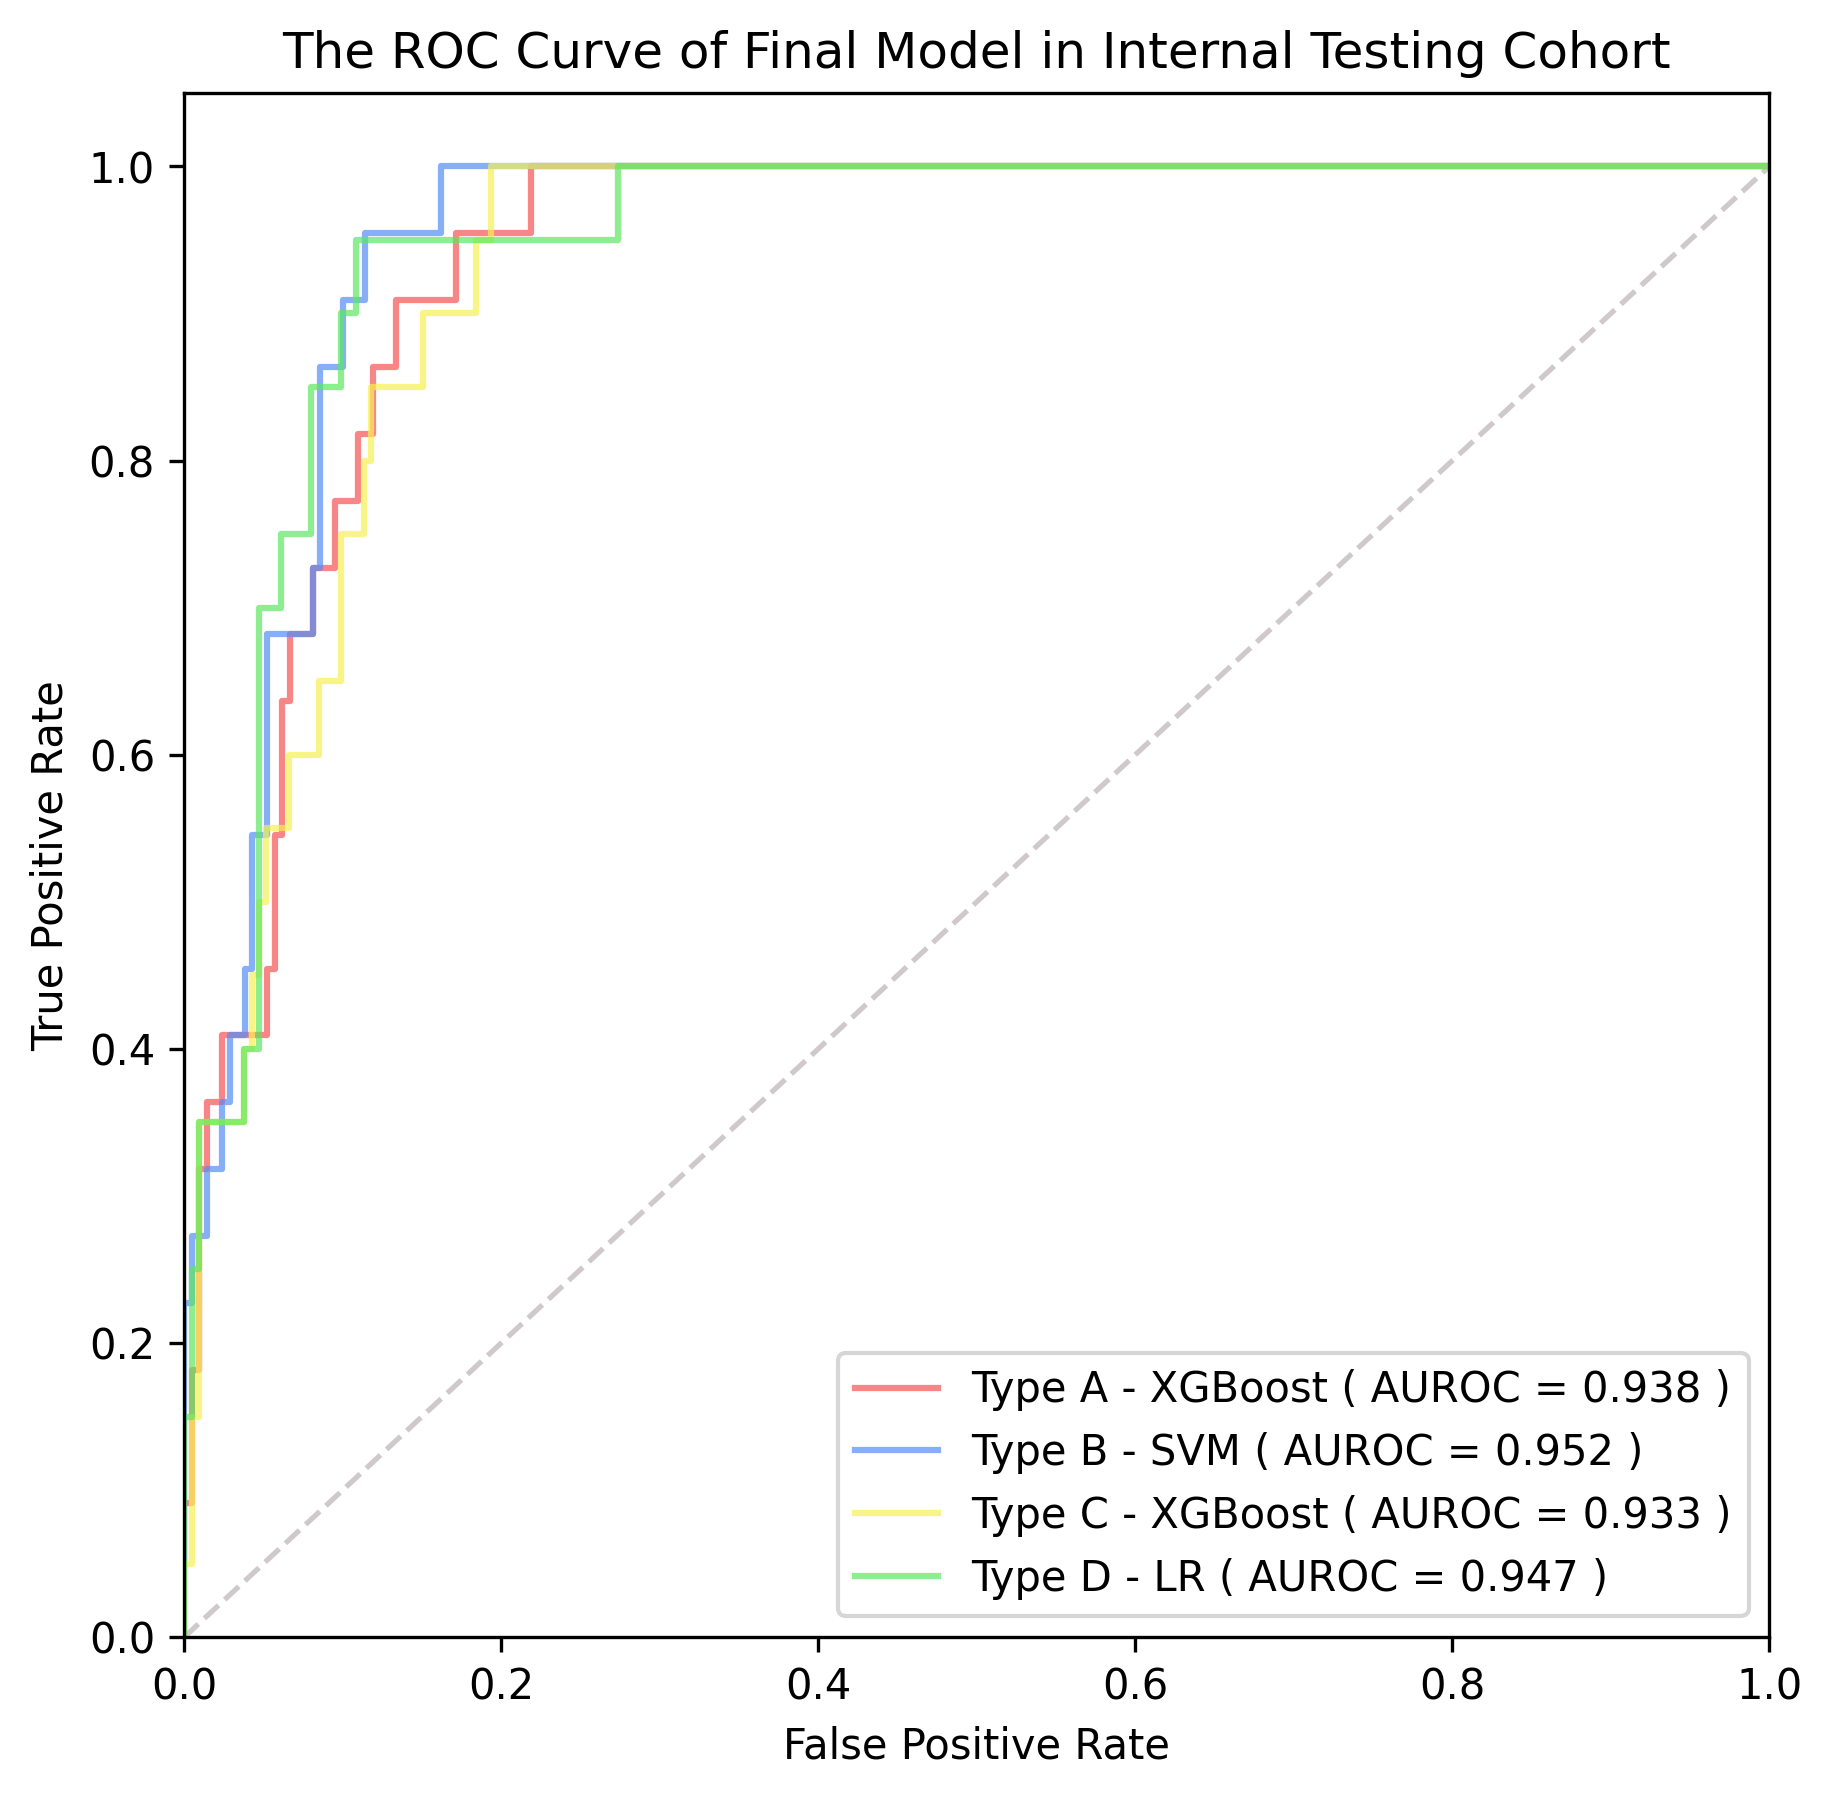

In [45]:
ROC = PlotROC(CM_Name_List)
ROC.roc_set(title="The ROC Curve of Final Model in Internal Testing Cohort", colorlist=Color_List)
ROC.plot()

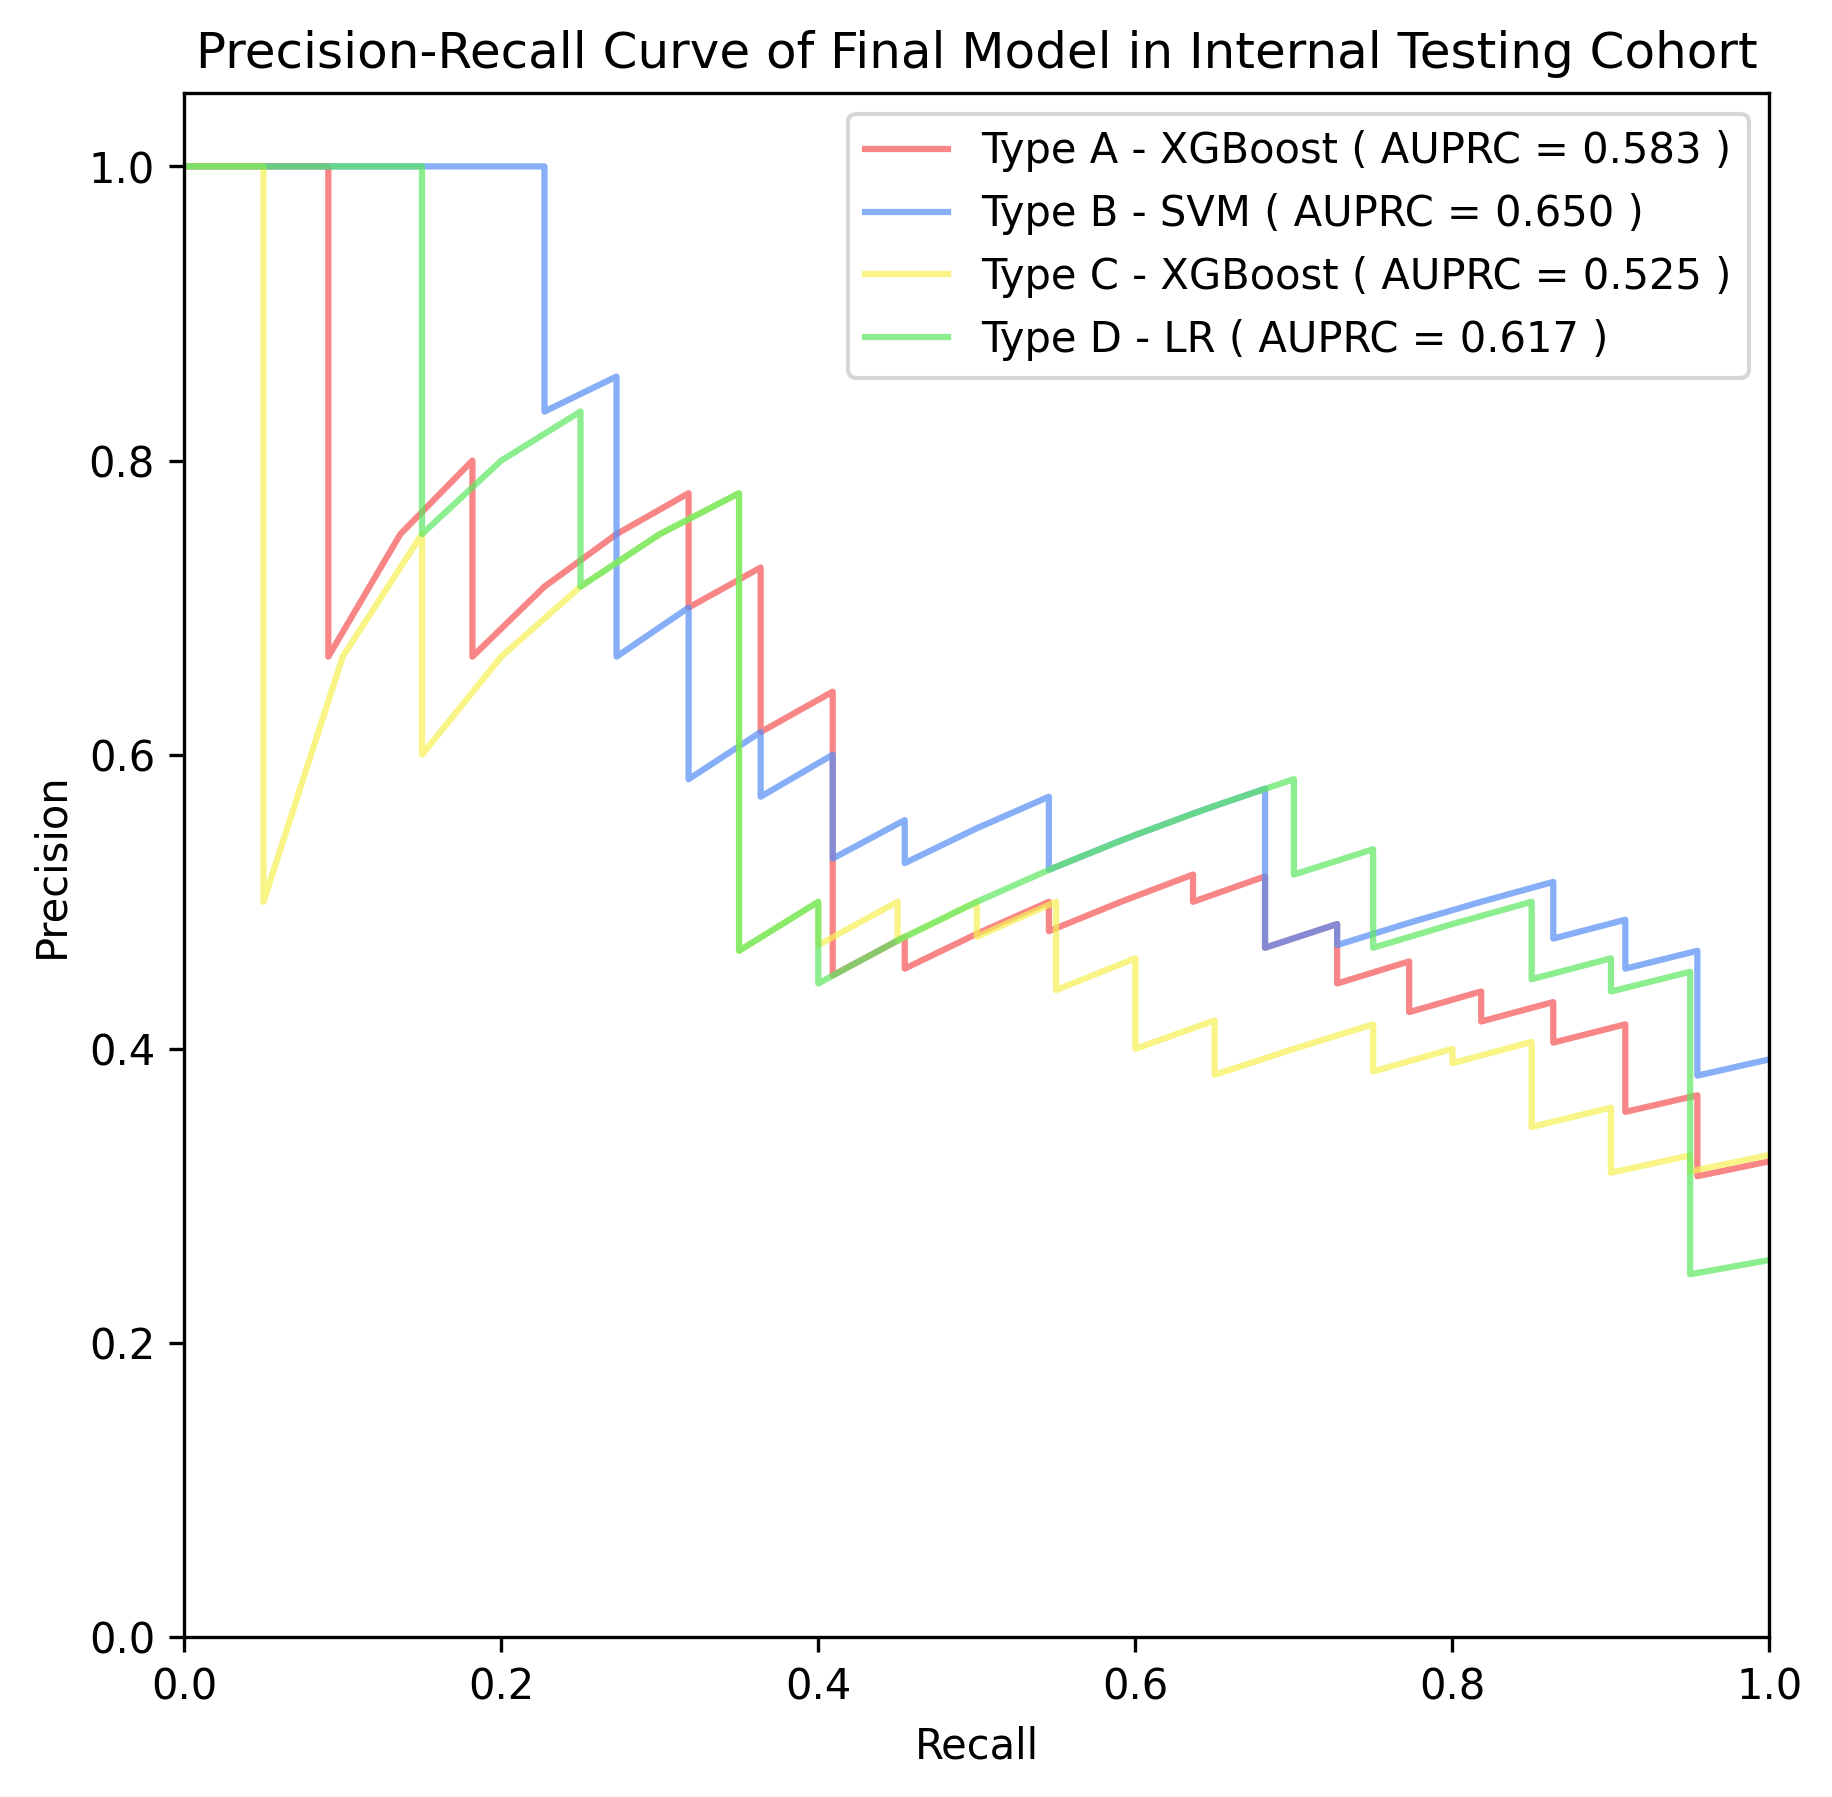

In [46]:
PRC = PlotPRC(CM_Name_List)
PRC.prc_set(title='Precision-Recall Curve of Final Model in Internal Testing Cohort', colorlist=Color_List)
PRC.plot()

In [33]:
ROC.save(path='[3]Result/ROC_summary.png', dpi=900)
PRC.save(path='[3]Result/PRC_summary.png', dpi=900)

ROC曲线已保存，路径为：[3]Result/ROC_summary.png
PRC曲线已保存，路径为：[3]Result/PRC_summary.png


# ✦模型解释

In [47]:
# 引入SHAP包
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码

In [48]:
"""术中低氧——术前变量"""
# 特征名字
Feature_Names = []
for feature_index in range(len(x_train_1_standard.columns)):
    Feature_Names.append(x_train_1_standard.columns[feature_index])
print(Feature_Names)

['BMI', 'Neck_Circumference', 'ASA_scores', 'TMD', 'RHTMD', 'TMH', 'Mallampati_Class', 'BaselineSpO2', 'Snore']


In [17]:
"""术中低氧——术前+术中变量"""
# 特征名字
Feature_Names = []
for feature_index in range(len(x_train_2_standard.columns)):
    Feature_Names.append(x_train_2_standard.columns[feature_index])
print(Feature_Names)

['Age', 'BMI', 'Neck_Circumference', 'ASA_scores', 'TMD', 'TMH', 'SMD', 'Mallampati_Class', 'BaselineSpO2', 'GIT', 'Operating_Time', 'Induction_propofol_dose', 'Total_propofol_dose']


In [23]:
"""诱导低氧——术前变量"""
# 特征名字
Feature_Names = []
for feature_index in range(len(x_train_3_standard.columns)):
    Feature_Names.append(x_train_3_standard.columns[feature_index])
print(Feature_Names)

['BMI', 'Neck_Circumference', 'ASA_scores', 'TMD', 'RHTMD', 'TMH', 'RHSMD', 'Mallampati_Class', 'BaselineSpO2']


In [24]:
"""术中低氧——术前+诱导变量"""
# 特征名字
Feature_Names = []
for feature_index in range(len(x_train_4_standard.columns)):
    Feature_Names.append(x_train_4_standard.columns[feature_index])
print(Feature_Names)

['Age', 'BMI', 'Neck_Circumference', 'TMD', 'TMH', 'SMD', 'RHSMD', 'Mallampati_Class', 'BaselineSpO2', 'Induction_propofol_dose']


In [49]:
Feature_Names_1 = ['BMI', 'Neck Circumference', 'ASA scores', 'TMD', 'RHTMD', 'TMH', 'Mallampati Class', 'Baseline SpO2', 'Snore']
Feature_Names_2 = ['Age', 'BMI', 'Neck Circumference', 'ASA scores', 'TMD', 'TMH', 'SMD', 'Mallampati Class', 'Baseline SpO2', 'GIT', 'Operating Time', 'Induction propofol', 'Total propofol']
Feature_Names_3 = ['BMI', 'Neck Circumference', 'ASA scores', 'TMD', 'RHTMD', 'TMH', 'RHSMD', 'Mallampati Class', 'Baseline SpO2']
Feature_Names_4 = ['Age', 'BMI', 'Neck Circumference', 'TMD', 'TMH', 'SMD', 'RHSMD', 'Mallampati Class', 'Baseline SpO2', 'Induction propofol']

#### 1. 特征重要性

In [50]:
# 1. 创建解释器(TreeExplainer、DeepExplainer、GradientExplainer、KernelExplainer)

# 确定KMeans的K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 确定k的方法：簇内残差平方和拐点法，轮廓系数法和间隔统计量法
# 以下为拐点法，用于绘制不同的k值和对应总的簇内残差平方和的折线图
def k_SSE(X,clusters):
    "X：数据集"
    "clusters：可选簇的个数范围"
    TSSE= []  #总的簇内残差平方和
    K= range(1,clusters+1)
    for k in K:
        SSE = []  #各个簇内残差平方和
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        labels = kmeans.labels_   #返回簇标签
        centers = kmeans.cluster_centers_   #返回簇中心
        #计算各簇样本的残差平方和，并保存到列表中
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels==label,]-centers[label,:])**2))
        #计算总的簇内离差平方和
        TSSE.append(np.sum(SSE))        
#     #中文和负号正常显示
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] =False
    #设置绘画风格
    #plt.style.use('ggplot')
    #绘制K的个数与TSSE的关系
    plt.plot(K,TSSE,'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('簇内残差平方和之和')
    plt.show()

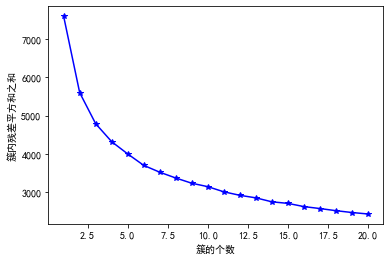

In [51]:
"""术中低氧——术前变量"""
k_SSE(x_train_1_standard, 20)

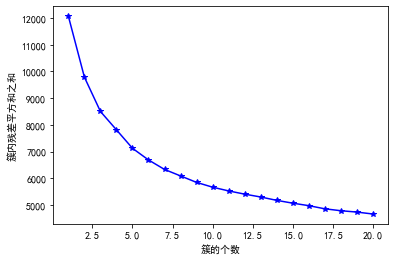

In [28]:
"""术中低氧——术前+术中变量"""
k_SSE(x_train_2_standard, 20)

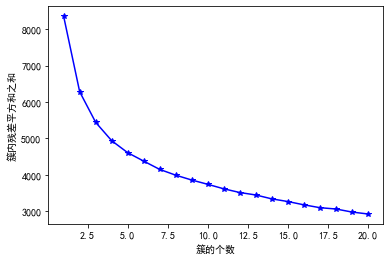

In [29]:
"""诱导中低氧——术前变量"""
k_SSE(x_train_3_standard, 20)

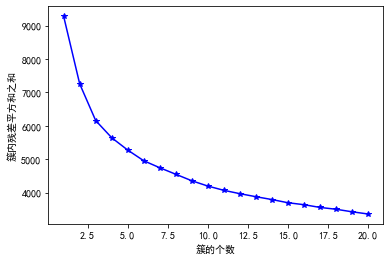

In [30]:
"""诱导中低氧——术前+诱导变量"""
k_SSE(x_train_4_standard, 20)

#### 数据集划分

In [52]:
"""术中低氧——术前变量"""
x_train_1_summary = shap.kmeans(x_train_1_standard,4)

"""术中低氧——术前+术中变量"""
x_train_2_summary = shap.kmeans(x_train_2_standard,4)

"""诱导低氧——术前变量"""
x_train_3_summary = shap.kmeans(x_train_3_standard,4)

"""诱导低氧——术前+诱导变量"""
x_train_4_summary = shap.kmeans(x_train_4_standard,4)

#### 创建解释器

★ 术中低氧——术前变量 ★

In [53]:
Explainer_1 = shap.KernelExplainer(XGBoost_1.predict_proba, x_train_1_summary, link='logit') # 创建解释器

In [54]:
# 2 计算所有样本每个特征的SHAP值
print("Shap Values 计算中↓↓↓")
Shap_Values_importance_1 = Explainer_1.shap_values(x_train_1_standard)
print("Shap Values 计算完成！")

Shap Values 计算中↓↓↓



Shap Values 计算完成！


★ 术中低氧——术前+术中变量 ★

In [20]:
Explainer_2 = shap.KernelExplainer(SVM_2.predict_proba, x_train_2_summary, link='logit')

In [21]:
# 2 计算所有样本每个特征的SHAP值
print("Shap Values 计算中↓↓↓")
Shap_Values_importance_2 = Explainer_2.shap_values(x_train_2_standard)
print("Shap Values 计算完成！")

Shap Values 计算中↓↓↓



Shap Values 计算完成！


★ 诱导低氧——术前变量 ★

In [28]:
Explainer_3 = shap.KernelExplainer(XGBoost_3.predict_proba, x_train_3_summary, link='logit')

In [29]:
# 2 计算所有样本每个特征的SHAP值
print("Shap Values 计算中↓↓↓")
Shap_Values_importance_3 = Explainer_3.shap_values(x_train_3_standard)
print("Shap Values 计算完成！")

Shap Values 计算中↓↓↓



Shap Values 计算完成！


★ 诱导低氧——术前+术中变量 ★

In [30]:
Explainer_4 = shap.KernelExplainer(LR_4.predict_proba, x_train_4_summary, link='logit')

In [31]:
# 2 计算所有样本每个特征的SHAP值
print("Shap Values 计算中↓↓↓")
Shap_Values_importance_4 = Explainer_4.shap_values(x_train_4_standard)
print("Shap Values 计算完成！")

Shap Values 计算中↓↓↓



Shap Values 计算完成！


#### 输出特征重要性

★ 术中低氧——术前变量 ★

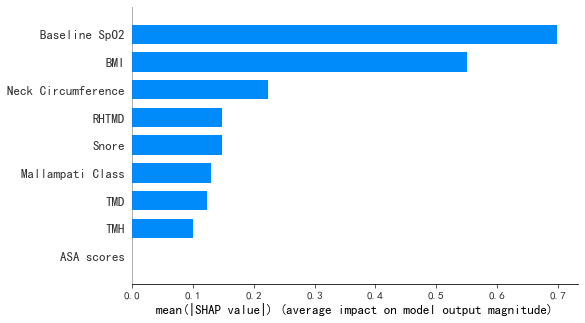

In [55]:
# 3-1. 以每个特征的SHAP平均值为标准，输出排序
shap.summary_plot(shap_values=Shap_Values_importance_1[1], features=x_train_1_standard, feature_names=Feature_Names_1, 
                  plot_type='bar',title="The importance of features with mean SHAP values", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_1_a.png")

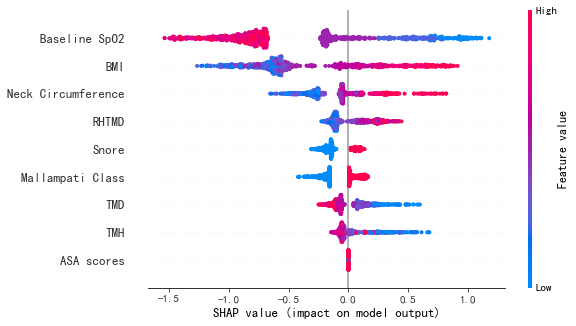

In [56]:
# 3-2. 输出每个样本每个特征的SHAP值
shap.summary_plot(shap_values=Shap_Values_importance_1[1], features=x_train_1_standard, feature_names=Feature_Names_1, 
                  plot_type='dot', title="The SHAP value of each feature of each sample", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_1_b.png")

★ 术中低氧——术前+术中变量 ★

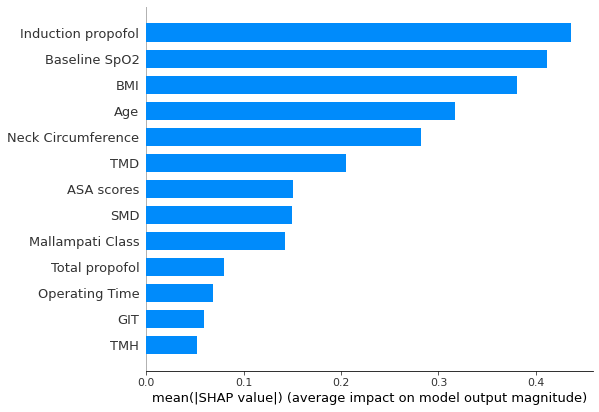

In [24]:
# 3-1. 以每个特征的SHAP平均值为标准，输出排序
shap.summary_plot(shap_values=Shap_Values_importance_2[1], features=x_train_2_standard, feature_names=Feature_Names_2, 
                  plot_type='bar',title="The importance of features with mean SHAP values", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_2_a.png")

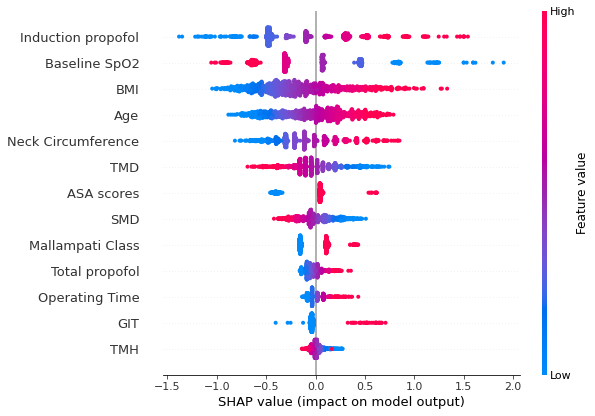

In [25]:
# 3-2. 输出每个样本每个特征的SHAP值
shap.summary_plot(shap_values=Shap_Values_importance_2[1], features=x_train_2_standard, feature_names=Feature_Names_2, 
                  plot_type='dot', title="The SHAP value of each feature of each sample", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_2_b.png")

★ 诱导低氧——术前变量 ★

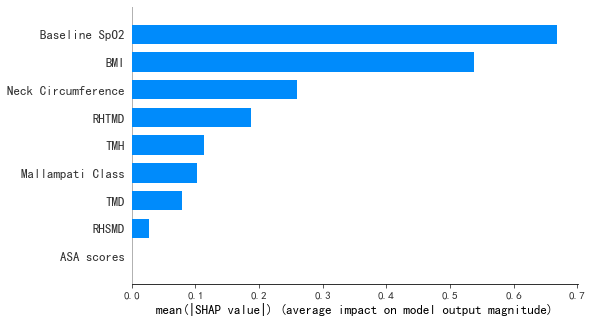

In [49]:
# 3-1. 以每个特征的SHAP平均值为标准，输出排序
shap.summary_plot(shap_values=Shap_Values_importance_3[1], features=x_train_3_standard, feature_names=Feature_Names_3, 
                  plot_type='bar',title="The importance of features with mean SHAP values", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_3_a.png")

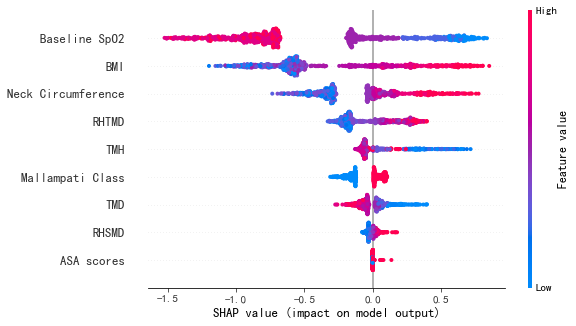

In [50]:
# 3-2. 输出每个样本每个特征的SHAP值
shap.summary_plot(shap_values=Shap_Values_importance_3[1], features=x_train_3_standard, feature_names=Feature_Names_3, 
                  plot_type='dot', title="The SHAP value of each feature of each sample", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_3_b.png")

★ 诱导低氧——术前+术中变量 ★

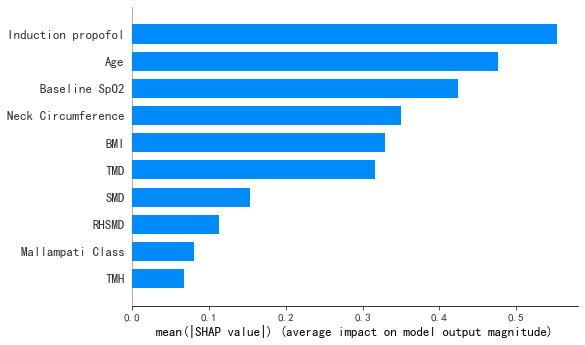

In [54]:
# 3-1. 以每个特征的SHAP平均值为标准，输出排序
shap.summary_plot(shap_values=Shap_Values_importance_4[1], features=x_train_4_standard, feature_names=Feature_Names_4, 
                  plot_type='bar',title="The importance of features with mean SHAP values", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_4_a.png")

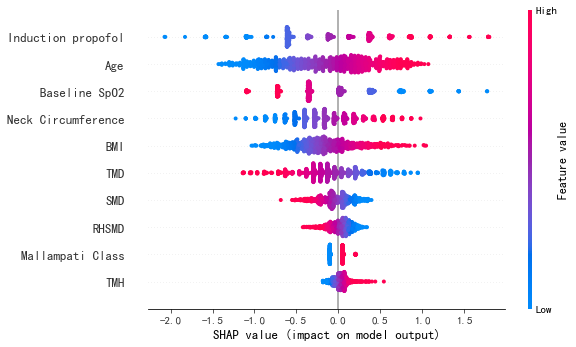

In [55]:
# 3-2. 输出每个样本每个特征的SHAP值
shap.summary_plot(shap_values=Shap_Values_importance_4[1], features=x_train_4_standard, feature_names=Feature_Names_4, 
                  plot_type='dot', title="The SHAP value of each feature of each sample", show=True, 
                  max_display=20, path="[3]Result/SHAP_Values_4_b.png")

## 单个案例

In [61]:
import random # 随机数

### ⚪ 术中低氧——术前变量

In [58]:
print("XGBoost模型的阈值为：%s" % CM_XGBoost_train_1._threshold)

XGBoost模型的阈值为：0.14


In [59]:
# 从预测结果中随机挑选4名患者进行分析

True_Postive = []
False_Postive = []
True_Negtive = []
False_Negtive = []
P_Result = None

y_pred_XGBoost_prob = XGBoost_1.predict_proba(x_test_1_standard)[:, 1].reshape(-1,1)

for sample_index in range(y_pred_XGBoost_prob.shape[0]):
    if y_pred_XGBoost_prob[sample_index]>= CM_XGBoost_train_1._threshold:
        P_Result = 1
        if P_Result == y_test_1[sample_index]:
            True_Postive.append(sample_index)
        else:
            False_Postive.append(sample_index)
    else:
        P_Result = 0
        if P_Result == y_test_1[sample_index]:
            True_Negtive.append(sample_index)
        else:
            False_Negtive.append(sample_index)

print("True_Postive: ", len(True_Postive))
print("False_Postive: ", len(False_Postive))
print("True_Negtive: ", len(True_Negtive))
print("False_Negtive: ", len(False_Negtive))

True_Postive:  20
False_Postive:  29
True_Negtive:  181
False_Negtive:  2


In [62]:
# 随机从每一类中选一名患者

S_True_Postive = random.randint(0,len(True_Postive)-1)
S_False_Postive = random.randint(0,len(False_Postive)-1)
S_True_Negtive = random.randint(0,len(True_Negtive)-1)
S_False_Negtive = random.randint(0,len(False_Negtive)-1)

# 

#### TP

In [80]:
# a. True postive sample

Shap_Values_TP = Explainer_1.shap_values(x_test_1_standard.iloc[True_Postive[S_True_Postive],:].values)

In [81]:
TP = shap.force_plot(base_value=Explainer_1.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_1, 
                     features=x_test_1_original.iloc[True_Postive[S_True_Postive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_1.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_1, 
                features=x_test_1_original.iloc[True_Postive[S_True_Postive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [82]:
shap.save_html('[3]Result/1_TP.html', TP, full_html=True)

#### TN

In [71]:
# b. True negative sample

Shap_Values_TN = Explainer_1.shap_values(x_test_1_standard.iloc[True_Negtive[S_True_Negtive],:].values)

In [72]:
TN = shap.force_plot(base_value=Explainer_1.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_1, 
                     features=x_test_1_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_1.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_1, 
                features=x_test_1_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [73]:
shap.save_html('[3]Result/1_TN.html', TN, full_html=True)

#### FN

In [88]:
# c. False negative sample

Shap_Values_FN = Explainer_1.shap_values(x_test_1_standard.iloc[False_Negtive[S_False_Negtive],:].values)

In [89]:
FN = shap.force_plot(base_value=Explainer_1.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_1, 
                     features=x_test_1_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_1.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_1, 
                features=x_test_1_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [90]:
shap.save_html('[3]Result/1_FN.html', FN, full_html=True)

### ⚪ 术中低氧——术前+术中变量

In [26]:
print("SVM模型的阈值为：%s" % CM_SVM_train_2._threshold)

SVM模型的阈值为：0.129


In [28]:
# 从预测结果中随机挑选4名患者进行分析

True_Postive = []
False_Postive = []
True_Negtive = []
False_Negtive = []
P_Result = None

y_pred_SVM_prob = SVM_2.predict_proba(x_test_2_standard)[:, 1].reshape(-1,1)

for sample_index in range(y_pred_SVM_prob.shape[0]):
    if y_pred_SVM_prob[sample_index]>= CM_SVM_train_2._threshold:
        P_Result = 1
        if P_Result == y_test_2[sample_index]:
            True_Postive.append(sample_index)
        else:
            False_Postive.append(sample_index)
    else:
        P_Result = 0
        if P_Result == y_test_2[sample_index]:
            True_Negtive.append(sample_index)
        else:
            False_Negtive.append(sample_index)

print("True_Postive: ", len(True_Postive))
print("False_Postive: ", len(False_Postive))
print("True_Negtive: ", len(True_Negtive))
print("False_Negtive: ", len(False_Negtive))

True_Postive:  21
False_Postive:  26
True_Negtive:  184
False_Negtive:  1


In [31]:
# 随机从每一类中选一名患者

S_True_Postive = random.randint(0,len(True_Postive)-1)
S_False_Postive = random.randint(0,len(False_Postive)-1)
S_True_Negtive = random.randint(0,len(True_Negtive)-1)
S_False_Negtive = random.randint(0,len(False_Negtive)-1)

# 

#### TP

In [33]:
# a. True postive sample

Shap_Values_TP = Explainer_2.shap_values(x_test_2_standard.iloc[True_Postive[S_True_Postive],:].values)

In [34]:
TP = shap.force_plot(base_value=Explainer_2.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_2, 
                     features=x_test_2_original.iloc[True_Postive[S_True_Postive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_2.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_2, 
                features=x_test_2_original.iloc[True_Postive[S_True_Postive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [35]:
shap.save_html('[3]Result/2_TP.html', TP, full_html=True)

#### TN

In [39]:
# b. True negative sample

Shap_Values_TN = Explainer_2.shap_values(x_test_2_standard.iloc[True_Negtive[S_True_Negtive],:].values)

In [40]:
TN = shap.force_plot(base_value=Explainer_2.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_2, 
                     features=x_test_2_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_2.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_2, 
                features=x_test_2_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [41]:
shap.save_html('[3]Result/2_TN.html', TN, full_html=True)

#### FN

In [43]:
# c. False negative sample

Shap_Values_FN = Explainer_2.shap_values(x_test_2_standard.iloc[False_Negtive[S_False_Negtive],:].values)

In [44]:
FN = shap.force_plot(base_value=Explainer_2.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_2, 
                     features=x_test_2_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_2.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_2, 
                features=x_test_2_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [45]:
shap.save_html('[3]Result/2_FN.html', FN, full_html=True)

### ⚪ 诱导低氧——术前变量

In [93]:
print("XGBoost模型的阈值为：%s" % CM_XGBoost_train_3._threshold)

XGBoost模型的阈值为：0.083


In [94]:
# 从预测结果中随机挑选4名患者进行分析

True_Postive = []
False_Postive = []
True_Negtive = []
False_Negtive = []
P_Result = None

y_pred_XGBoost_prob = XGBoost_3.predict_proba(x_test_3_standard)[:, 1].reshape(-1,1)

for sample_index in range(y_pred_XGBoost_prob.shape[0]):
    if y_pred_XGBoost_prob[sample_index]>= CM_XGBoost_train_3._threshold:
        P_Result = 1
        if P_Result == y_test_3[sample_index]:
            True_Postive.append(sample_index)
        else:
            False_Postive.append(sample_index)
    else:
        P_Result = 0
        if P_Result == y_test_3[sample_index]:
            True_Negtive.append(sample_index)
        else:
            False_Negtive.append(sample_index)

print("True_Postive: ", len(True_Postive))
print("False_Postive: ", len(False_Postive))
print("True_Negtive: ", len(True_Negtive))
print("False_Negtive: ", len(False_Negtive))

True_Postive:  19
False_Postive:  39
True_Negtive:  173
False_Negtive:  1


In [95]:
# 随机从每一类中选一名患者

S_True_Postive = random.randint(0,len(True_Postive)-1)
S_False_Postive = random.randint(0,len(False_Postive)-1)
S_True_Negtive = random.randint(0,len(True_Negtive)-1)
S_False_Negtive = random.randint(0,len(False_Negtive)-1)

# 

#### TP

In [104]:
# a. True postive sample

Shap_Values_TP = Explainer_3.shap_values(x_test_3_standard.iloc[True_Postive[S_True_Postive],:].values)

In [105]:
TP = shap.force_plot(base_value=Explainer_3.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_3, 
                     features=x_test_3_original.iloc[True_Postive[S_True_Postive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_3.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_3, 
                features=x_test_3_original.iloc[True_Postive[S_True_Postive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [106]:
shap.save_html('[3]Result/3_TP.html', TP, full_html=True)

#### TN

In [108]:
# b. True negative sample

Shap_Values_TN = Explainer_3.shap_values(x_test_3_standard.iloc[True_Negtive[S_True_Negtive],:].values)

In [109]:
TN = shap.force_plot(base_value=Explainer_3.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_3, 
                     features=x_test_3_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_3.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_3, 
                features=x_test_3_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [110]:
shap.save_html('[3]Result/3_TN.html', TN, full_html=True)

#### FN

In [156]:
# c. False negative sample

Shap_Values_FN = Explainer_3.shap_values(x_test_3_standard.iloc[False_Negtive[S_False_Negtive],:].values)

In [157]:
FN = shap.force_plot(base_value=Explainer_3.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_3, 
                     features=x_test_3_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_3.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_3, 
                features=x_test_3_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [158]:
shap.save_html('[3]Result/3_FN.html', FN, full_html=True)

### ⚪ 诱导低氧——术前+术中变量

In [114]:
print("LR模型的阈值为：%s" % CM_LR_train_4._threshold)

LR模型的阈值为：0.088


In [115]:
# 从预测结果中随机挑选4名患者进行分析

True_Postive = []
False_Postive = []
True_Negtive = []
False_Negtive = []
P_Result = None

y_pred_LR_prob = LR_4.predict_proba(x_test_4_standard)[:, 1].reshape(-1,1)

for sample_index in range(y_pred_LR_prob.shape[0]):
    if y_pred_LR_prob[sample_index]>= CM_LR_train_4._threshold:
        P_Result = 1
        if P_Result == y_test_4[sample_index]:
            True_Postive.append(sample_index)
        else:
            False_Postive.append(sample_index)
    else:
        P_Result = 0
        if P_Result == y_test_4[sample_index]:
            True_Negtive.append(sample_index)
        else:
            False_Negtive.append(sample_index)

print("True_Postive: ", len(True_Postive))
print("False_Postive: ", len(False_Postive))
print("True_Negtive: ", len(True_Negtive))
print("False_Negtive: ", len(False_Negtive))

True_Postive:  19
False_Postive:  38
True_Negtive:  174
False_Negtive:  1


In [116]:
# 随机从每一类中选一名患者

S_True_Postive = random.randint(0,len(True_Postive)-1)
S_False_Postive = random.randint(0,len(False_Postive)-1)
S_True_Negtive = random.randint(0,len(True_Negtive)-1)
S_False_Negtive = random.randint(0,len(False_Negtive)-1)

# 

#### TP

In [122]:
# a. True postive sample

Shap_Values_TP = Explainer_4.shap_values(x_test_4_standard.iloc[True_Postive[S_True_Postive],:].values)

In [123]:
TP = shap.force_plot(base_value=Explainer_4.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_4, 
                     features=x_test_4_original.iloc[True_Postive[S_True_Postive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_4.expected_value[1], shap_values=Shap_Values_TP[1], feature_names=Feature_Names_4, 
                features=x_test_4_original.iloc[True_Postive[S_True_Postive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [124]:
shap.save_html('[3]Result/4_TP.html', TP, full_html=True)

#### TN

In [126]:
# b. True negative sample

Shap_Values_TN = Explainer_4.shap_values(x_test_4_standard.iloc[True_Negtive[S_True_Negtive],:].values)

In [127]:
TN = shap.force_plot(base_value=Explainer_4.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_4, 
                     features=x_test_4_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_4.expected_value[1], shap_values=Shap_Values_TN[1], feature_names=Feature_Names_4, 
                features=x_test_4_original.iloc[True_Negtive[S_True_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [128]:
shap.save_html('[3]Result/4_TN.html', TN, full_html=True)

#### FN

In [132]:
# c. False negative sample

Shap_Values_FN = Explainer_4.shap_values(x_test_4_standard.iloc[False_Negtive[S_False_Negtive],:].values)

In [133]:
FN = shap.force_plot(base_value=Explainer_4.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_4, 
                     features=x_test_4_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                     out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

shap.force_plot(base_value=Explainer_4.expected_value[1], shap_values=Shap_Values_FN[1], feature_names=Feature_Names_4, 
                features=x_test_4_original.iloc[False_Negtive[S_False_Negtive],:].values, 
                out_names='the probability of hypoxemia', link='logit', show=True, matplotlib=False)

In [134]:
shap.save_html('[3]Result/4_FN.html', FN, full_html=True)

#### 

## ✦STOP-BANG比较

#### ROC和PRC的比较

In [98]:
from tensorflow.keras.metrics import AUC
from sklearn.metrics import precision_recall_curve
import numpy as np
import math

class PRC_Model:
    
    def __init__(self, label=None, score=None):
        
        # 初始化
        self.y = label
        self.yscore = score
        
        # 计算precsion、recall
        self.precision, self.recall, self.thresholds = precision_recall_curve(self.y,self.yscore)
        
        # AUPRC
        self.auprc = AUC(curve='PR')
        self.auprc.update_state(self.y, self.yscore)
        self.au_prc =  np.float64(self.auprc.interpolate_pr_auc().numpy())
        
         # Logit Method 计算AUPRC置信区间
        self.postivesample = self.y.sum()
        self.exponent1 = math.log(self.au_prc/(1-self.au_prc), math.e) - 1.96*math.pow(self.postivesample*self.au_prc*(1-self.au_prc), -1/2)
        self.exponent2 = math.log(self.au_prc/(1-self.au_prc), math.e) + 1.96*math.pow(self.postivesample*self.au_prc*(1-self.au_prc), -1/2)
        self.prc_ci = [math.exp(self.exponent1) / (1 + math.exp(self.exponent1)), 
                         math.exp(self.exponent2) / (1 + math.exp(self.exponent2))]
        
        # 输出结果
        print('AUPRC：%.3f'% self.au_prc)
        print('95% CI for AUPRC：', '%.3f - %.3f' % (self.prc_ci[0], self.prc_ci[1]))
        print('---------')
        print('NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)')
        print('---------')
        
        return None
    
    def prc(self):
        
        return self.precision, self.recall, self.au_prc

In [99]:
intraoperative_score = copy.deepcopy(testing_data["STOP_BANG"])
induction_score = copy.deepcopy(testing_data["STOP_BANG"])

In [100]:
SB_intraoperative = CompareModel(model_type='score', score=intraoperative_score, score_pattern='asc', full_score=8, 
                                 true_label=y_test_1, threshold=3)

SB_induction = CompareModel(model_type='score', score=induction_score, score_pattern='asc', full_score=8, 
                                 true_label=y_test_3, threshold=3)

In [101]:
SB_intraoperative.comparing()

The Optimal Threshold：0.375

AUROC：0.850
95% CI for AUROC： 0.770 - 0.931
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.399
95% CI for AUPRC： 0.221 - 0.610
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Sensitivity：0.727
Specifity：0.848
PPV：0.333
NPV：0.967
Accuracy：0.836
Precision：0.333
Recall：0.727
F1-Value：0.457


In [102]:
SB_induction.comparing()

The Optimal Threshold：0.375

AUROC：0.833
95% CI for AUROC： 0.747 - 0.920
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.355
95% CI for AUPRC： 0.180 - 0.579
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Sensitivity：0.700
Specifity：0.840
PPV：0.292
NPV：0.967
Accuracy：0.828
Precision：0.292
Recall：0.700
F1-Value：0.412


In [103]:
# 所有模型的混淆矩阵列表
CM_Name_List_1 = [(CM_XGBoost_1, 'Type A - XGBoost'), (CM_SVM_2, 'Type B - SVM'),(SB_intraoperative,'STOP-BANG score')]
CM_Name_List_2 = [(CM_XGBoost_3, 'Type C - XGBoost'),(CM_LR_4, 'Type D - LR'), (SB_induction,'STOP-BANG score')]

Color_List = ["#f65353", "#538df6", "#f6f053", "#5ce760"]

In [104]:
SB_intraoperative_prc = PRC_Model(y_test_1, intraoperative_score/8)
print(' ')
SB_induction_prc = PRC_Model(y_test_3, induction_score/8)

CM_Name_List_1_prc = [(CM_XGBoost_1, 'Type A - XGBoost'), (CM_SVM_2, 'Type B - SVM'),(SB_intraoperative_prc,'STOP-BANG score')]
CM_Name_List_2_prc = [(CM_XGBoost_3, 'Type C - XGBoost'),(CM_LR_4, 'Type D - LR'), (SB_induction_prc,'STOP-BANG score')]

AUPRC：0.374
95% CI for AUPRC： 0.201 - 0.586
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------
 
AUPRC：0.319
95% CI for AUPRC： 0.155 - 0.545
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------


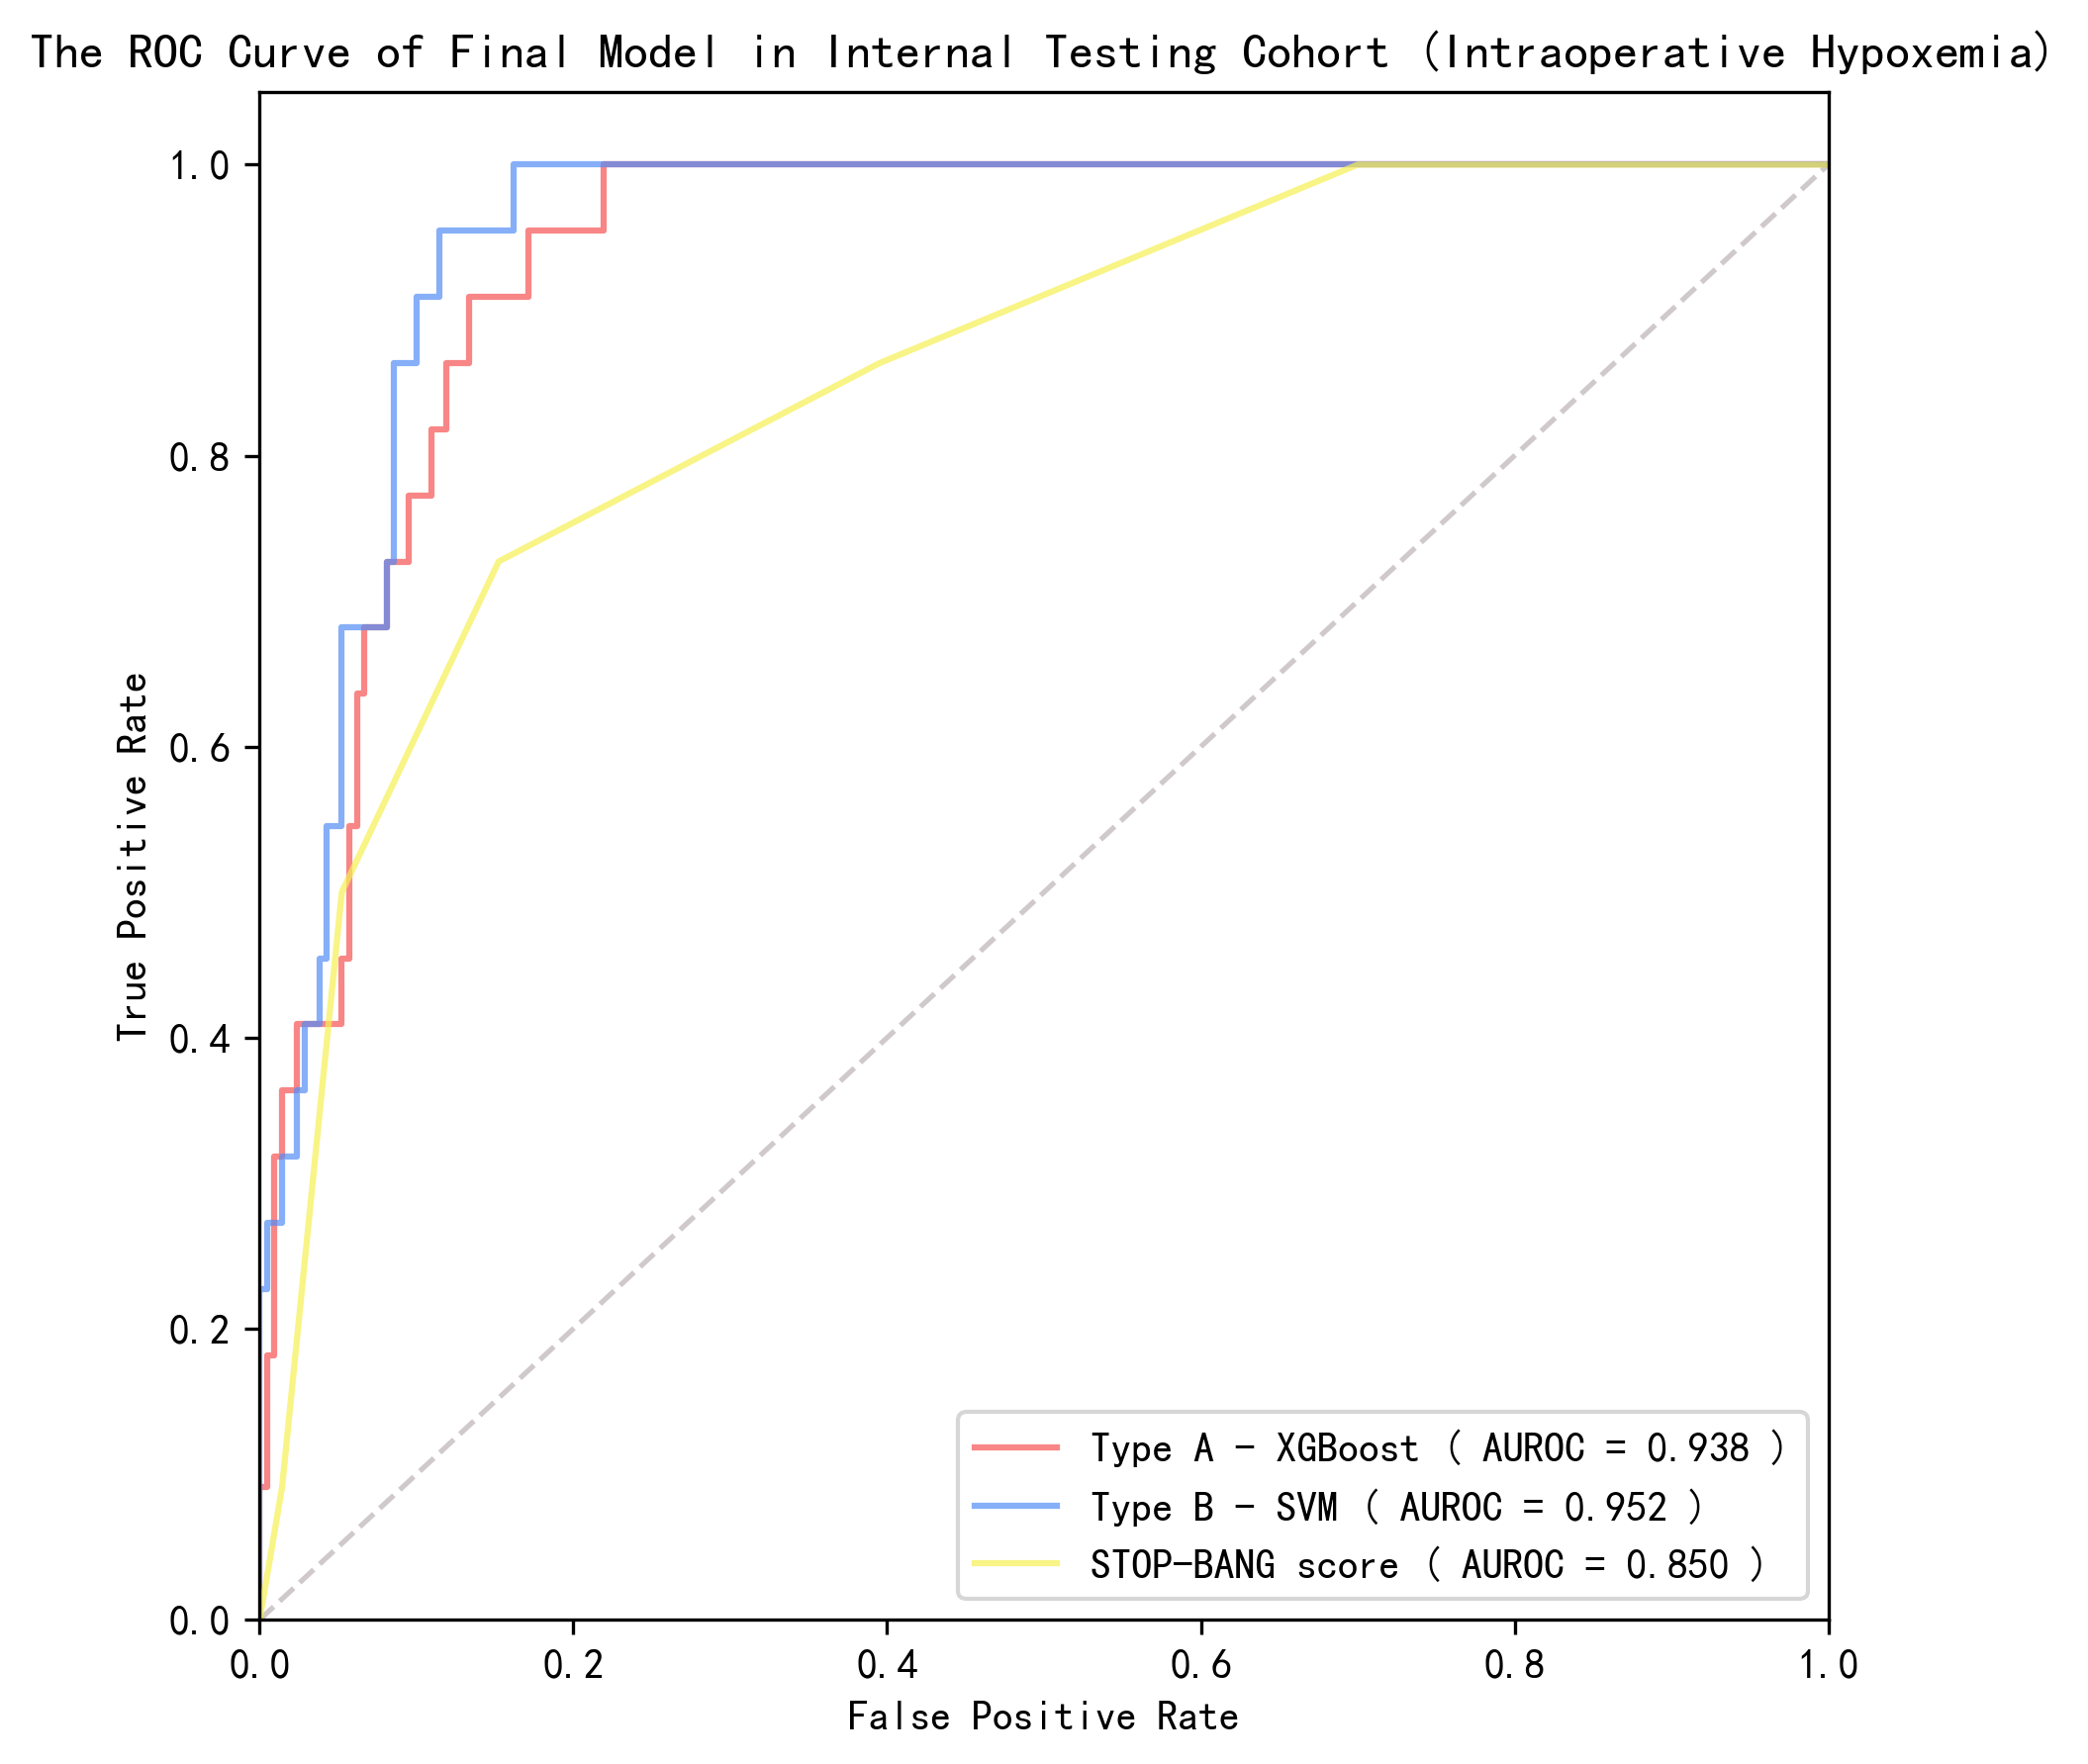

In [105]:
ROC_1 = PlotROC(CM_Name_List_1)
ROC_1.roc_set(title="The ROC Curve of Final Model in Internal Testing Cohort (Intraoperative Hypoxemia)", colorlist=Color_List)
ROC_1.plot()

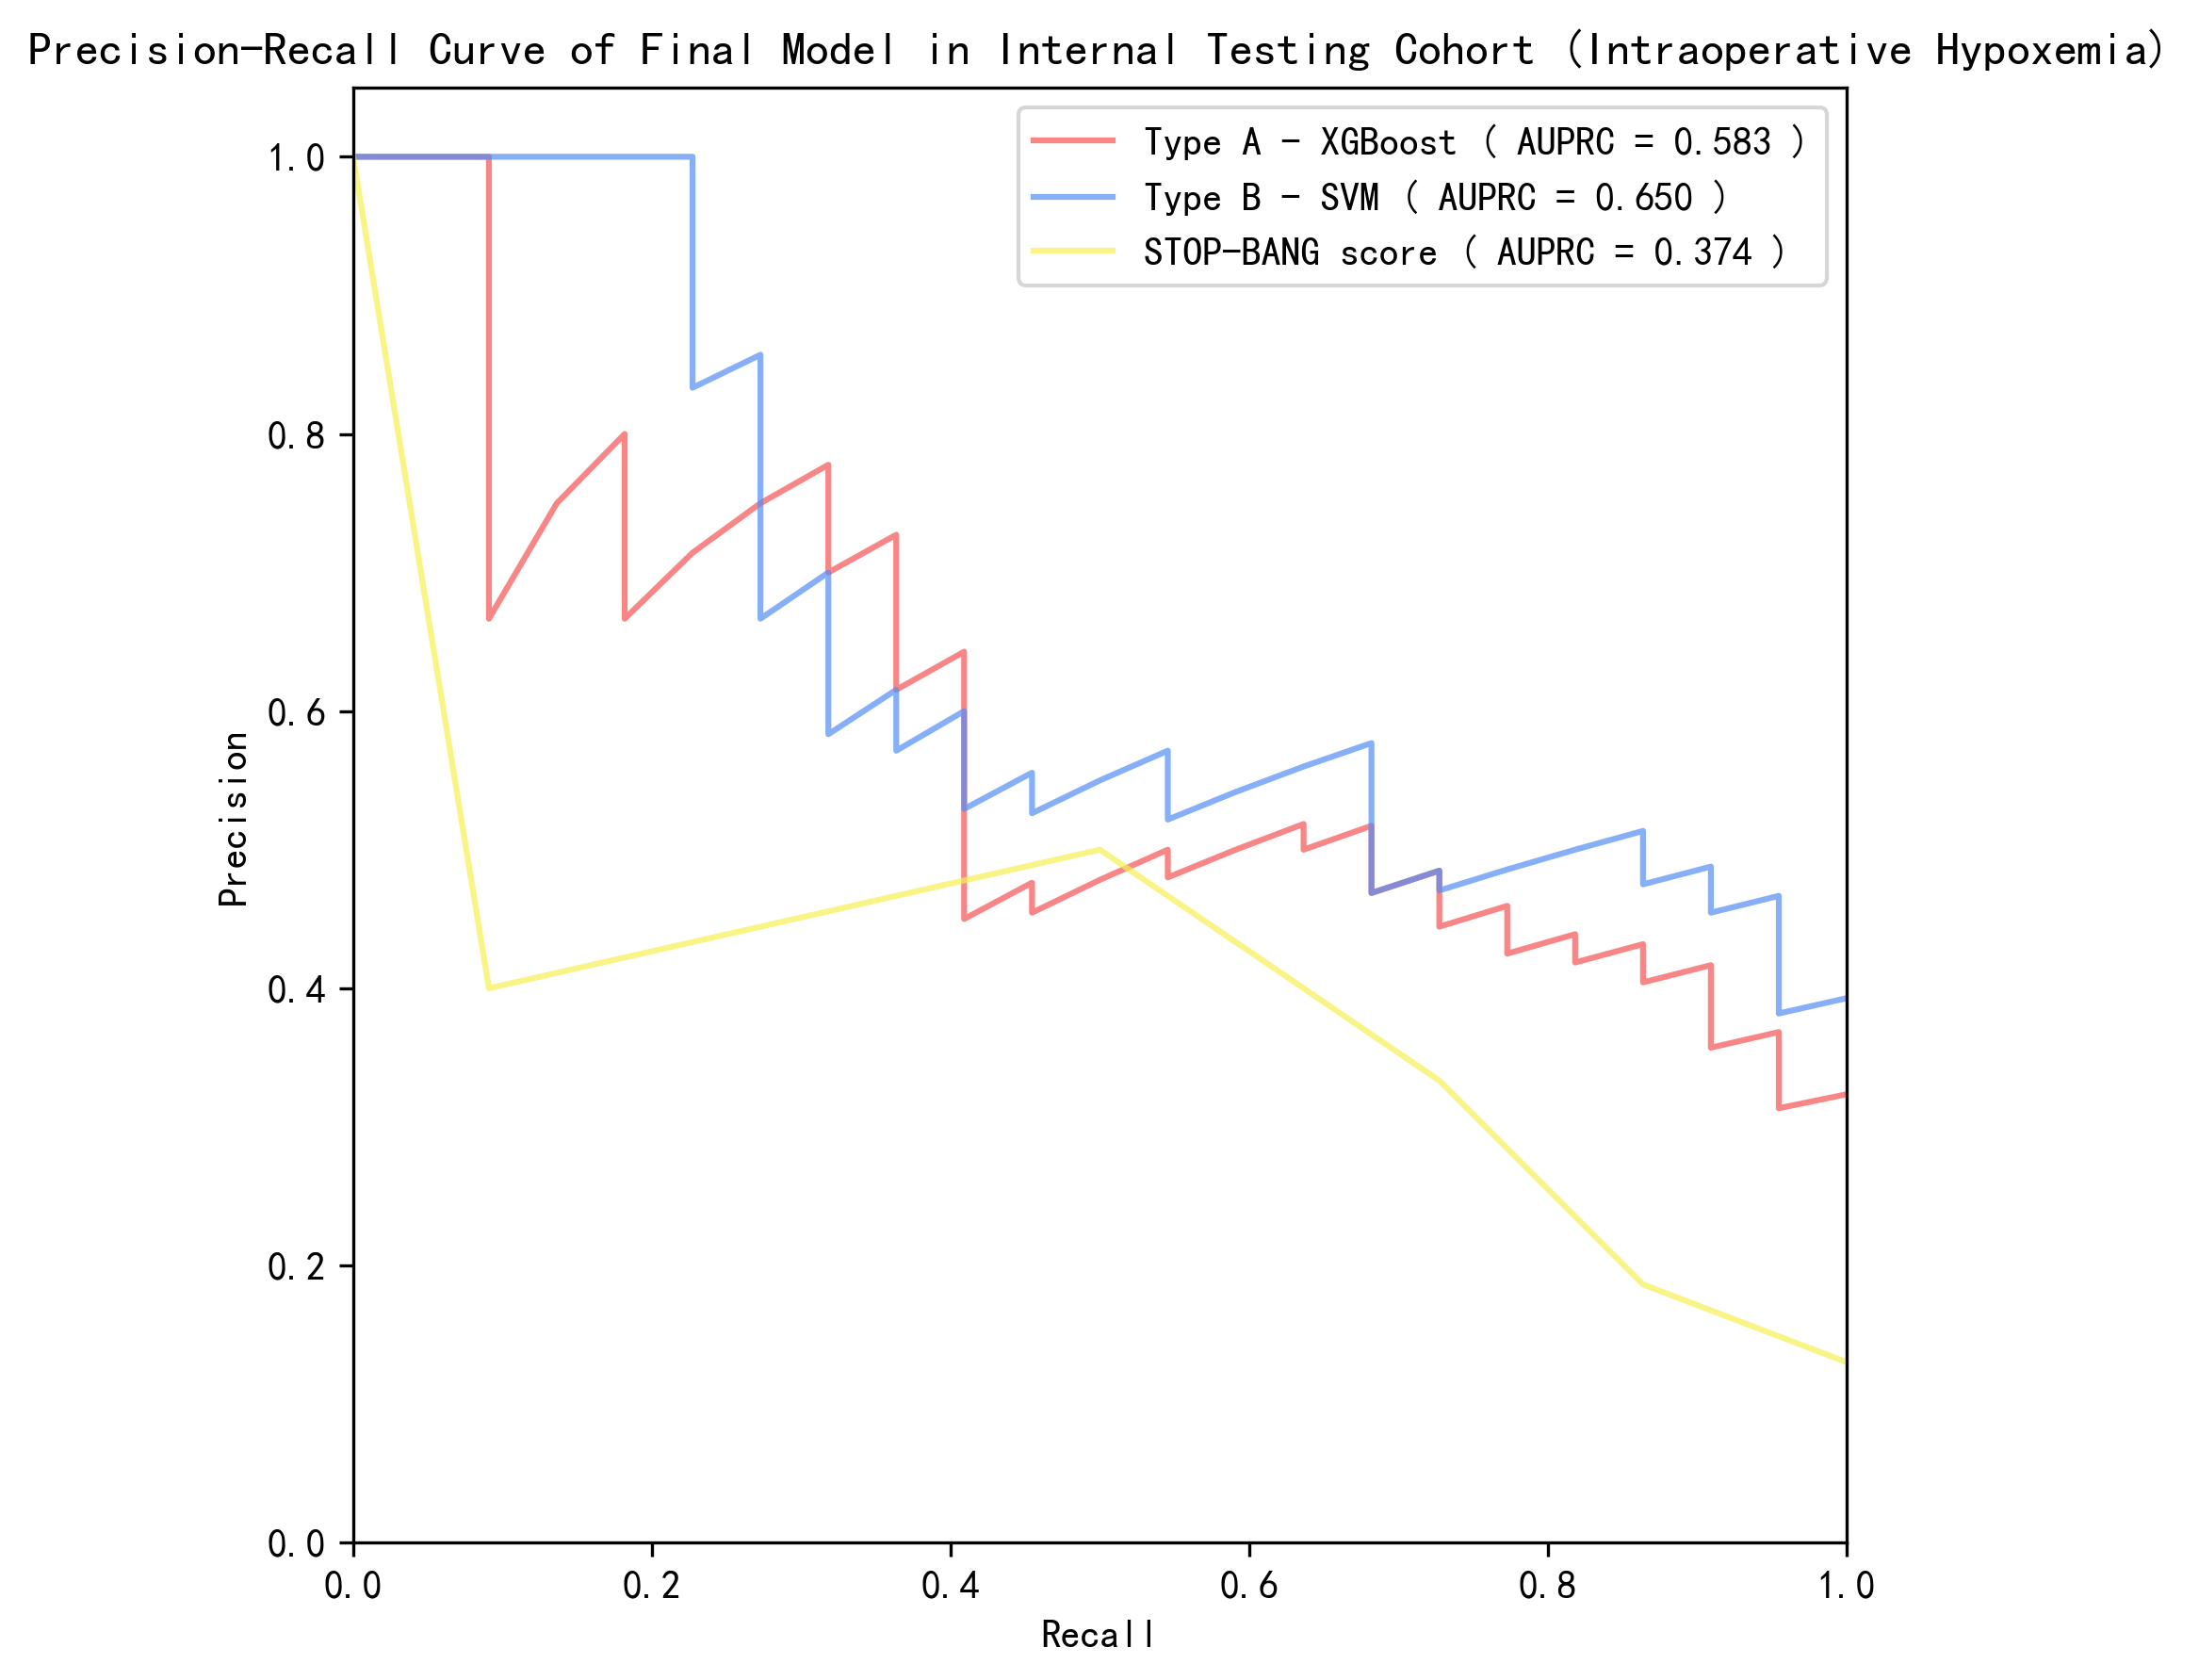

In [106]:
PRC_1 = PlotPRC(CM_Name_List_1_prc)
PRC_1.prc_set(title='Precision-Recall Curve of Final Model in Internal Testing Cohort (Intraoperative Hypoxemia)', colorlist=Color_List)
PRC_1.plot()

In [107]:
ROC_1.save(path='[3]Result/ROC_summary_01.png', dpi=900)
PRC_1.save(path='[3]Result/PRC_summary_01.png', dpi=900)

ROC曲线已保存，路径为：[3]Result/ROC_summary_01.png
PRC曲线已保存，路径为：[3]Result/PRC_summary_01.png


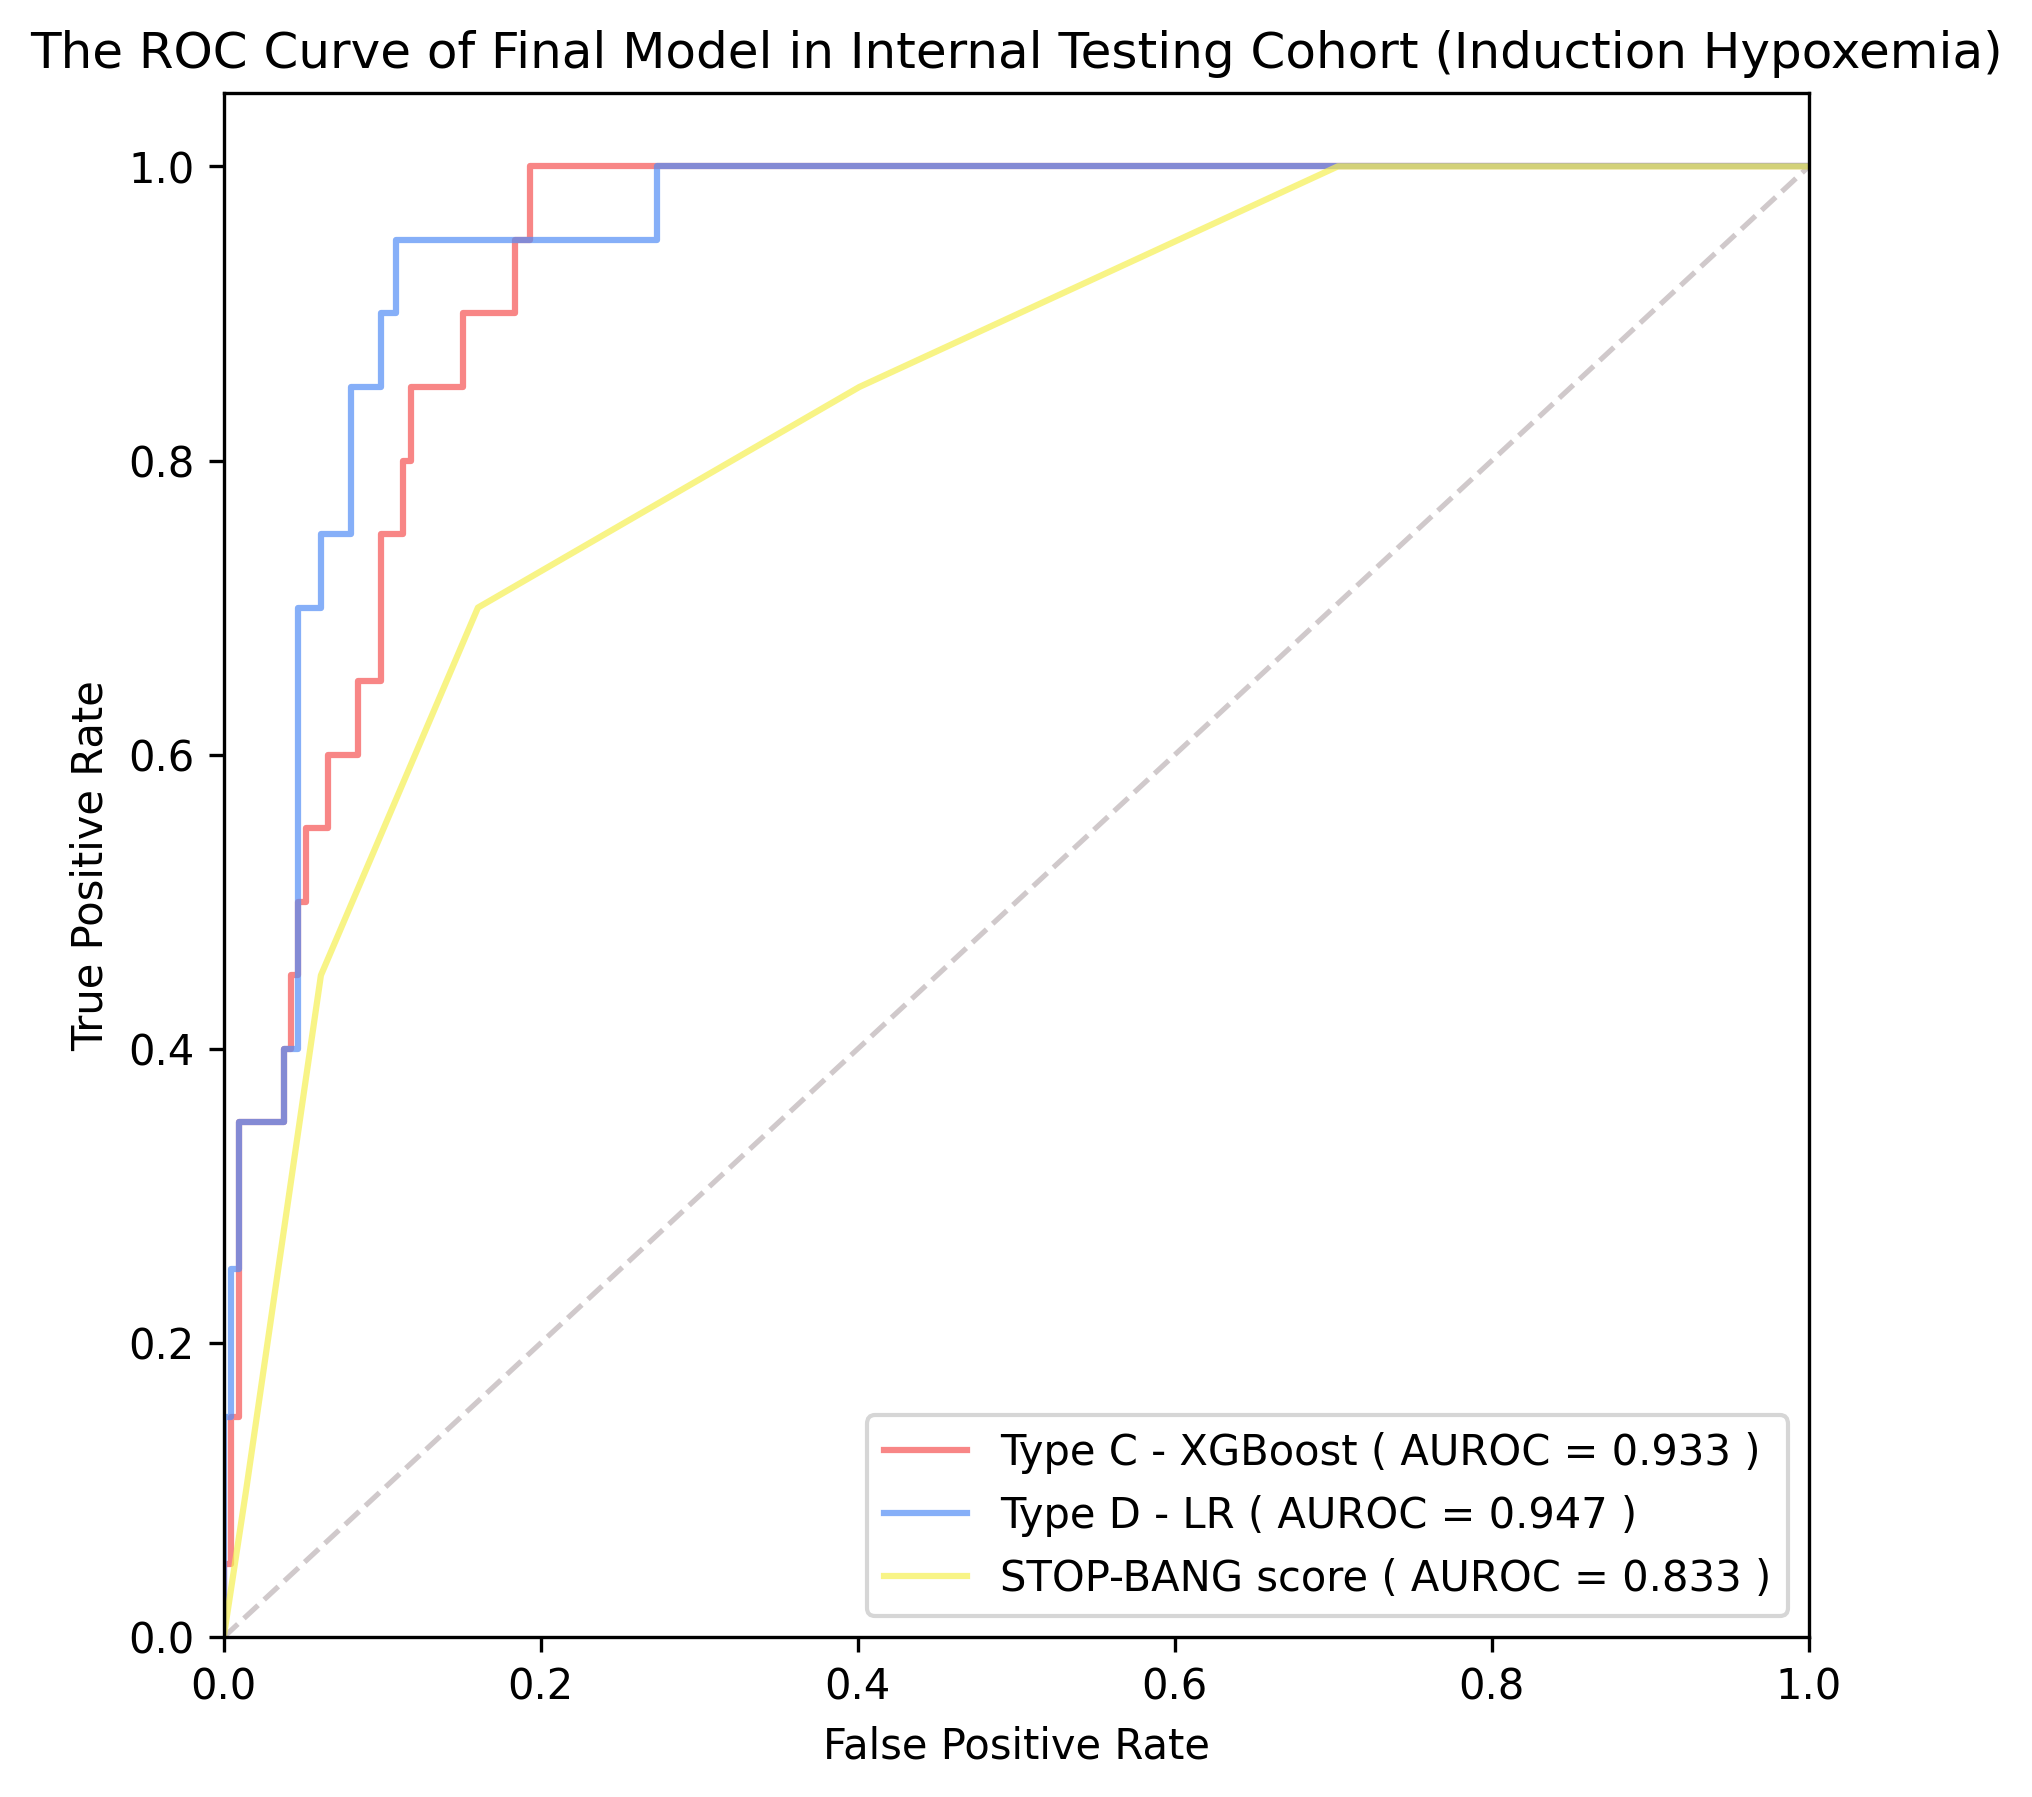

In [23]:
ROC_2 = PlotROC(CM_Name_List_2)
ROC_2.roc_set(title="The ROC Curve of Final Model in Internal Testing Cohort (Induction Hypoxemia)", colorlist=Color_List)
ROC_2.plot()

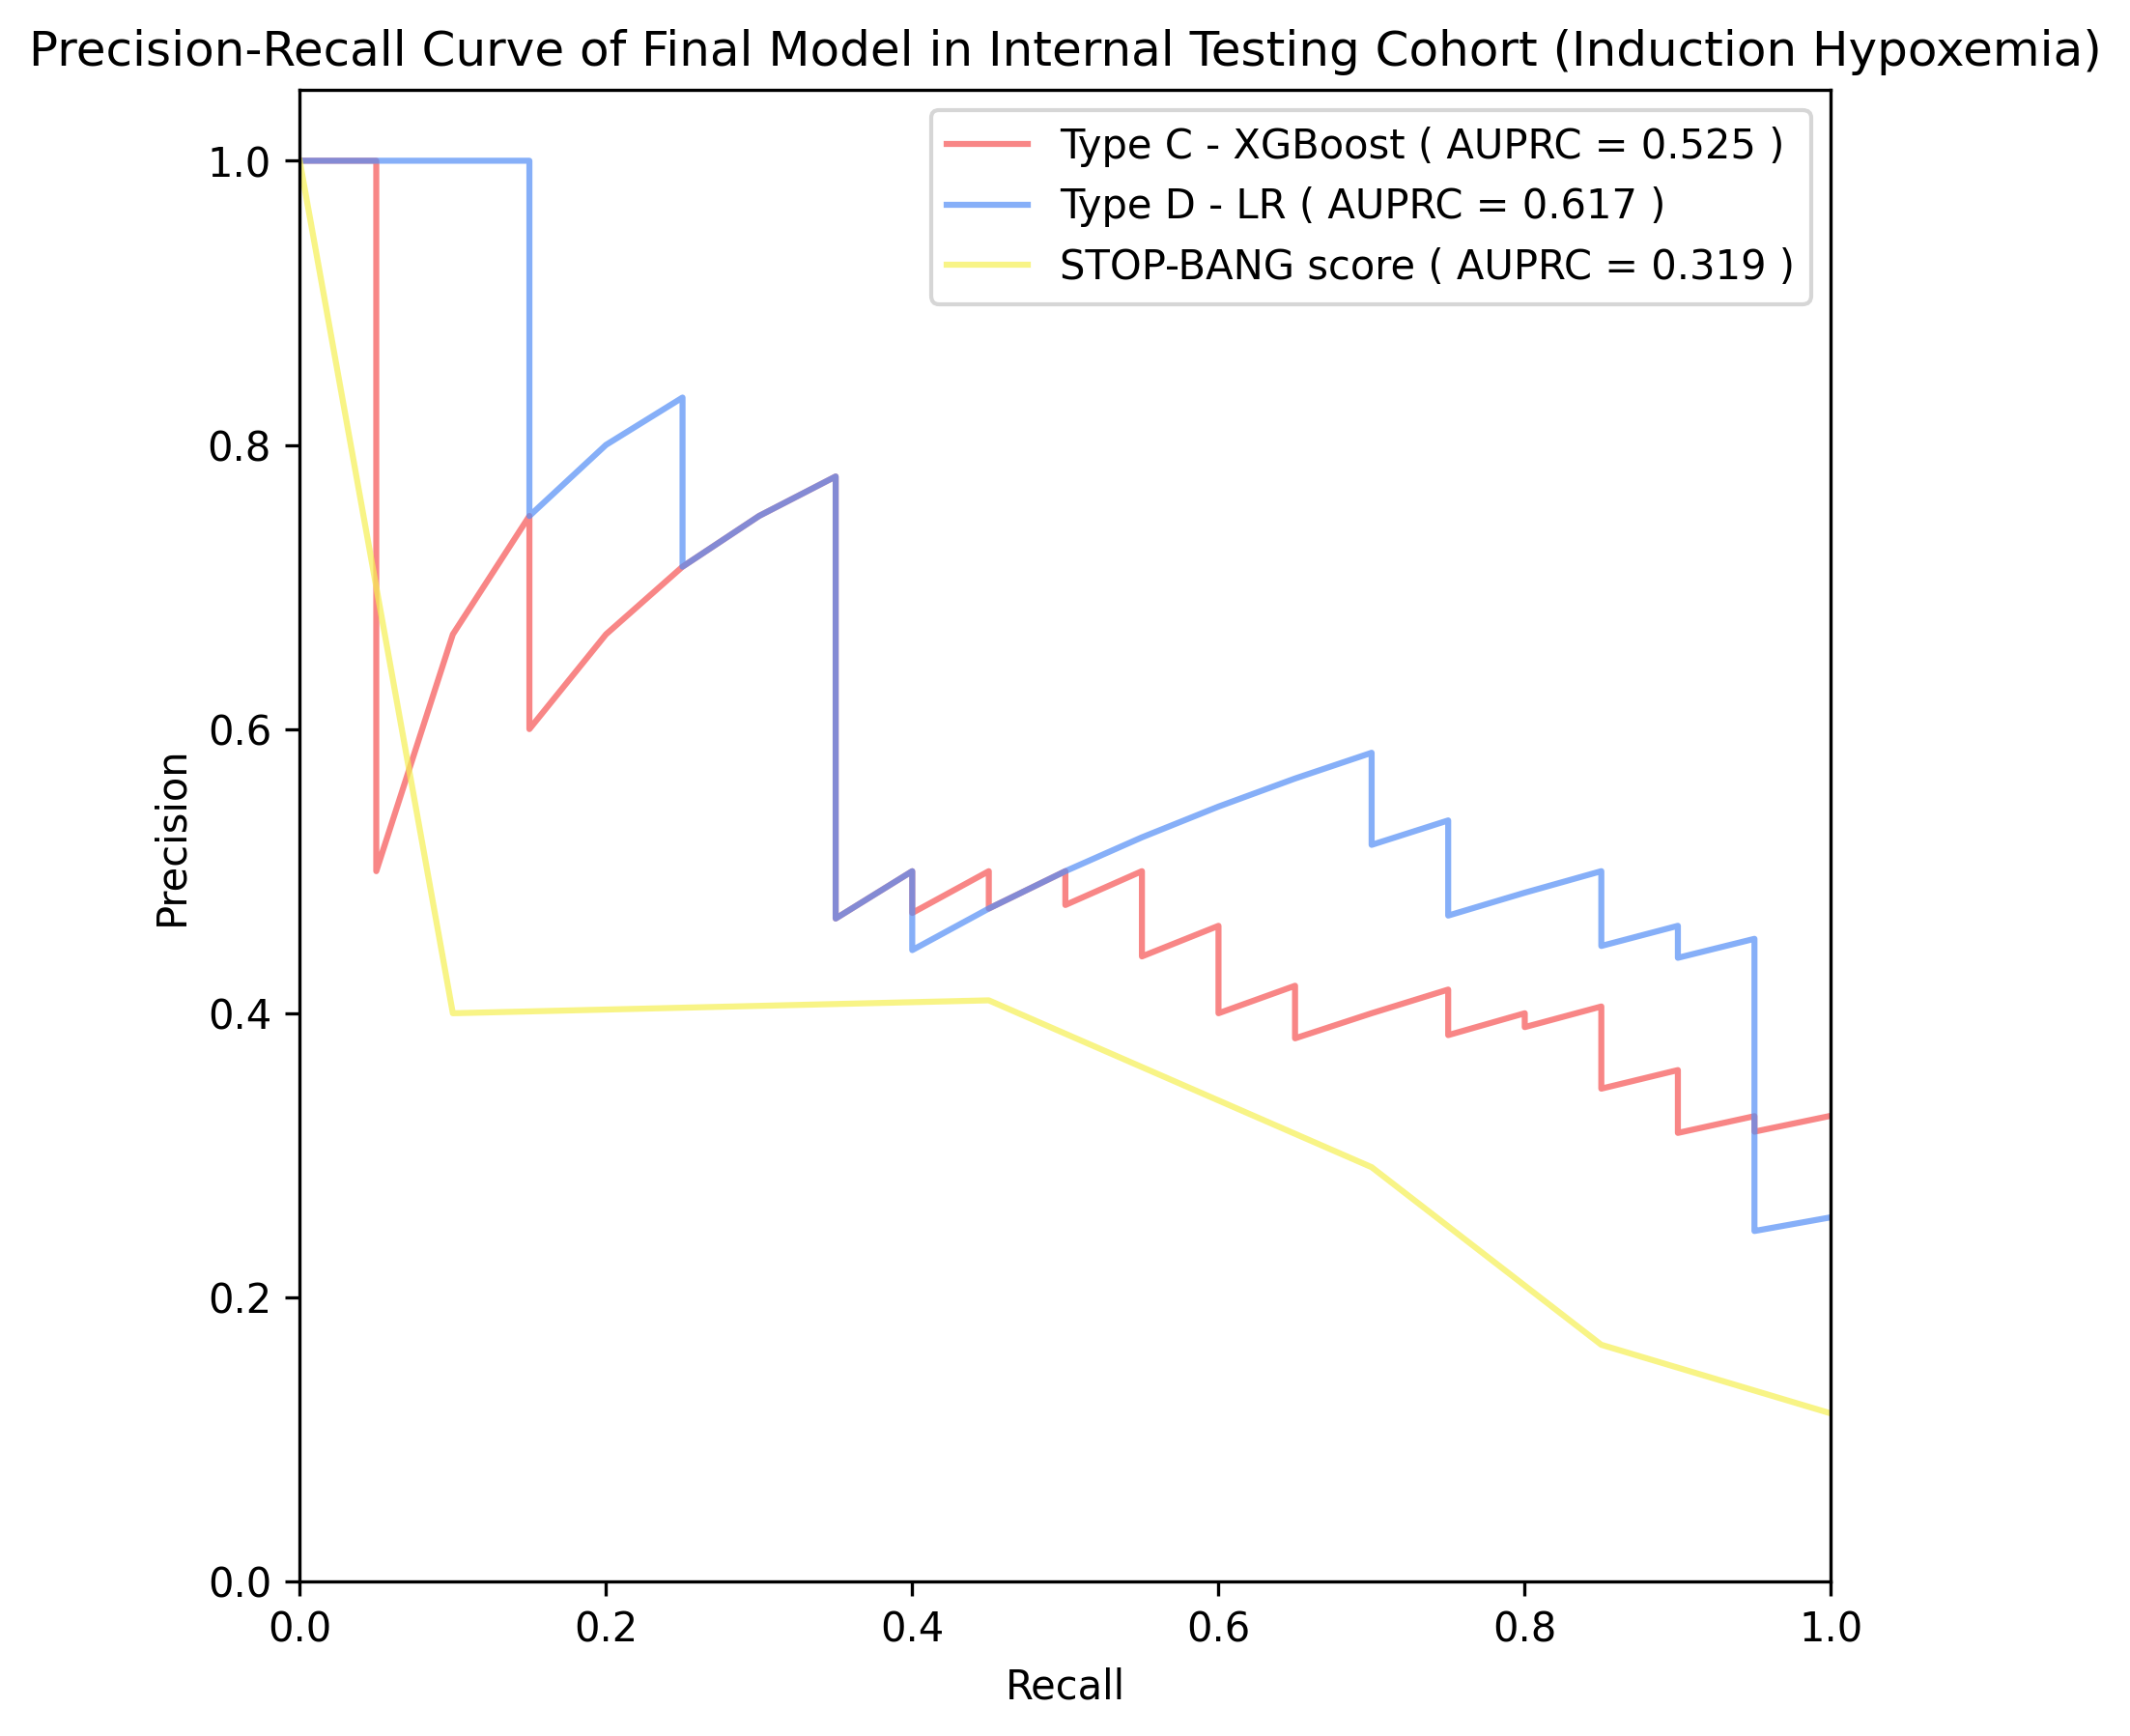

In [24]:
PRC_2 = PlotPRC(CM_Name_List_2_prc)
PRC_2.prc_set(title='Precision-Recall Curve of Final Model in Internal Testing Cohort (Induction Hypoxemia)', colorlist=Color_List)
PRC_2.plot()

In [25]:
ROC_2.save(path='[3]Result/ROC_summary_02.png', dpi=900)
PRC_2.save(path='[3]Result/PRC_summary_02.png', dpi=900)

ROC曲线已保存，路径为：[3]Result/ROC_summary_02.png
PRC曲线已保存，路径为：[3]Result/PRC_summary_02.png


In [108]:
# delong test
dlt_1 = DelongTest(CM_Name_List_1)
dlt_1.test()

The Result of Delong Test：
 
【Type A - XGBoost & Type B - SVM】
 AUROC of Type A - XGBoost： 0.938 (0.905 - 0.971)
 AUROC of Type B - SVM： 0.952 (0.924 - 0.979)
 P-Value：0.0493
 
【Type A - XGBoost & STOP-BANG score】
 AUROC of Type A - XGBoost： 0.938 (0.905 - 0.971)
 AUROC of STOP-BANG score： 0.850 (0.770 - 0.931)
 P-Value：0.0139
 
【Type B - SVM & STOP-BANG score】
 AUROC of Type B - SVM： 0.952 (0.924 - 0.979)
 AUROC of STOP-BANG score： 0.850 (0.770 - 0.931)
 P-Value：0.0051


In [50]:
# delong test
dlt_2 = DelongTest(CM_Name_List_2)
dlt_2.test()

The Result of Delong Test：
 
【Type C - XGBoost & Type D - LR】
 AUROC of Type C - XGBoost： 0.933 (0.898 - 0.969)
 AUROC of Type D - LR： 0.947 (0.914 - 0.981)
 P-Value：0.2437
 
【Type C - XGBoost & STOP-BANG score】
 AUROC of Type C - XGBoost： 0.933 (0.898 - 0.969)
 AUROC of STOP-BANG score： 0.833 (0.747 - 0.920)
 P-Value：0.0085
 
【Type D - LR & STOP-BANG score】
 AUROC of Type D - LR： 0.947 (0.914 - 0.981)
 AUROC of STOP-BANG score： 0.833 (0.747 - 0.920)
 P-Value：0.0013
